# DS 7331 Data Mining
### An Introduction To Data Mining And Related Topics
### Lab 1
* Tahir Ahmad<br>
* Christopher Ballenger<br>
* Grant Bourzikas<br>
* Vitaly Briker<br>

In [63]:
%matplotlib inline

import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [64]:
# Load Column groups to help with data wrangling
%run -i ColumnArrays.py

In [65]:
# %time train = pd.read_csv("data/train.csv", low_memory=False)
%time final = pd.read_csv("data/final.csv", low_memory=False)

#Convert features to right data type
final[cols_categorical] = final[cols_categorical].astype(object)
final[cols_categorical_large] = final[cols_categorical_large].astype(object)

CPU times: user 6.42 s, sys: 1.21 s, total: 7.63 s
Wall time: 7.42 s


### Introduction and Business Understanding (Bourzikas)
<b>SUCCESS MEASURE</b> <i>Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.</i>


In [33]:
countries = pd.crosstab([ train['CountryIdentifier'] ], 
                       train.HasDetections.astype(bool), margins=True).sort_values('All',ascending=False)
#Sort inorder to plot the highest row counts
countries.head(15)

HasDetections        False     True      All
CountryIdentifier                           
All                4462591  4458892  8921483
43                  193808   203364   397172
29                  172145   175846   347991
141                 160148   173263   333411
93                  144024   139601   283625
171                 141315   139257   280572
60                  117725   114256   231981
201                 107958   112664   220622
207                 109222   102423   211645
66                  107593   100986   208579
89                   82368   118148   200516
97                  100740    94421   195161
214                  75186   116083   191269
158                  88765    96001   184766
44                   85205    97502   182707

The result for proportions for our response HasDectections is very balanced, even when we look at each Country.  For the purpose of our project will will over focus on Country Indentifier 141, which is a Microsoft Internal code.  No details can be made what country it is.

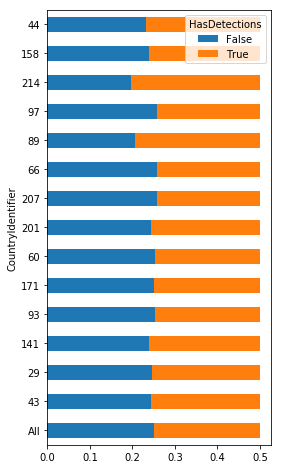

In [34]:
countries_rate = countries[[0,1]].div(countries.sum(1).astype(float),
                             axis=0) # normalize the value

countries_rate.head(15).plot(kind='barh', 
                    stacked=True,
                   figsize=(4,8))

In [35]:
final.shape

(333411, 83)

### Data Meaning Type (Bourzikas)
<b>SUCCESS MEASURE</b> <i>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</i>

In [37]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Data columns (total 83 columns):
MachineIdentifier                                    333411 non-null object
ProductName                                          333411 non-null object
EngineVersion                                        333411 non-null object
AppVersion                                           333411 non-null object
AvSigVersion                                         333411 non-null object
IsBeta                                               333411 non-null int64
RtpStateBitfield                                     332012 non-null float64
IsSxsPassiveMode                                     333411 non-null int64
DefaultBrowsersIdentifier                            21613 non-null float64
AVProductStatesIdentifier                            331826 non-null object
AVProductsInstalled                                  331826 non-null object
AVProductsEnabled                                    3

### Data Quality
<b>SUCCESS MEASURE</b>
    * Are those mistakes?
    * How do you deal with these problems?
    * Give justifications for your methods.

#### Categorical Variables

Updating any blank \ missing values in the following categorical attributes based on 
assumtions that missing value means not exist/disable :
<b>AVProductsInstalled
AVProductStatesIdentifier
AVProductsEnabled
IsProtected
Firewall
UacLuaenable</b>
  

Replace all <i>null</i> values in <b>Census_IsFlightingInternal</b> and <b>Census_IsFlightsDisabled</b> with <i>1</i>.  The original data only had 0 or NULL.  Which we reviewed the data inconjunction with FlightRing we can see there is interaction happening between the different combinations of the 3 variables compared to HasDetections (Python Line <b>NEED TO GET</b>).

Updating any blank values \ missing in <b>SmartScreen</b> to <i>ExistsNotSet</i>.  According the the documentationg, if the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

<b>OrganizationIdentifier</b> is specific to an organization or broad industry, if machine is not related to either the default value will be <i>NoOrg</i>

<b>Wdft_RegionIdentifier</b> will use the highest mode which is <i>10</i>.  We tried to narrow down different possibel values by comparing the RegionIdentifier to City and Geo but each time resulted in 10 being the largest mode.

Rename <b>Census_PrimaryDiskTypeName</b> unknown data into one category

Renamed <b>Census_ChassisTypeName</b> unknown data into one category

Renamed <b>Census_PowerPlatformRoleName</b> unknown data into one category



In [64]:
# save data to new data frame for manipulation

final_save=final.copy()

In [73]:
# Fill missing values :  AVProductsInstalled','AVProductStatesIdentifier','AVProductsEnabled','IsProtected'

final_save=final.copy()

print (final_save.isnull().sum().sort_values(ascending=False).head(50) )
print ()
fill_array=['AVProductsInstalled','AVProductStatesIdentifier','AVProductsEnabled','IsProtected','Firewall','UacLuaenable']

for col in fill_array:
    final_save[col].fillna('0', inplace=True)
    final_save[col] = final_save[col].astype(int)  

    print(col + '   has missing   ' +  str(final_save[col].isna().sum()) + '   values post action')

PuaMode                                    333387
Census_ProcessorClass                      331809
DefaultBrowsersIdentifier                  311798
Census_InternalBatteryType                 233884
Census_ThresholdOptIn                      208284
Census_IsWIMBootEnabled                    207891
SMode                                       26007
Census_InternalBatteryNumberOfCharges       11862
Wdft_IsGamer                                10937
CityIdentifier                               6345
Census_FirmwareManufacturerIdentifier        5348
Census_FirmwareVersionIdentifier             4811
Census_IsAlwaysOnAlwaysConnectedCapable      3015
Census_OEMModelIdentifier                    2748
Census_OEMNameIdentifier                     2557
Census_OSInstallLanguageIdentifier           2101
IeVerIdentifier                              1801
Census_ProcessorManufacturerIdentifier       1565
Census_ProcessorModelIdentifier              1565
Census_IsVirtualDevice                       1493


In [74]:
# Smart Screen fill miising values and fix characters issue

final_save.SmartScreen.fillna('ExistsNotSet', inplace=True)
final_save.SmartScreen.replace({"off":"Off","00000000":"ExistsNotSet","&#x02;" :"ExistsNotSet",
                                 "&#x01;" :"ExistsNotSet"},inplace=True)

final_save.SmartScreen.value_counts()

ExistsNotSet    175654
RequireAdmin    148372
Off               5248
Warn              2961
Prompt             643
Block              533
Name: SmartScreen, dtype: int64

In [75]:
# currently renamed "Census_PrimaryDiskTypeName" unknown data into one category

final_save.Census_PrimaryDiskTypeName.replace({"Unspecified":"Other"},inplace=True)
final_save.Census_PrimaryDiskTypeName.value_counts()

HDD        263501
SSD         43157
UNKNOWN     13374
Other       12832
Name: Census_PrimaryDiskTypeName, dtype: int64

In [76]:
# currently renamed "Census_ChassisTypeName" unknown data into one category

final_save.Census_ChassisTypeName.replace({"UNKNOWN":"Other","Unknown":"Other","0" :"Other",
                                "30" :"Other",
                                "35" :"Other",
                                "112" :"Other",
                                "76" :"Other",
                                "39" :"Other"},inplace=True)

final_save.Census_ChassisTypeName.value_counts()

Notebook               209777
Desktop                 47487
AllinOne                23878
Laptop                  17690
Portable                13572
Other                    5902
LowProfileDesktop        3612
Convertible              2721
MiniTower                1969
HandHeld                 1622
SpaceSaving              1617
Detachable               1442
MainServerChassis         604
Tower                     452
Tablet                    347
MiniPC                    339
LunchBox                  179
RackMountChassis           86
SubNotebook                51
BusExpansionChassis        24
StickPC                     1
SealedCasePC                1
MultisystemChassis          1
Name: Census_ChassisTypeName, dtype: int64

In [77]:
# currently renamed "Census_PowerPlatformRoleName" unknown data into one category

final_save.Census_PowerPlatformRoleName.fillna('Other', inplace=True)

final_save.Census_PowerPlatformRoleName.replace({"UNKNOWN":"Other"},inplace=True)
final_save.Census_PowerPlatformRoleName.value_counts()

Mobile              243379
Desktop              72136
Slate                11916
Workstation           2855
SOHOServer            1883
Other                  833
EnterpriseServer       257
AppliancePC            152
Name: Census_PowerPlatformRoleName, dtype: int64

In [78]:
#IsFlightsDisabled and IsFlightingInternal  

final_save.Census_IsFlightingInternal.fillna("1", inplace=True)
final_save.Census_IsFlightsDisabled.fillna("1", inplace=True)

final_save.Census_IsFlightsDisabled.value_counts()

0.0    326878
1        6533
Name: Census_IsFlightsDisabled, dtype: int64

In [79]:
#Wdft_RegionIdentifier
final_save.Wdft_RegionIdentifier.fillna("10",inplace=True)
final_save.Wdft_RegionIdentifier.value_counts()

10.0    320698
10       10937
13.0      1419
4.0         89
14.0        74
15.0        49
11.0        29
3.0         24
12.0        19
1.0         19
7.0         15
6.0         12
9.0         11
5.0          9
2.0          4
8.0          3
Name: Wdft_RegionIdentifier, dtype: int64

In [80]:
#OrganizationIdentifier
final_save.OrganizationIdentifier.fillna("0",inplace=True)
final_save.OrganizationIdentifier.value_counts()

27.0    266444
18.0     51041
0        13475
48.0      2088
36.0       134
47.0        89
11.0        50
37.0        40
4.0         11
33.0        11
49.0        10
28.0         4
20.0         3
3.0          3
21.0         2
32.0         2
14.0         1
40.0         1
10.0         1
46.0         1
Name: OrganizationIdentifier, dtype: int64

#### Continous
Reviewed Numerical Values, which all were related to the hardware configuration of a machine.  Using the Census_MDC2FormFactor which provides the type of computer (Tablet, Server, Etc.) we found the median value for each hardware setting.

In [81]:
final_save[cols_numerical].describe()

Census_ProcessorCoreCount  Census_PrimaryDiskTotalCapacity  \
count              333411.000000                     3.334110e+05   
mean                    3.195485                     5.688072e+05   
std                     1.568252                     3.476213e+05   
min                     1.000000                     1.022700e+04   
25%                     2.000000                     3.052450e+05   
50%                     4.000000                     4.769400e+05   
75%                     4.000000                     9.538690e+05   
max                    64.000000                     1.716940e+07   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  \
count                      3.334110e+05            333411.000000   
mean                       5.332372e+05              5268.058777   
std                        3.405699e+05              3858.531097   
min                        9.676000e+03               512.000000   
25%                        2.905430e+05              4096.000000   
50%                        4.636820e+05              4096.000000   
75%                        9.269920e+05              8192.000000   
max                        1.716879e+07            786432.000000   

       Census_InternalPrimaryDiagonalDisplaySizeInInches  \
count                                      333411.000000   
mean                                           15.860255   
std                                             4.964178   
min                                             5.500000   
25%                                            13.900000   
50%                                            15.500000   
75%                                            15.600000   
max                                           142.000000   

       Census_InternalPrimaryDisplayResolutionHorizontal  \
count                                      333411.000000   
mean                                         1436.088176   
std                                           250.183143   
min                                            -1.000000   
25%                                          1366.000000   
50%                                          1366.000000   
75%                                          1366.000000   
max                                          6016.000000   

       Census_InternalPrimaryDisplayResolutionVertical  \
count                                    333411.000000   
mean                                        827.451293   
std                                         144.401726   
min                                          -1.000000   
25%                                         768.000000   
50%                                         768.000000   
75%                                         800.000000   
max                                        3840.000000   

       Census_InternalBatteryNumberOfCharges  
count                           3.215490e+05  
mean                            1.039999e+09  
std                             1.839884e+09  
min                             0.000000e+00  
25%                             0.000000e+00  
50%                             0.000000e+00  
75%                             1.072000e+03  
max                             4.294967e+09

In [82]:
cols = np.append(["Census_MDC2FormFactor"], cols_numerical)
# final[cols].to_csv("data/final_countinous.csv")

df_grouped = final_save.groupby("Census_MDC2FormFactor").agg({
    "Census_ProcessorCoreCount":"median",
    "Census_PrimaryDiskTotalCapacity":"median",
    "Census_SystemVolumeTotalCapacity":"median",
    "Census_TotalPhysicalRAM":"median",
    "Census_InternalPrimaryDiagonalDisplaySizeInInches":"median",
    "Census_InternalPrimaryDisplayResolutionHorizontal":"median",
    "Census_InternalPrimaryDisplayResolutionVertical":"median",
    #"Census_InternalBatteryNumberOfCharges":"median"
})
df_grouped

Census_ProcessorCoreCount  \
Census_MDC2FormFactor                              
AllInOne                                     2.0   
Convertible                                  4.0   
Desktop                                      4.0   
Detachable                                   4.0   
LargeServer                                  7.0   
LargeTablet                                  4.0   
MediumServer                                16.0   
Notebook                                     2.0   
PCOther                                      4.0   
SmallServer                                  4.0   
SmallTablet                                  4.0   

                       Census_PrimaryDiskTotalCapacity  \
Census_MDC2FormFactor                                    
AllInOne                                      953869.0   
Convertible                                   476940.0   
Desktop                                       476940.0   
Detachable                                     29824.0   
LargeServer                                   216782.0   
LargeTablet                                    29820.0   
MediumServer                                  467385.0   
Notebook                                      476940.0   
PCOther                                       114473.0   
SmallServer                                   953837.0   
SmallTablet                                    29820.0   

                       Census_SystemVolumeTotalCapacity  \
Census_MDC2FormFactor                                     
AllInOne                                       926980.0   
Convertible                                    460031.0   
Desktop                                        463800.0   
Detachable                                      29178.0   
LargeServer                                    216039.0   
LargeTablet                                     29032.0   
MediumServer                                   302692.0   
Notebook                                       463830.0   
PCOther                                        113459.0   
SmallServer                                    952141.5   
SmallTablet                                     28920.0   

                       Census_TotalPhysicalRAM  \
Census_MDC2FormFactor                            
AllInOne                                4096.0   
Convertible                             4096.0   
Desktop                                 4096.0   
Detachable                              2048.0   
LargeServer                            16383.0   
LargeTablet                             2048.0   
MediumServer                           24576.0   
Notebook                                4096.0   
PCOther                                 2048.0   
SmallServer                             8192.0   
SmallTablet                             1024.0   

                       Census_InternalPrimaryDiagonalDisplaySizeInInches  \
Census_MDC2FormFactor                                                      
AllInOne                                                            19.5   
Convertible                                                         13.2   
Desktop                                                             18.9   
Detachable                                                          10.3   
LargeServer                                                         16.3   
LargeTablet                                                         11.6   
MediumServer                                                        17.2   
Notebook                                                            14.0   
PCOther                                                             14.0   
SmallServer                                                         17.1   
SmallTablet                                                          8.0   

                       Census_InternalPrimaryDisplayResolutionHorizontal  \
Census_MDC2FormFactor                                                      
AllInOne                       

In [88]:
# Replace missing continues Variables with its Median

#I will work on replacening -1 values

for name, group in df_grouped.items():
    for key, value in group.items():
        mask = final_save["Census_MDC2FormFactor"]==key
        print( name + "." + key + " Median: " + str(value) )
        print( "Updating: " + str(final_save.loc[final[name].isnull() & mask, name].shape) )
        final_save.loc[final_save[name].isnull() & mask, name] = value
        final_save[name].replace(-1,value,inplace=True)          

Census_ProcessorCoreCount.AllInOne Median: 2.0
Updating: (0,)
Census_ProcessorCoreCount.Convertible Median: 4.0
Updating: (0,)
Census_ProcessorCoreCount.Desktop Median: 4.0
Updating: (0,)
Census_ProcessorCoreCount.Detachable Median: 4.0
Updating: (0,)
Census_ProcessorCoreCount.LargeServer Median: 7.0
Updating: (0,)
Census_ProcessorCoreCount.LargeTablet Median: 4.0
Updating: (0,)
Census_ProcessorCoreCount.MediumServer Median: 16.0
Updating: (0,)
Census_ProcessorCoreCount.Notebook Median: 2.0
Updating: (0,)
Census_ProcessorCoreCount.PCOther Median: 4.0
Updating: (0,)
Census_ProcessorCoreCount.SmallServer Median: 4.0
Updating: (0,)
Census_ProcessorCoreCount.SmallTablet Median: 4.0
Updating: (0,)
Census_PrimaryDiskTotalCapacity.AllInOne Median: 953869.0
Updating: (0,)
Census_PrimaryDiskTotalCapacity.Convertible Median: 476940.0
Updating: (0,)
Census_PrimaryDiskTotalCapacity.Desktop Median: 476940.0
Updating: (0,)
Census_PrimaryDiskTotalCapacity.Detachable Median: 29824.0
Updating: (0,)
Cen

In [84]:
final_save[cols_numerical].describe()

Census_ProcessorCoreCount  Census_PrimaryDiskTotalCapacity  \
count              333411.000000                     3.334110e+05   
mean                    3.195485                     5.688072e+05   
std                     1.568252                     3.476213e+05   
min                     1.000000                     1.022700e+04   
25%                     2.000000                     3.052450e+05   
50%                     4.000000                     4.769400e+05   
75%                     4.000000                     9.538690e+05   
max                    64.000000                     1.716940e+07   

       Census_SystemVolumeTotalCapacity  Census_TotalPhysicalRAM  \
count                      3.334110e+05            333411.000000   
mean                       5.332372e+05              5268.058777   
std                        3.405699e+05              3858.531097   
min                        9.676000e+03               512.000000   
25%                        2.905430e+05              4096.000000   
50%                        4.636820e+05              4096.000000   
75%                        9.269920e+05              8192.000000   
max                        1.716879e+07            786432.000000   

       Census_InternalPrimaryDiagonalDisplaySizeInInches  \
count                                      333411.000000   
mean                                           15.860255   
std                                             4.964178   
min                                             5.500000   
25%                                            13.900000   
50%                                            15.500000   
75%                                            15.600000   
max                                           142.000000   

       Census_InternalPrimaryDisplayResolutionHorizontal  \
count                                      333411.000000   
mean                                         1436.088176   
std                                           250.183143   
min                                            -1.000000   
25%                                          1366.000000   
50%                                          1366.000000   
75%                                          1366.000000   
max                                          6016.000000   

       Census_InternalPrimaryDisplayResolutionVertical  \
count                                    333411.000000   
mean                                        827.451293   
std                                         144.401726   
min                                          -1.000000   
25%                                         768.000000   
50%                                         768.000000   
75%                                         800.000000   
max                                        3840.000000   

       Census_InternalBatteryNumberOfCharges  
count                           3.215490e+05  
mean                            1.039999e+09  
std                             1.839884e+09  
min                             0.000000e+00  
25%                             0.000000e+00  
50%                             0.000000e+00  
75%                             1.072000e+03  
max                             4.294967e+09

In [85]:
#create new summary table
temp_data = []

for col in final.columns:
    temp_data.append((col, final[col].isnull().sum() * 100 / final.shape[0],
                final[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                final[col].dtype))

temp_data = pd.DataFrame(temp_data, columns=['Attribute','Missing_values [%]',
                                     'Higher_frequency_data [%]','Data_type'])

In [86]:
#sort by Missing_values
temp_data.sort_values(by = [temp_data.columns[1]],ascending=False).head(10)

Attribute  Missing_values [%]  \
28                                PuaMode           99.992802   
41                  Census_ProcessorClass           99.519512   
8               DefaultBrowsersIdentifier           93.517610   
52             Census_InternalBatteryType           70.148855   
71                  Census_ThresholdOptIn           62.470644   
75                Census_IsWIMBootEnabled           62.352772   
29                                  SMode            7.800283   
53  Census_InternalBatteryNumberOfCharges            3.557771   
80                           Wdft_IsGamer            3.280336   
14                         CityIdentifier            1.903057   

    Higher_frequency_data [%] Data_type  
28                  99.992802    object  
41                  99.519512    object  
8                   93.517610   float64  
52                  70.148855    object  
71                  62.470644   float64  
75                  62.352772   float64  
29                  92.132833   float64  
53                  60.295551   float64  
80                  76.631545   float64  
14                  17.186895    object

In [89]:
#sort by Freqency values
temp_data.sort_values(by =[temp_data.columns[2]], ascending=False).head(30)

Attribute  Missing_values [%]  \
13                        CountryIdentifier            0.000000   
5                                    IsBeta            0.000000   
27                          AutoSampleOptIn            0.000000   
28                                  PuaMode           99.992802   
65         Census_IsPortableOperatingSystem            0.000000   
35                      Census_DeviceFamily            0.000000   
33                             UacLuaenable            0.000000   
41                    Census_ProcessorClass           99.519512   
76                   Census_IsVirtualDevice            0.447796   
1                               ProductName            0.000000   
12                                   HasTpm            0.000000   
7                          IsSxsPassiveMode            0.000000   
69                 Census_IsFlightsDisabled            0.000000   
78                      Census_IsPenCapable            0.000000   
6                          RtpStateBitfield            0.419602   
32                                 Firewall            0.000000   
11                        AVProductsEnabled            0.000000   
81                    Wdft_RegionIdentifier            0.000000   
79  Census_IsAlwaysOnAlwaysConnectedCapable            0.904289   
20                                    OsVer            0.000000   
18                                 Platform            0.000000   
45               Census_HasOpticalDiskDrive            0.000000   
70                        Census_FlightRing            0.000000   
26                              IsProtected            0.000000   
8                 DefaultBrowsersIdentifier           93.517610   
29                                    SMode            7.800283   
66                  Census_GenuineStateName            0.000000   
16                        GeoNameIdentifier            0.001800   
55                    Census_OSArchitecture            0.000000   
19                                Processor            0.000000   

    Higher_frequency_data [%] Data_type  
13                 100.000000    object  
5                  100.000000     int64  
27                  99.995201     int64  
28                  99.992802    object  
65                  99.957410     int64  
35                  99.891125    object  
33                  99.631686     int32  
41                  99.519512    object  
76                  99.135002   float64  
1                   98.952944    object  
12                  98.795181     int64  
7                   98.637717     int64  
69                  98.040557    object  
78                  97.568167     int64  
6                   96.998899   float64  
32                  96.996800     int32  
11                  96.653680     int32  
81                  96.186988    object  
79                  95.713999   float64  
20                  95.713399    object  
18                  95.612622    object  
45                  94.818107     int64  
70                  93.997199    object  
26                  93.694869     int32  
8                   93.517610   float64  
29                  92.132833   float64  
66                  91.314924    object  
16                  88.886389    object  
55                  88.734925    object  
19                  88.723227    object

In [90]:
temp_data1=[]

temp_data1=temp_data[temp_data[temp_data.columns[1]] > 80 | (temp_data[temp_data.columns[2]] > 98)]

print ("Deleted Attributes\n")

for index, row in temp_data1.iterrows():
    print (row["Attribute"])
    del final_save [row["Attribute"]]

final_save.shape  

Deleted Attributes

DefaultBrowsersIdentifier
CityIdentifier
PuaMode
SMode
Census_ProcessorClass
Census_InternalBatteryType
Census_InternalBatteryNumberOfCharges
Census_ThresholdOptIn
Census_FirmwareManufacturerIdentifier
Census_FirmwareVersionIdentifier
Census_IsWIMBootEnabled
Wdft_IsGamer


(333411, 71)

In [ ]:
#Return data to original dataframe 
final=final_save.copy()     

### Simple Statistics
<b>SUCCESS MEASURE</b> <i>Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.</i>

In [ ]:
final[cols_numerical].describe()

### Visualize Attributes
<b>SUCCESS MEASURE</b> <i>Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.</i>



### Explore Joint Attributes
<b>SUCCESS MEASURE</b> <i>Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.</i>

### Explore Attributes and Class
<b>SUCCESS MEASURE</b> <i>Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).</i>

### New Features
<b>SUCCESS MEASURE</b> <i>Are there other features that could be added to the data or created from existing features? Which ones?</i>

### Exceptional Work
<b>SUCCESS MEASURE</b> <i>You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.</i>

In [108]:
for col in final.columns:
    if col != "MachineIdentifier":
        if final[col].dtype == "object":
            print( final[['MachineIdentifier',col]].fillna("NULL").groupby(col).agg(['count']) )


             MachineIdentifier
                         count
ProductName                   
mse                       3489
scep                         2
win8defender            329920
              MachineIdentifier
                          count
EngineVersion                  
1.1.11701.0                   6
1.1.11903.0                   1
1.1.12101.0                   4
1.1.12400.0                   5
1.1.12603.0                   2
1.1.12706.0                   1
1.1.12805.0                 132
1.1.12902.0                 251
1.1.13000.0                 220
1.1.13103.0                 245
1.1.13202.0                 230
1.1.13303.0                 421
1.1.13406.0                   1
1.1.13407.0                 434
1.1.13504.0                4579
1.1.13601.0                 353
1.1.13701.0                 236
1.1.13704.0                 244
1.1.13804.0                 470
1.1.13902.0                   5
1.1.13903.0                 484
1.1.14001.0                   1
1.1.14002.0   

        MachineIdentifier
                    count
PuaMode                  
NULL               333387
on                     24
             MachineIdentifier
                         count
SmartScreen                   
&#x01;                       5
&#x02;                       7
00000000                     1
Block                      533
ExistsNotSet             73602
NULL                    102039
Off                       5246
Prompt                     643
RequireAdmin            148372
Warn                      2961
off                          2
                      MachineIdentifier
                                  count
Census_MDC2FormFactor                  
AllInOne                          31388
Convertible                       18177
Desktop                           46802
Detachable                         7402
LargeServer                          12
LargeTablet                        2563
MediumServer                         44
Notebook                         222

                         MachineIdentifier
                                     count
Census_OSInstallTypeName                  
Clean                                 2307
CleanPCRefresh                        1616
IBSClean                             51905
Other                                36399
Refresh                              11922
Reset                                37915
UUPUpgrade                           62656
Update                               75099
Upgrade                              53592
                                      MachineIdentifier
                                                  count
Census_OSWUAutoUpdateOptionsName                       
AutoInstallAndRebootAtMaintenanceTime             17561
DownloadNotify                                      362
FullAuto                                         115889
Notify                                            86081
Off                                                 615
UNKNOWN                             

In [ ]:
final.describe()

In [109]:
for col in final.columns:
    if col != "MachineIdentifier":
        if final[col].dtype != "object":
            print( final[['MachineIdentifier',col]].fillna("NULL").groupby(col).agg(['count']) )


       MachineIdentifier
                   count
IsBeta                  
0                 333411
                 MachineIdentifier
                             count
RtpStateBitfield                  
0.0                           6275
1.0                             30
3.0                            133
5.0                            766
7.0                         323405
8.0                           1403
NULL                          1399
                 MachineIdentifier
                             count
IsSxsPassiveMode                  
0                           328869
1                             4542
                          MachineIdentifier
                                      count
DefaultBrowsersIdentifier                  
24.0                                      8
48.0                                      9
57.0                                      1
62.0                                      1
65.0                                      4
80.0                   

                  MachineIdentifier
                              count
GeoNameIdentifier                  
1.0                              17
4.0                               3
6.0                               2
7.0                               3
8.0                               1
10.0                            167
12.0                              1
15.0                              9
17.0                              4
18.0                              2
19.0                              1
22.0                              1
23.0                              1
24.0                             10
25.0                             10
26.0                              2
29.0                             49
30.0                              3
34.0                              1
35.0                             46
36.0                              1
38.0                              1
39.0                              1
44.0                              1
45.0                        

         MachineIdentifier
                     count
Firewall                  
0.0                   6697
1.0                 323398
NULL                  3316
             MachineIdentifier
                         count
UacLuaenable                  
0.0                        726
1.0                     332183
48.0                         1
NULL                       501
                         MachineIdentifier
                                     count
Census_OEMNameIdentifier                  
12.0                                     1
14.0                                     1
44.0                                     1
47.0                                     1
50.0                                     1
97.0                                     1
113.0                                    1
163.0                                    1
167.0                                    3
238.0                                    2
249.0                                   81
305.0              

                                 MachineIdentifier
                                             count
Census_SystemVolumeTotalCapacity                  
9676.0                                           1
9689.0                                           1
9986.0                                           1
10185.0                                          1
10525.0                                          1
10610.0                                          1
10834.0                                          1
10919.0                                          1
11108.0                                          1
11720.0                                          1
12073.0                                          1
12912.0                                          1
13131.0                                          1
13149.0                                          1
13766.0                                          1
13812.0                                          2
13834.0                        

                                                  MachineIdentifier
                                                              count
Census_InternalPrimaryDisplayResolutionHorizontal                  
-1.0                                                              4
320.0                                                             5
480.0                                                             4
540.0                                                             1
600.0                                                            62
640.0                                                           198
656.0                                                             2
681.0                                                             1
691.0                                                             1
720.0                                                            10
728.0                                                             1
729.0                                           

                                      MachineIdentifier
                                                  count
Census_InternalBatteryNumberOfCharges                  
0.0                                              201032
1.0                                                1199
2.0                                                 673
3.0                                                 516
4.0                                                 421
5.0                                                 365
6.0                                                 334
7.0                                                 300
8.0                                                 312
9.0                                                 262
10.0                                                270
11.0                                                215
12.0                                                226
13.0                                                225
14.0                                            

                           MachineIdentifier
                                       count
Census_IsFlightingInternal                  
0.0                                    56052
NULL                                  277359
                         MachineIdentifier
                                     count
Census_IsFlightsDisabled                  
0.0                                 326878
NULL                                  6533
                      MachineIdentifier
                                  count
Census_ThresholdOptIn                  
0.0                              125114
1.0                                  13
NULL                             208284
                                      MachineIdentifier
                                                  count
Census_FirmwareManufacturerIdentifier                  
8.0                                                   1
11.0                                                 27
13.0                                    

                      MachineIdentifier
                                  count
Census_IsTouchEnabled                  
0                                288327
1                                 45084
                    MachineIdentifier
                                count
Census_IsPenCapable                  
0                              325303
1                                8108
                                        MachineIdentifier
                                                    count
Census_IsAlwaysOnAlwaysConnectedCapable                  
0.0                                                319121
1.0                                                 11275
NULL                                                 3015
             MachineIdentifier
                         count
Wdft_IsGamer                  
0.0                     255498
1.0                      66976
NULL                     10937
                      MachineIdentifier
                                  co

['Census_ProcessorCoreCount', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges']


In [10]:
df = final[["HasDetections","EngineVersion"]].copy()

df["EngineVersion"] = df.EngineVersion.str[-7:]
df["EngineVersion"] = df.EngineVersion.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333411 entries, 0 to 333410
Data columns (total 2 columns):
HasDetections    333411 non-null int64
EngineVersion    333411 non-null float64
dtypes: float64(1), int64(1)
memory usage: 5.1 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cc4ba20>,
      dtype=object)

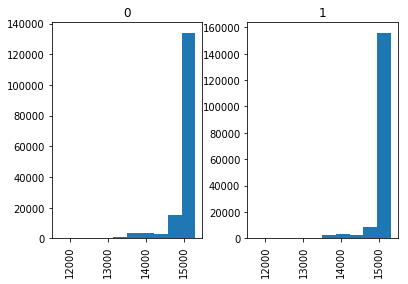

In [11]:
df.hist(column="EngineVersion",by="HasDetections")

['EngineVersion' 'AVProductsInstalled' 'AVProductsEnabled'
 'CountryIdentifier' 'OrganizationIdentifier' 'Platform' 'Processor'
 'OsVer' 'OsBuild' 'OsSuite' 'OsPlatformSubRelease' 'SkuEdition'
 'SmartScreen' 'Census_MDC2FormFactor' 'Census_DeviceFamily'
 'Census_ProcessorManufacturerIdentifier' 'Census_PrimaryDiskTypeName'
 'Census_ChassisTypeName' 'Census_PowerPlatformRoleName'
 'Census_InternalBatteryType' 'Census_OSArchitecture' 'Census_OSBranch'
 'Census_OSBuildNumber' 'Census_OSEdition' 'Census_OSSkuName'
 'Census_OSInstallTypeName' 'Census_OSInstallLanguageIdentifier'
 'Census_OSUILocaleIdentifier' 'Census_OSWUAutoUpdateOptionsName'
 'Census_GenuineStateName' 'Census_ActivationChannel' 'Census_FlightRing'
 'Wdft_RegionIdentifier' 'IsSxsPassiveMode' 'HasTpm' 'IsProtected'
 'AutoSampleOptIn' 'Firewall' 'UacLuaenable' 'Census_HasOpticalDiskDrive'
 'Census_IsPortableOperatingSystem' 'Census_IsFlightingInternal'
 'Census_IsFlightsDisabled' 'Census_ThresholdOptIn'
 'Census_IsSecureBoot

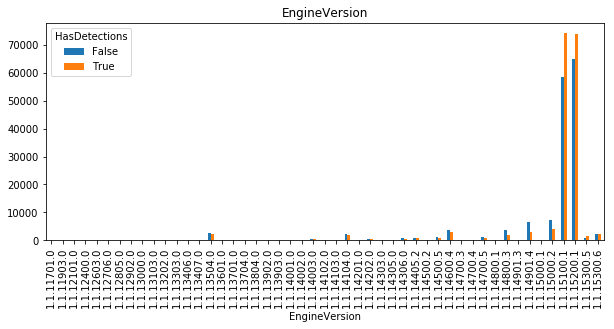

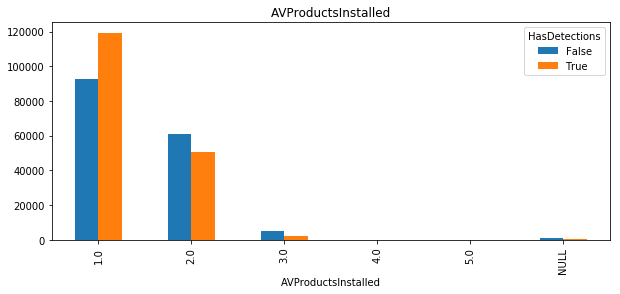

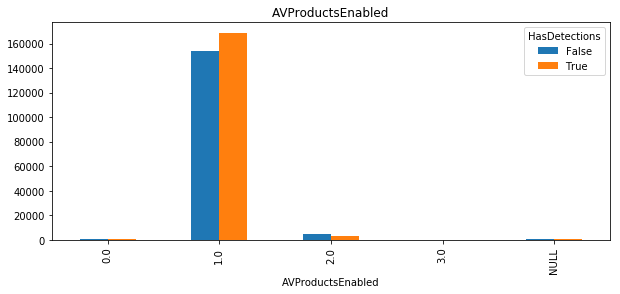

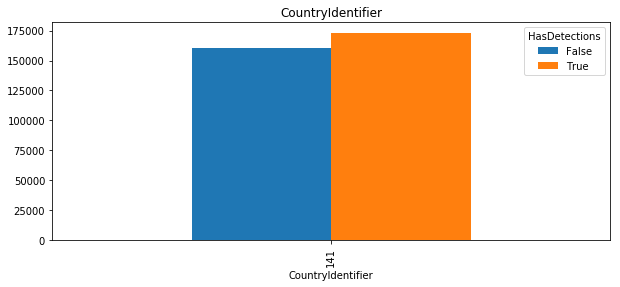

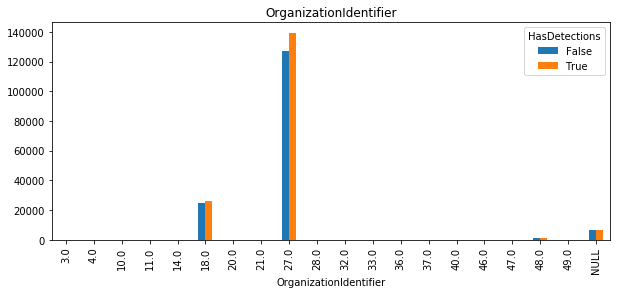

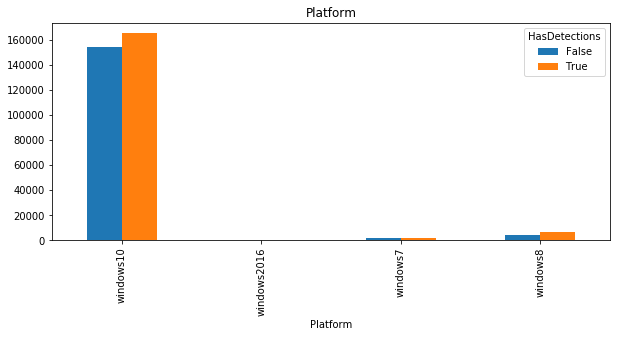

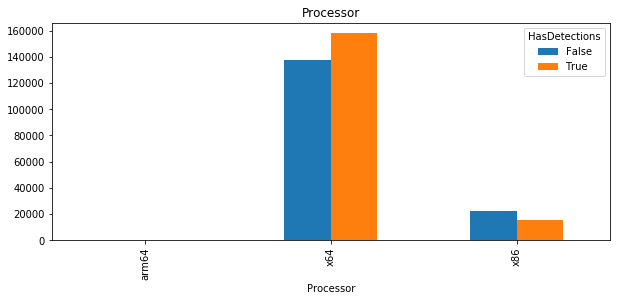

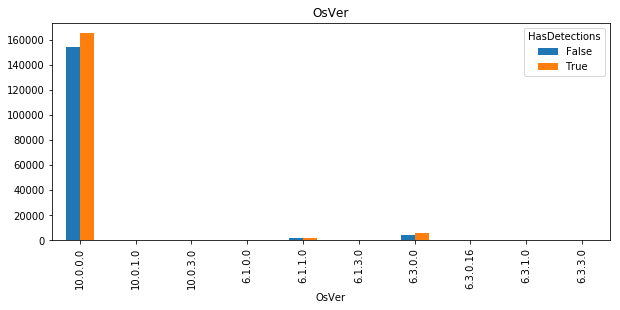

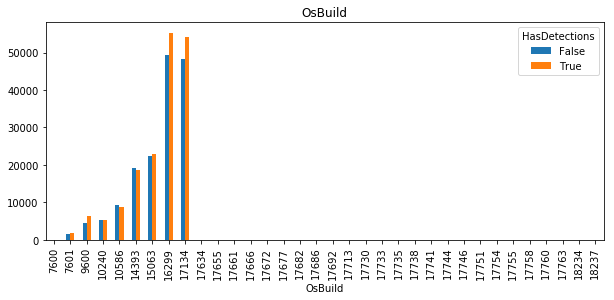

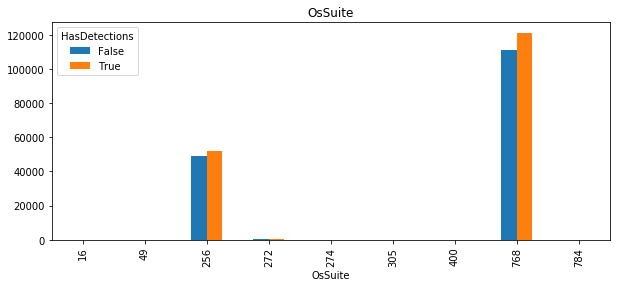

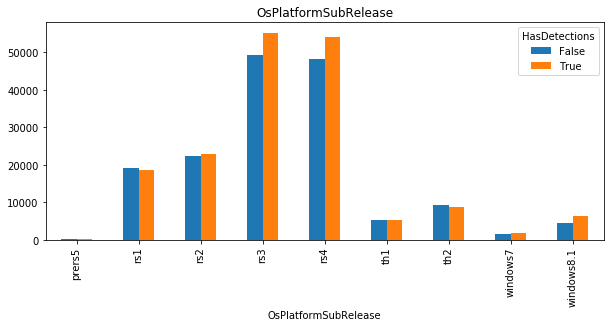

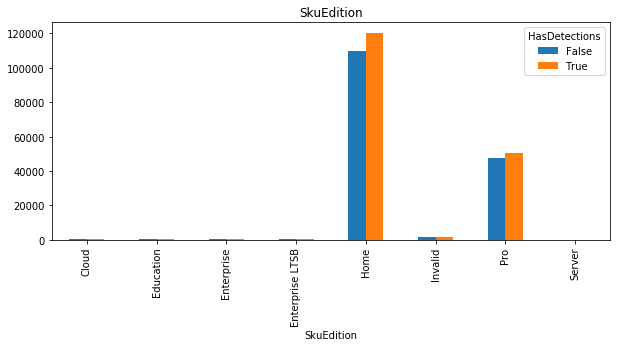

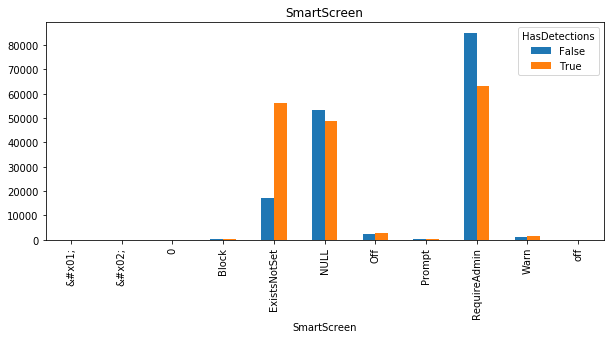

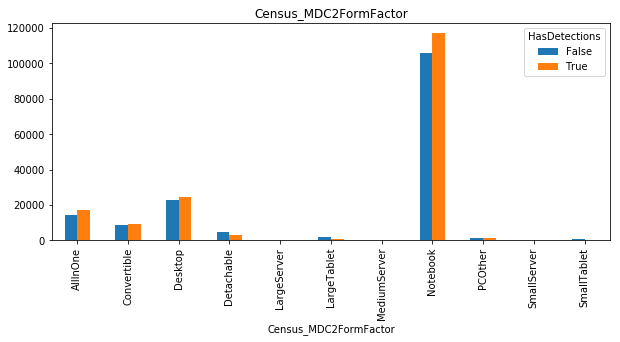

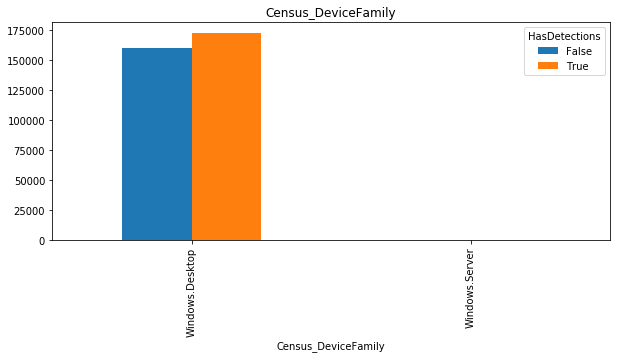

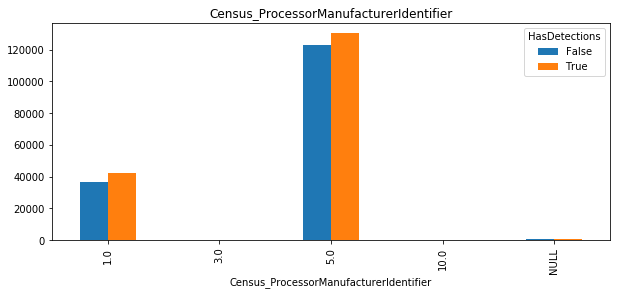

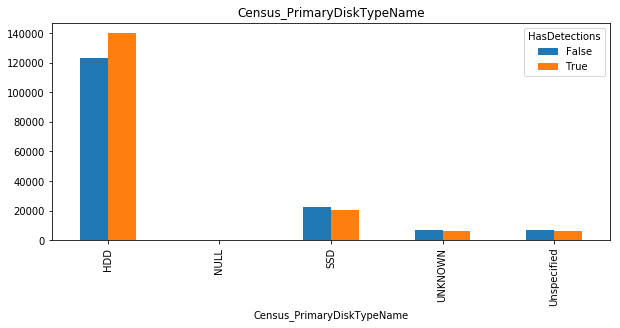

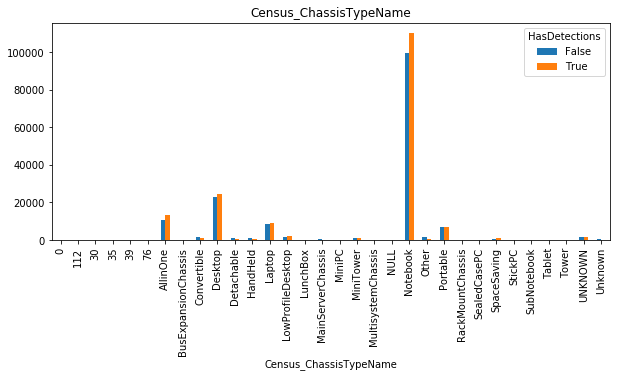

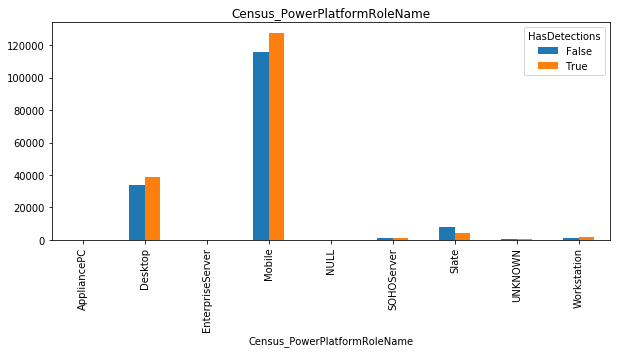

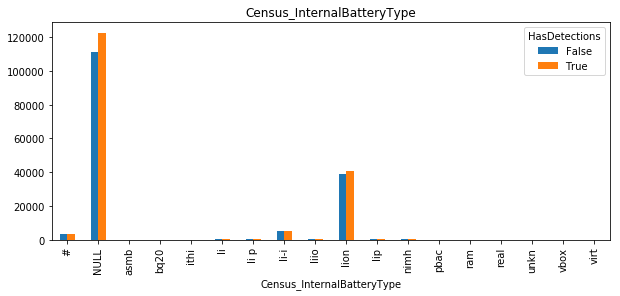

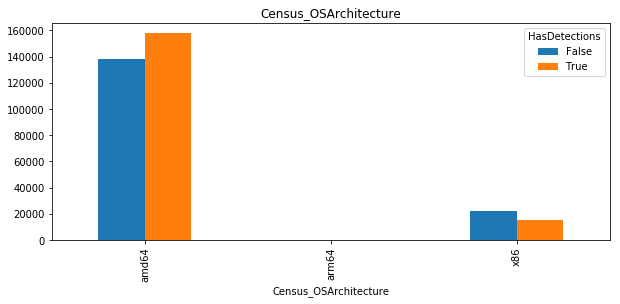

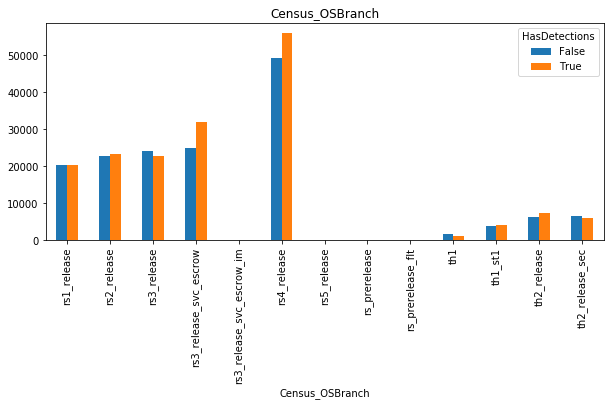

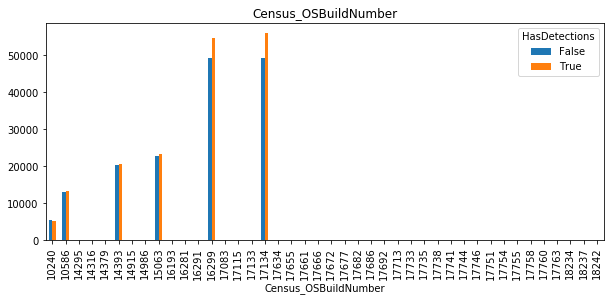

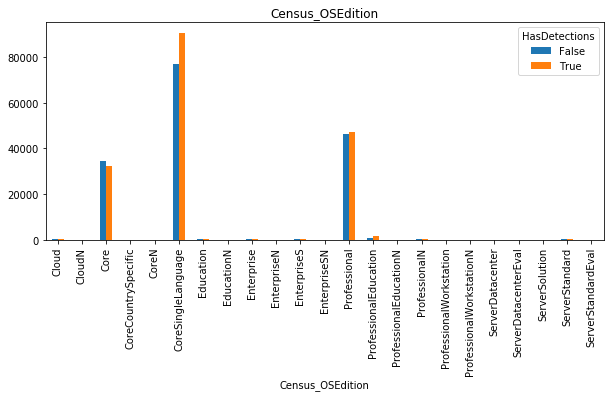

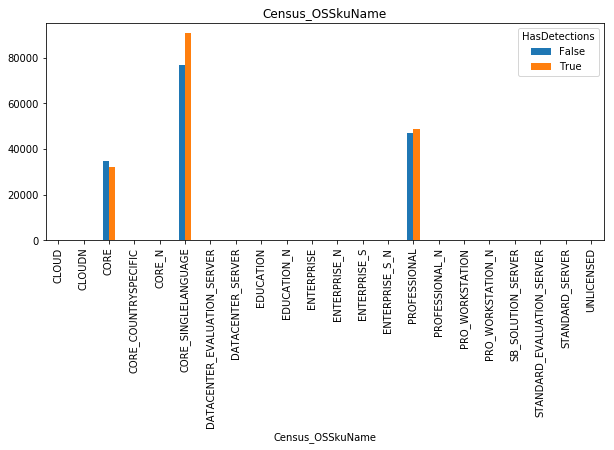

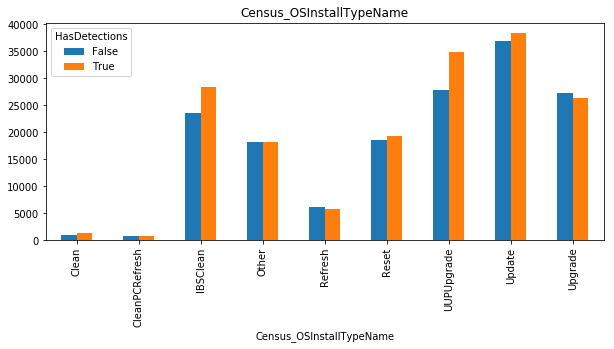

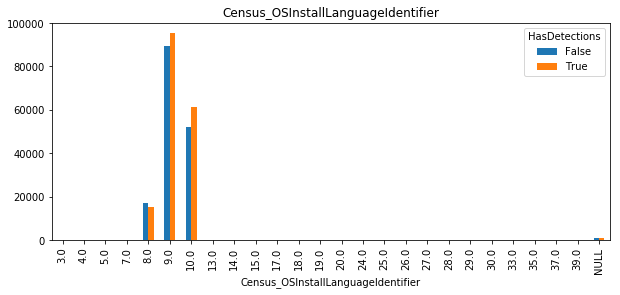

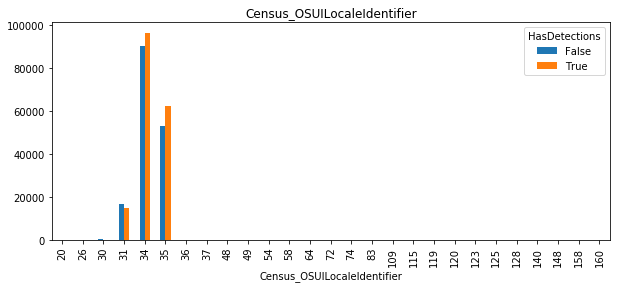

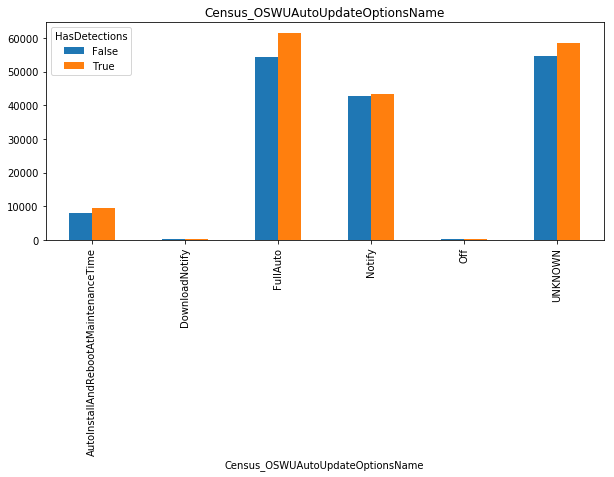

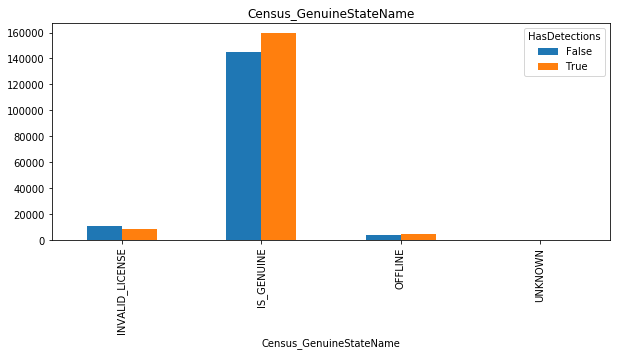

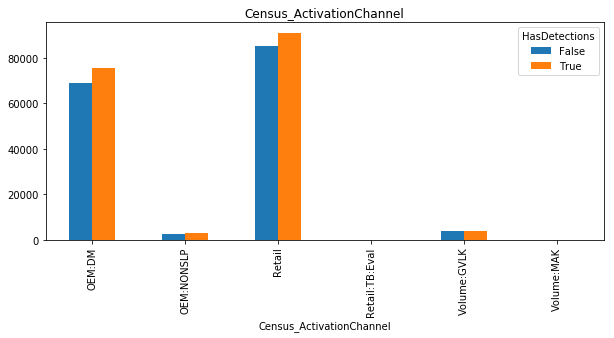

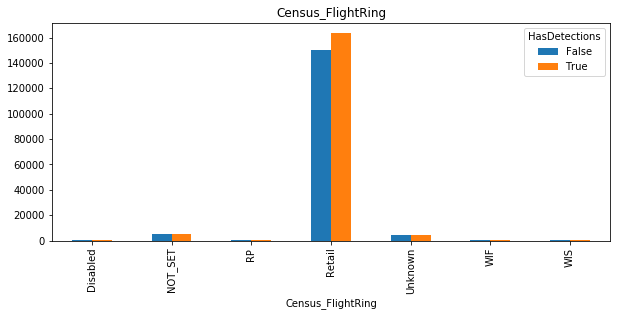

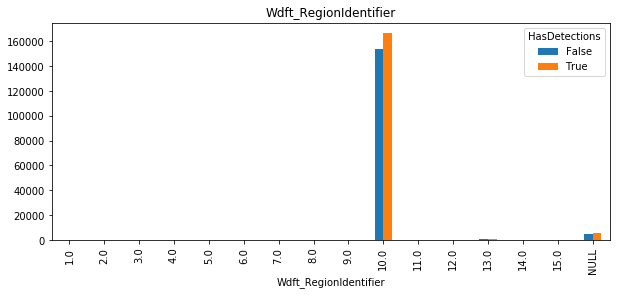

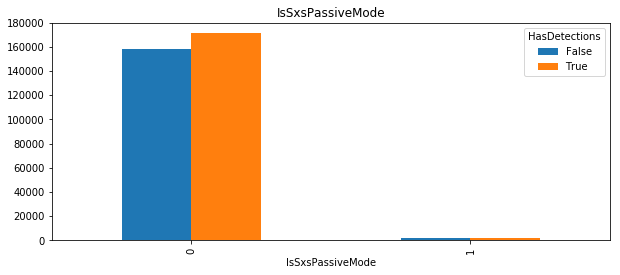

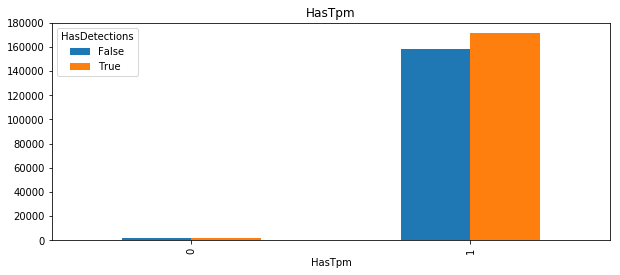

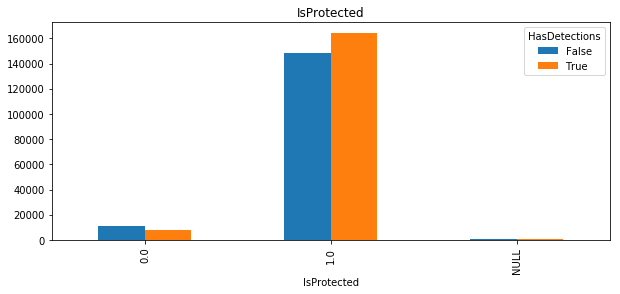

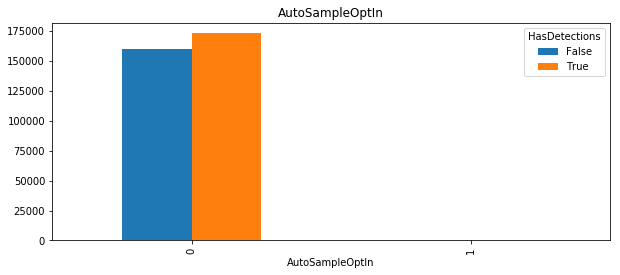

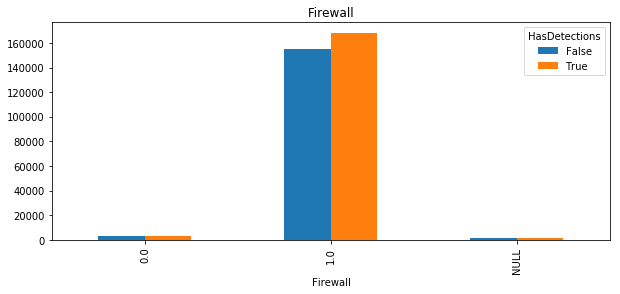

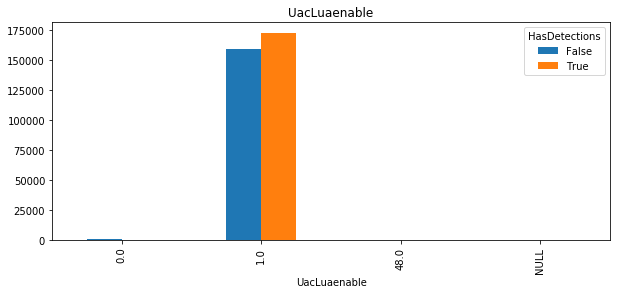

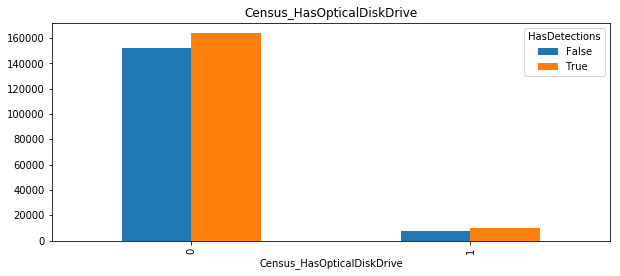

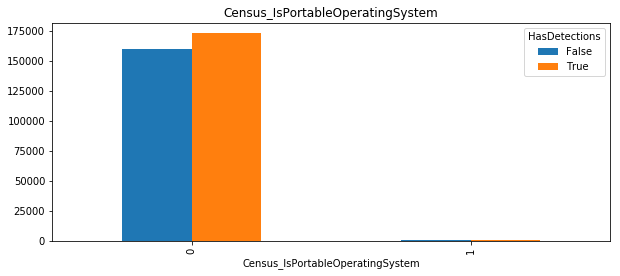

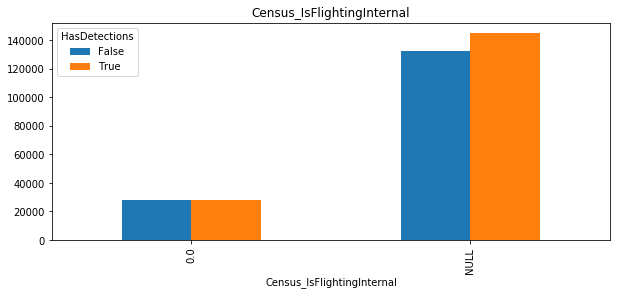

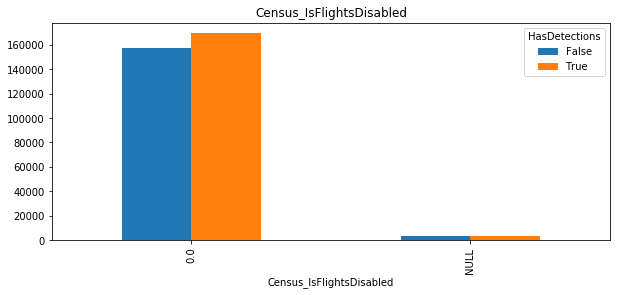

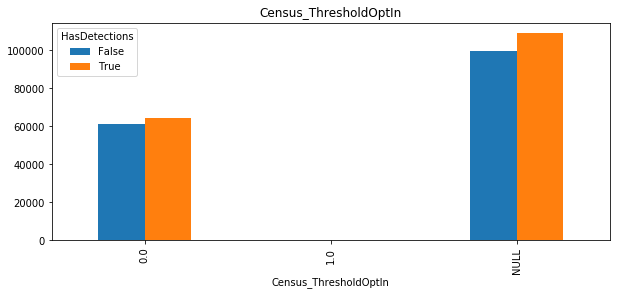

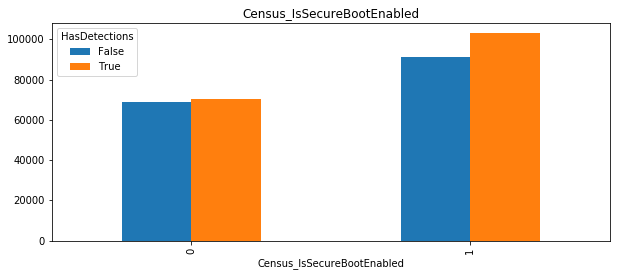

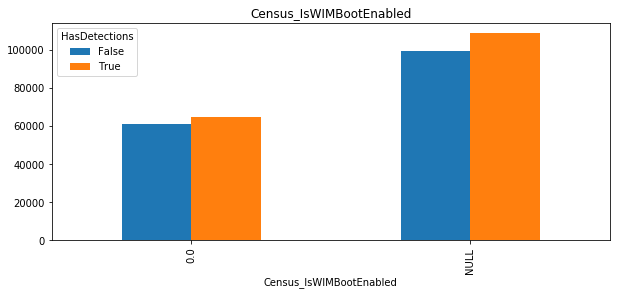

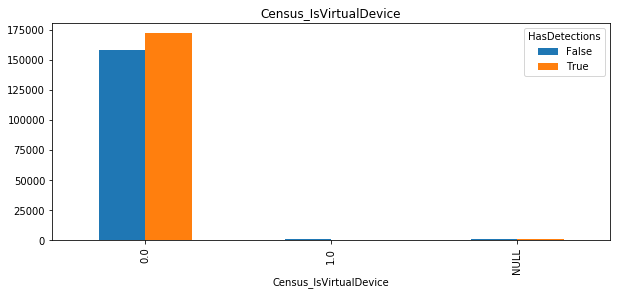

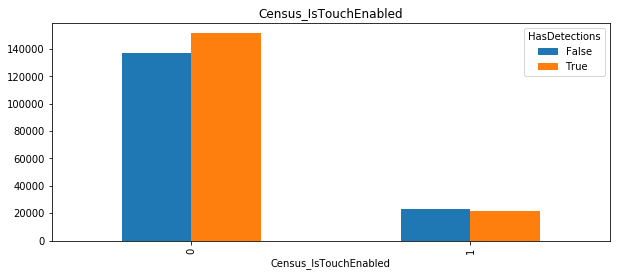

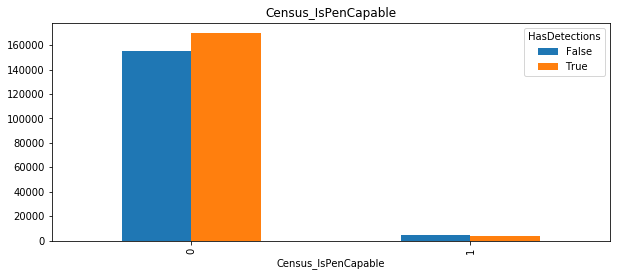

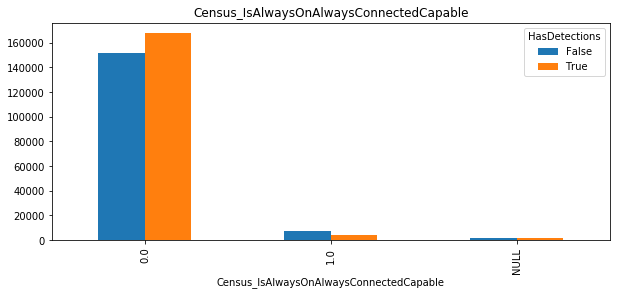

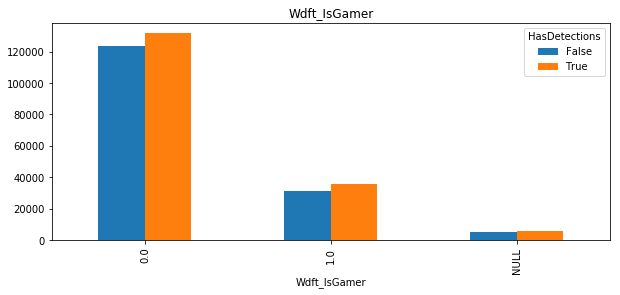

In [11]:
# Box Plots for all data classified as OS
cols = np.append(cols_categorical,cols_booleans)

for col in cols:
    ct = pd.crosstab(
        [final[col].fillna("NULL").astype(object)], 
        final.HasDetections.astype(bool))

    ct.plot(kind='bar',figsize = (10,4), title=col)

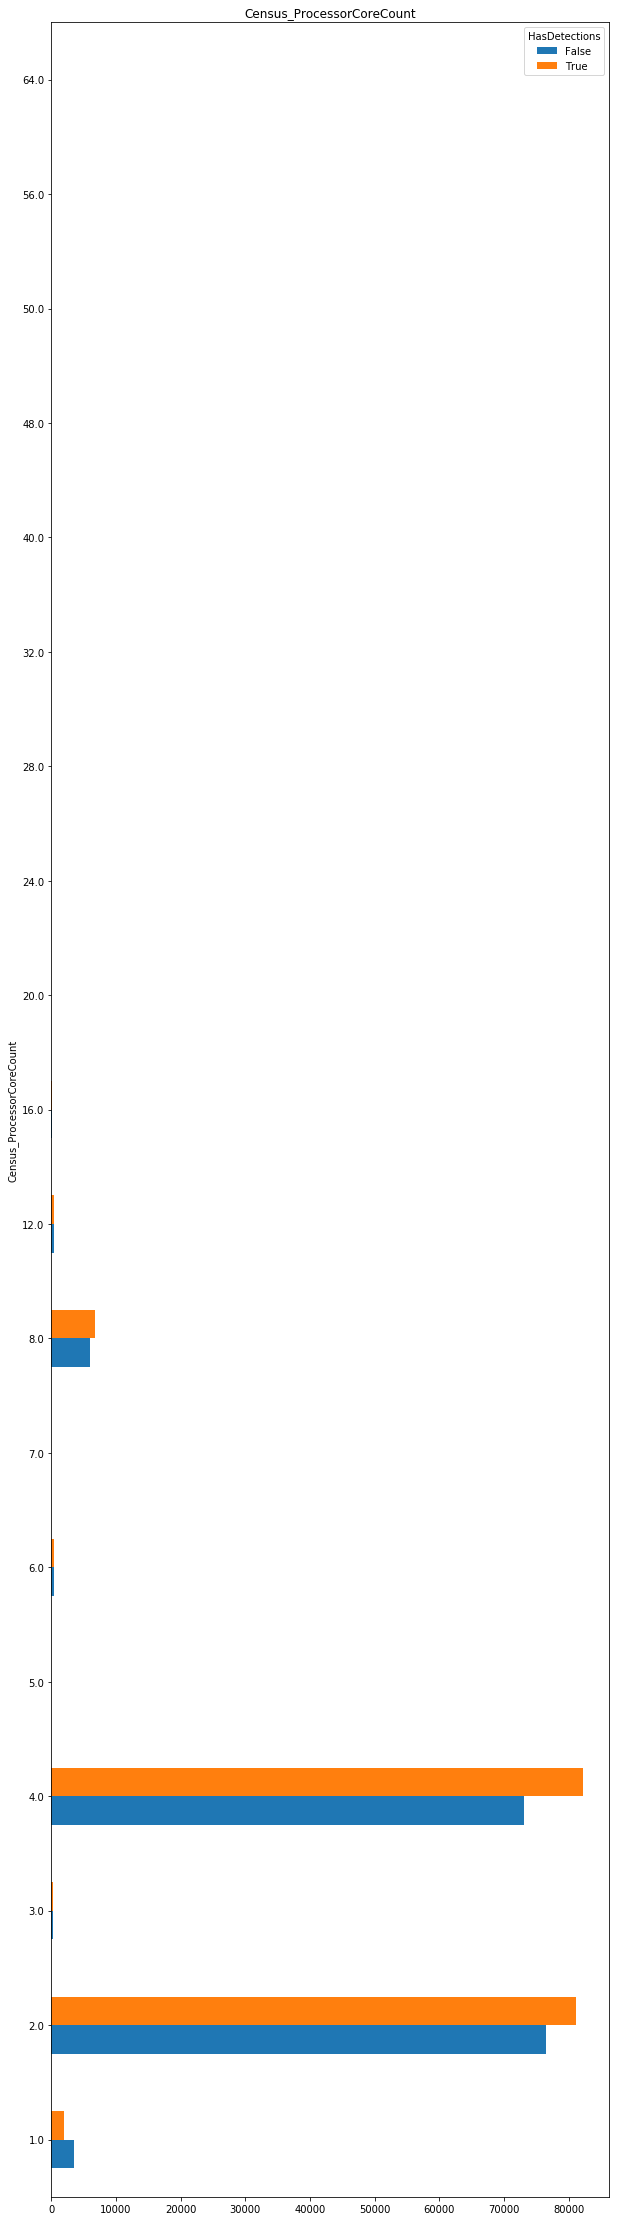

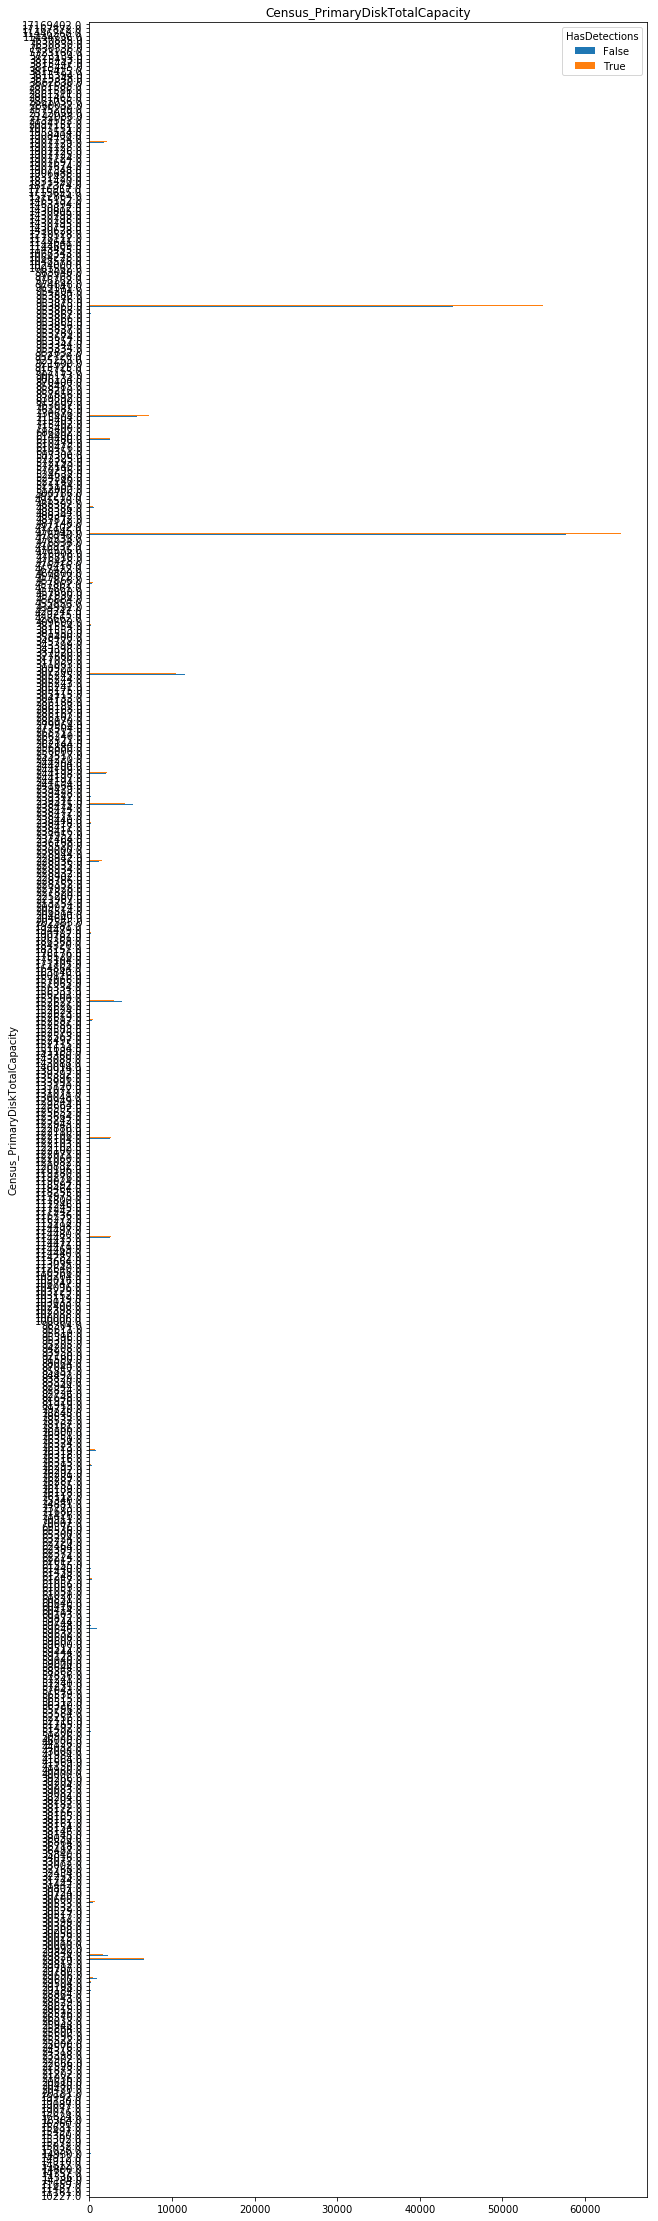

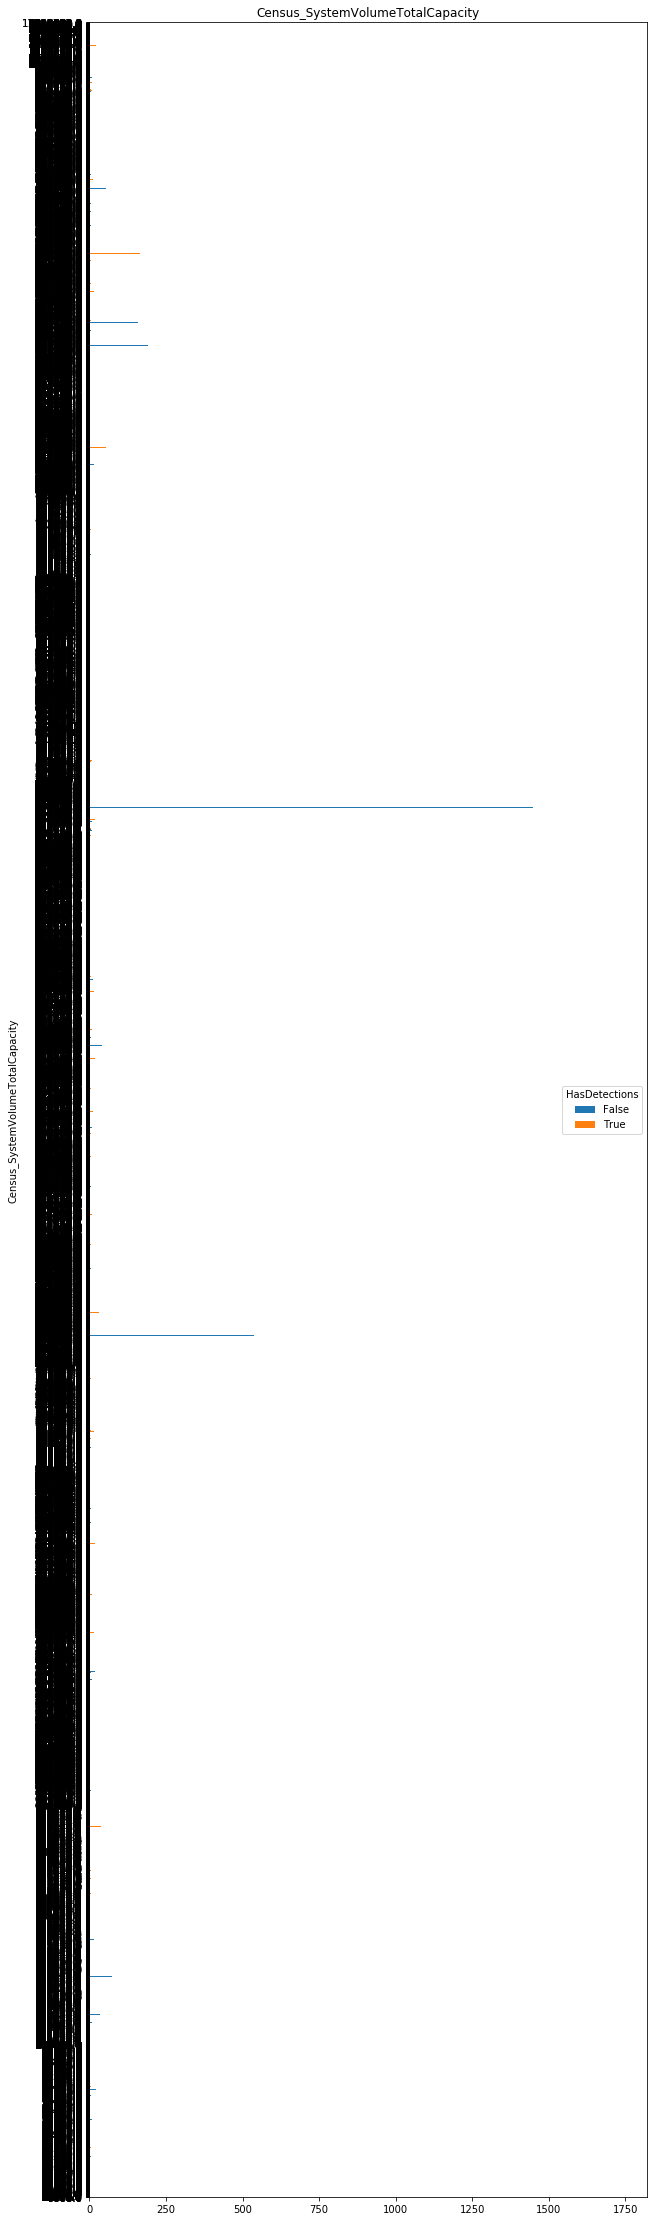

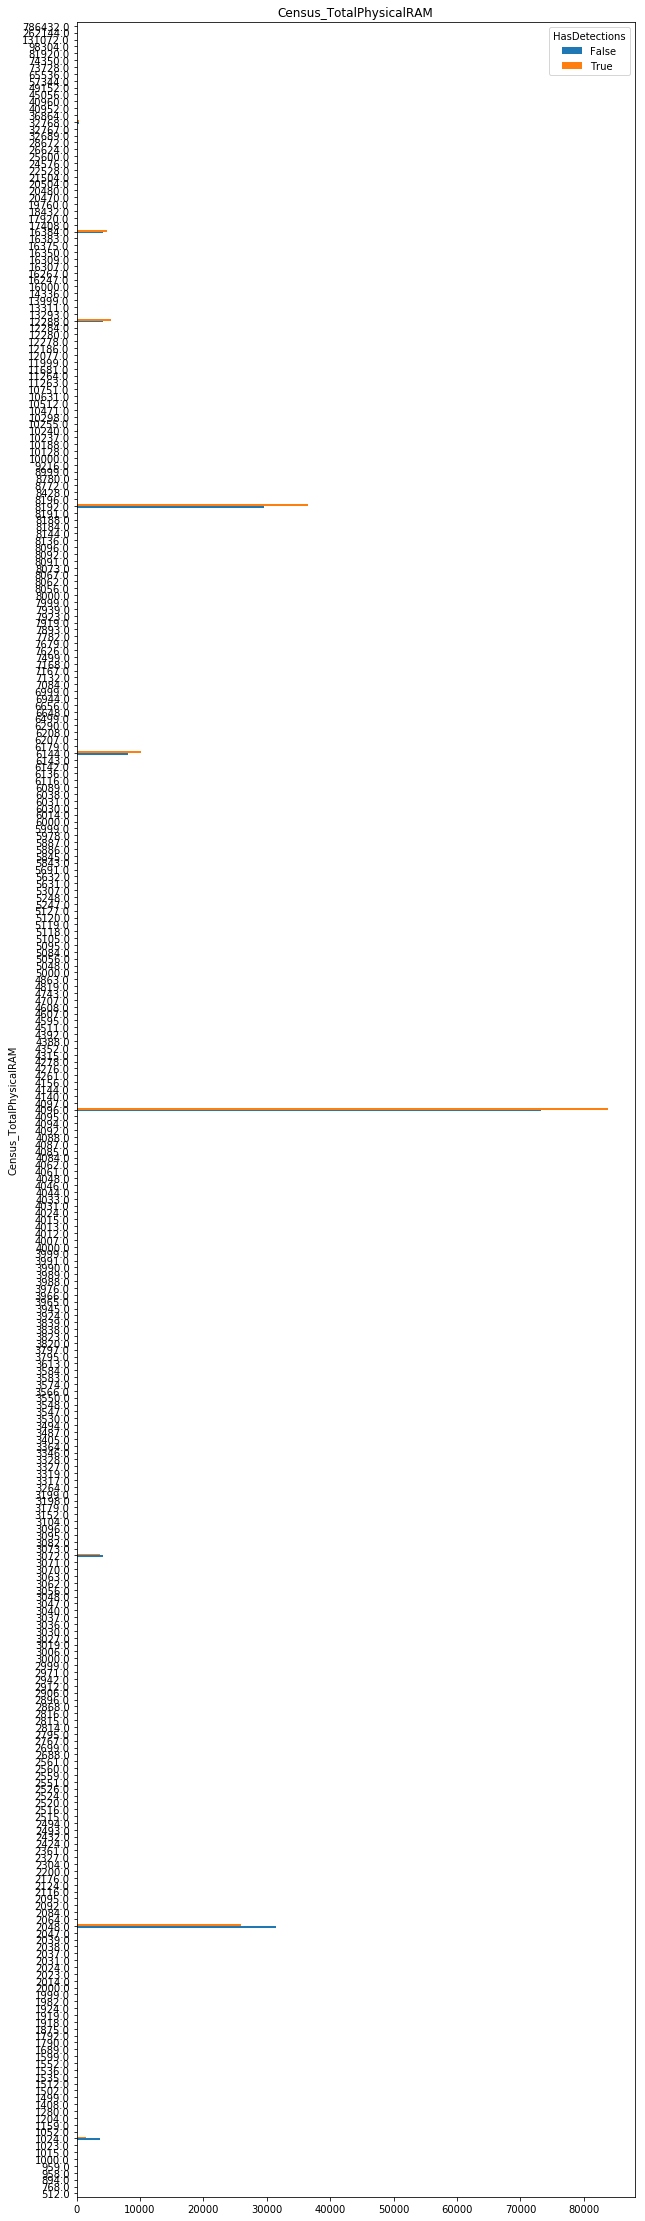

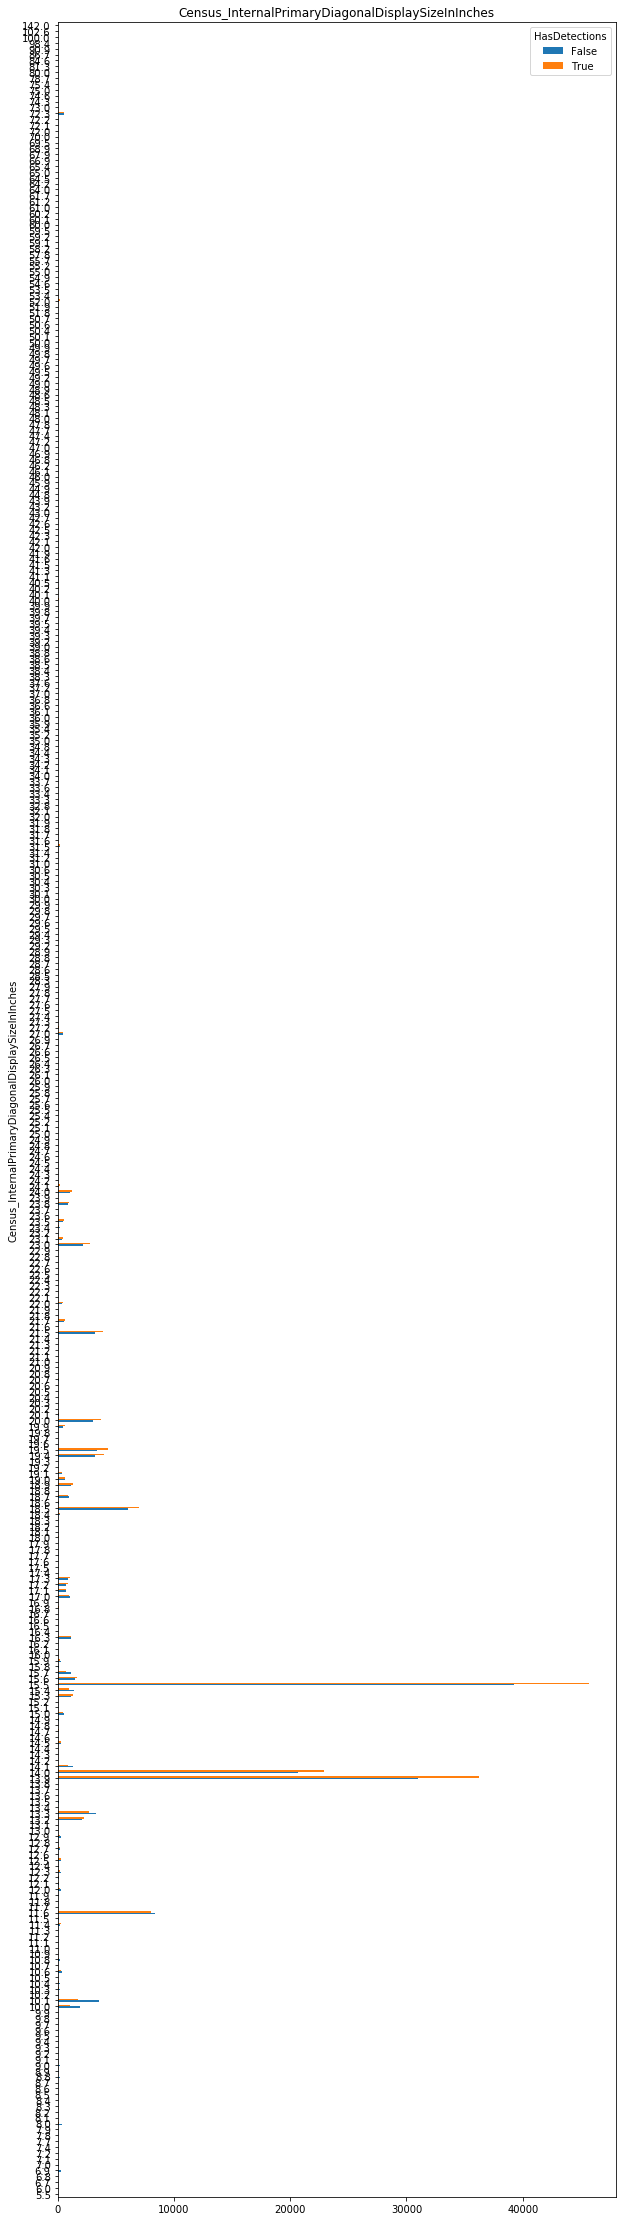

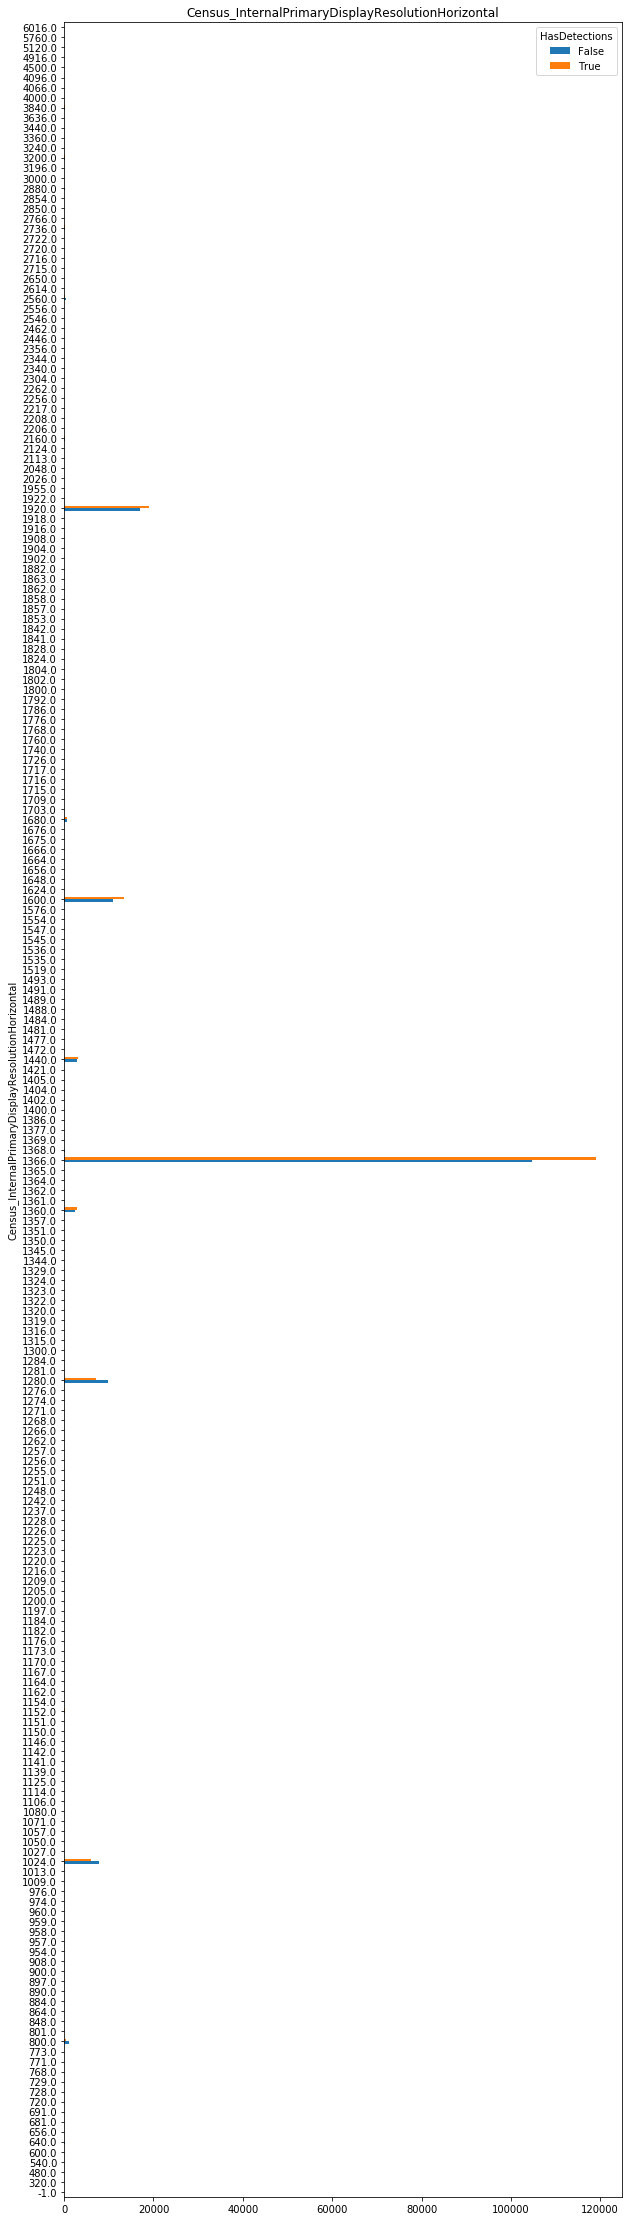

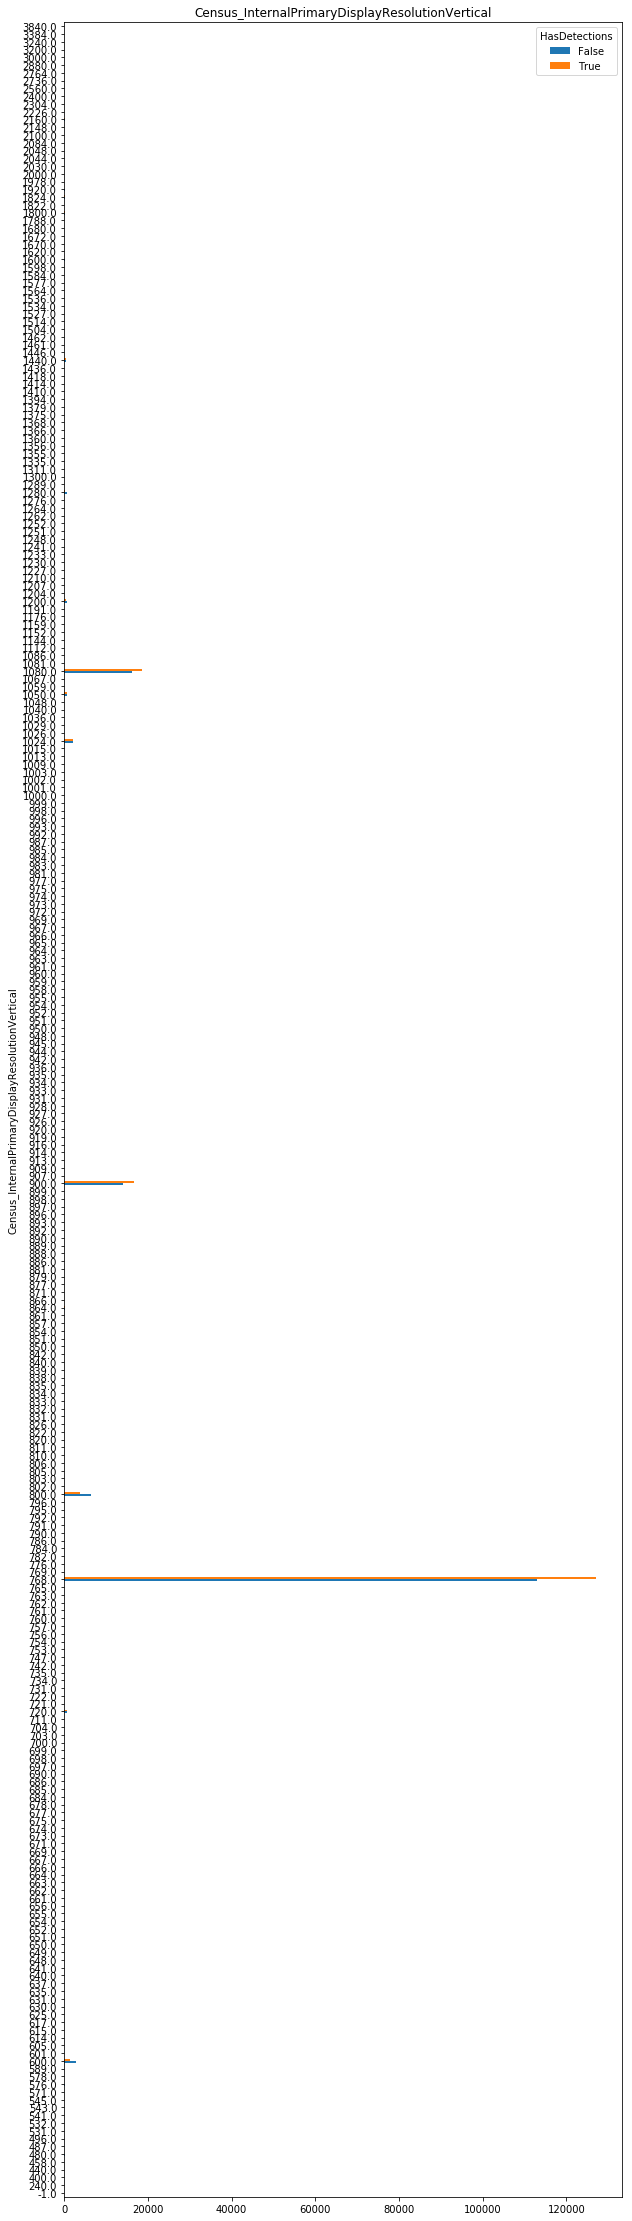

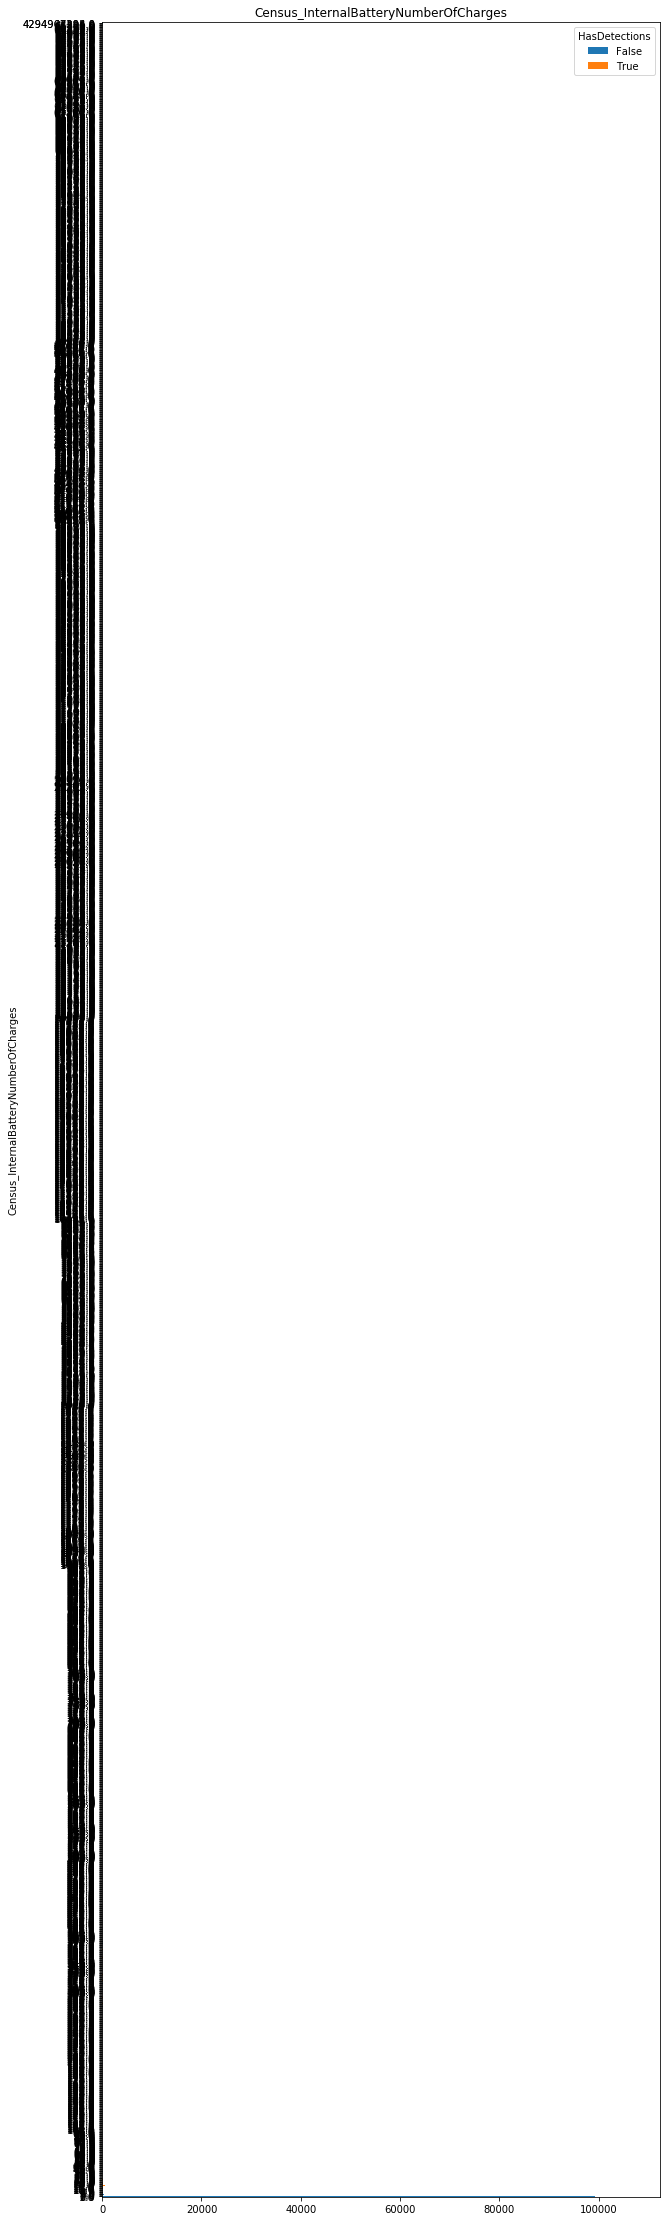

In [15]:
# Box Plots for all data classified as OS
# cols = list(set(cols_os) & set(cols_categorical_large))
# cols = cols + list(set(cols_os) & set(cols_booleans))

for col in cols_numerical:
    ct = pd.crosstab(
        [final[col].fillna("NULL").astype(object)], 
        final.HasDetections.astype(bool))

    ct.plot(kind='barh',figsize = (10,40), title=col)

/Users/christopherballenger/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


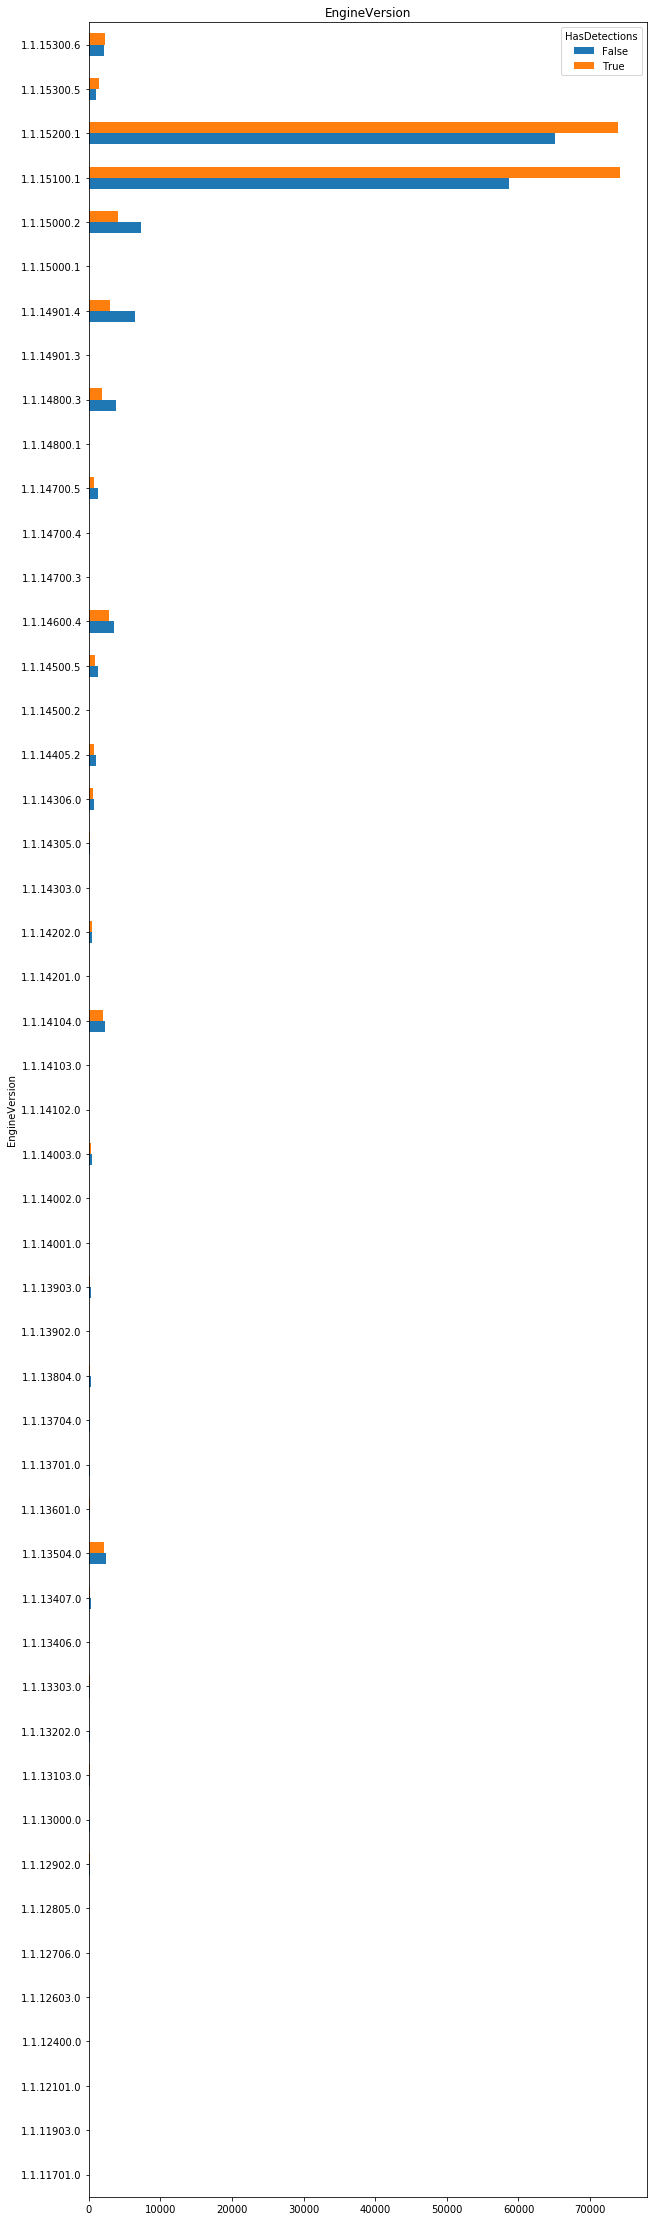

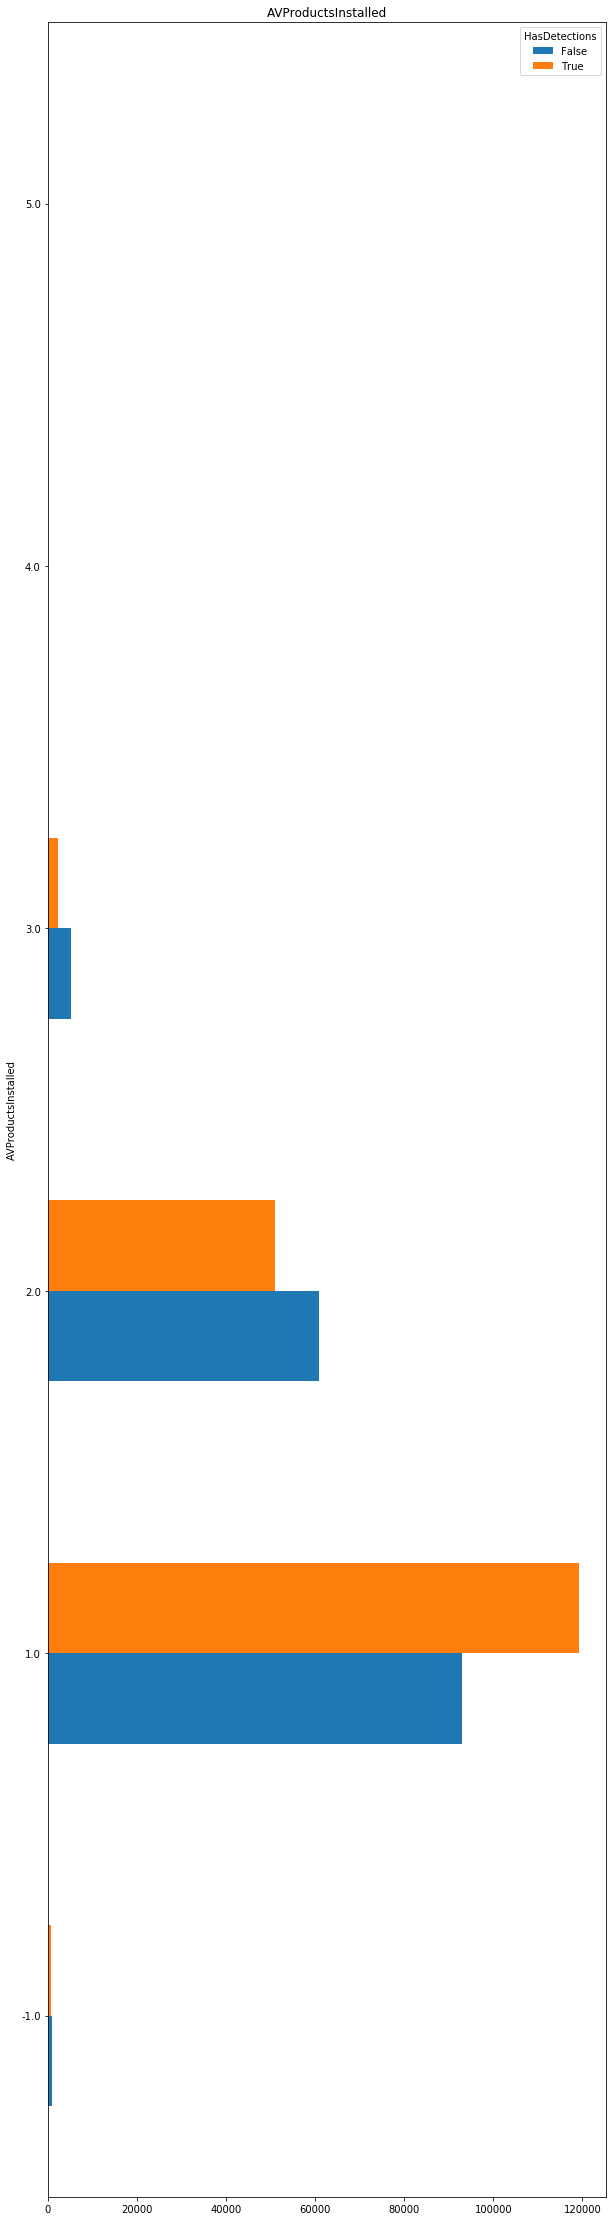

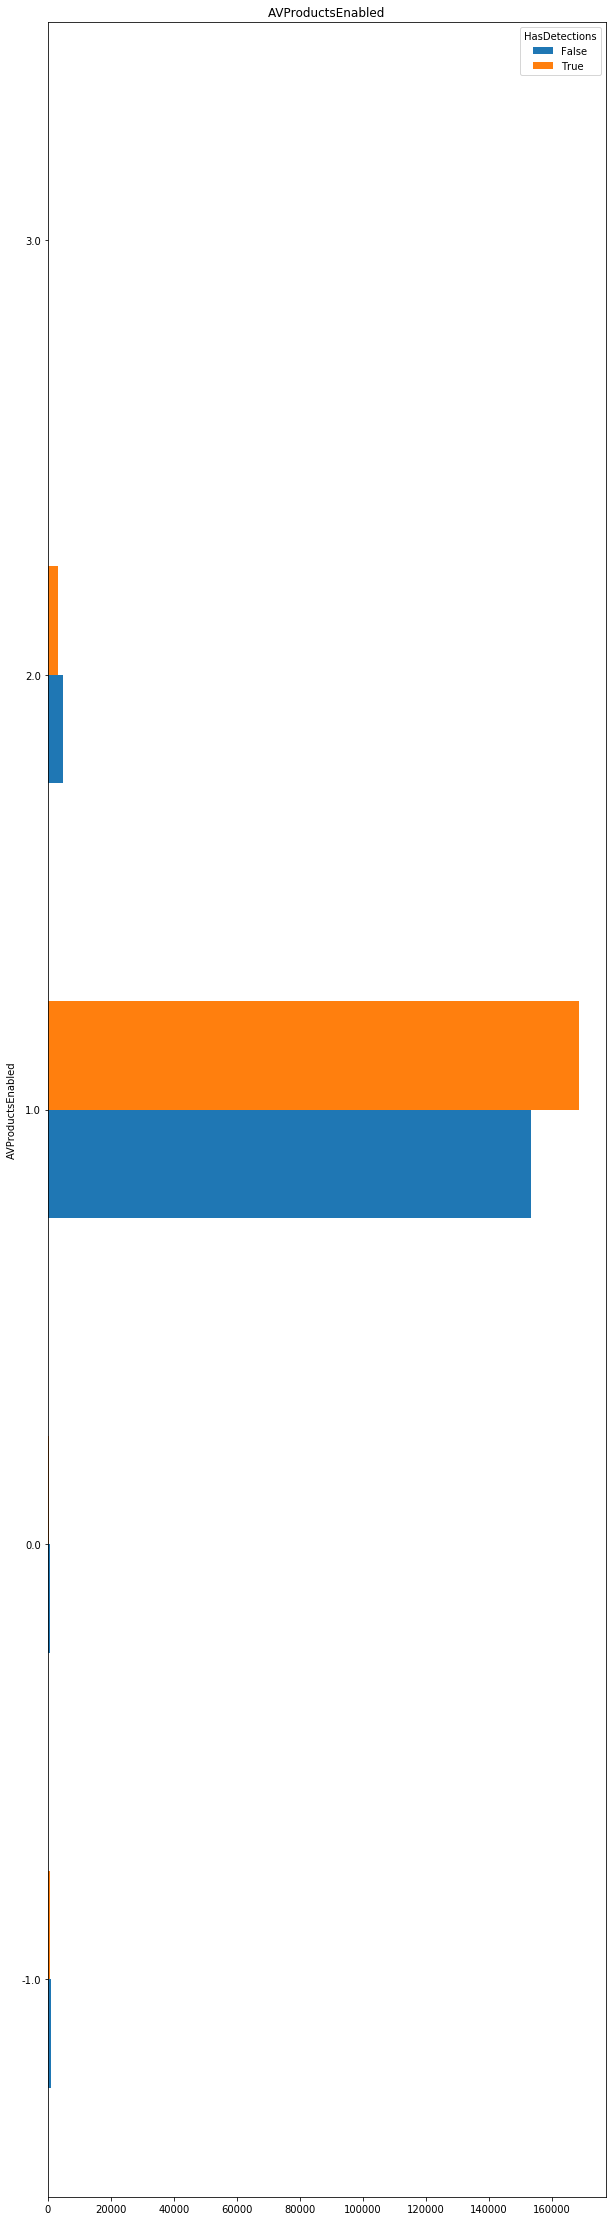

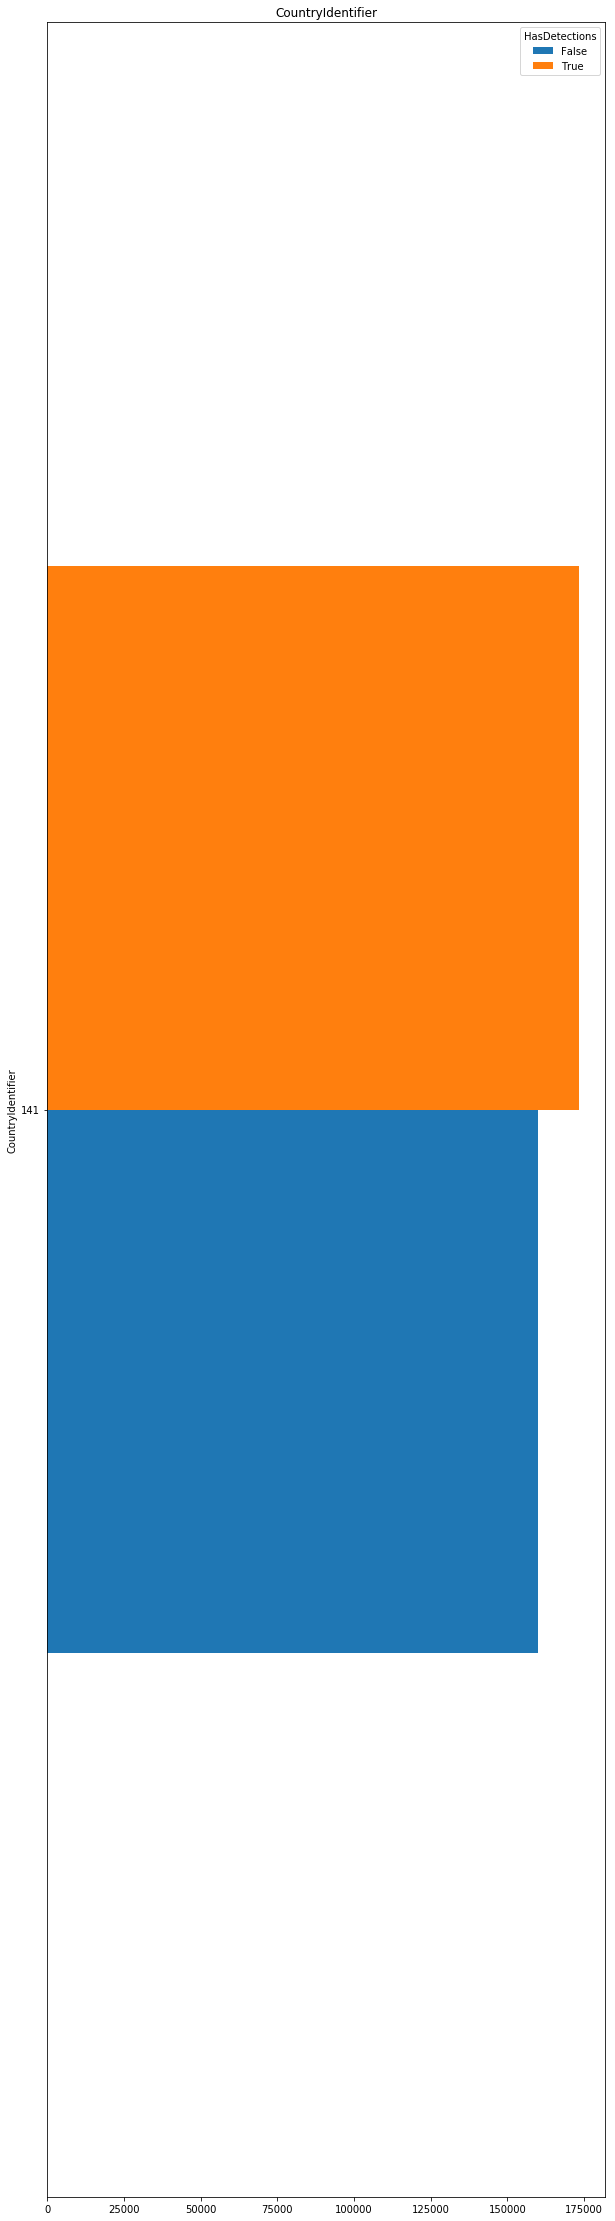

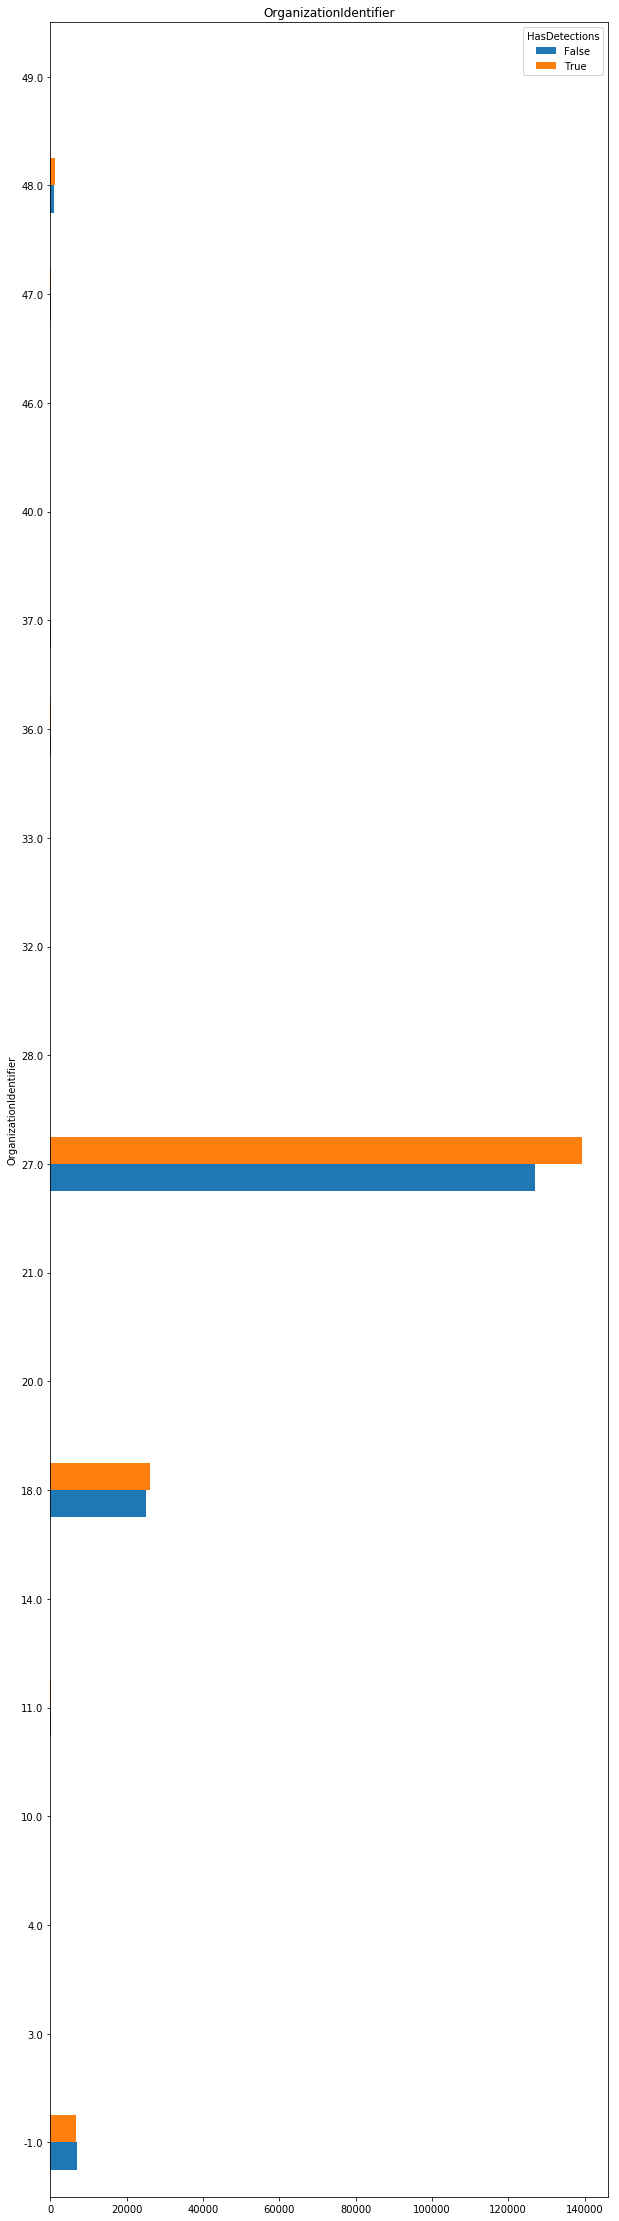

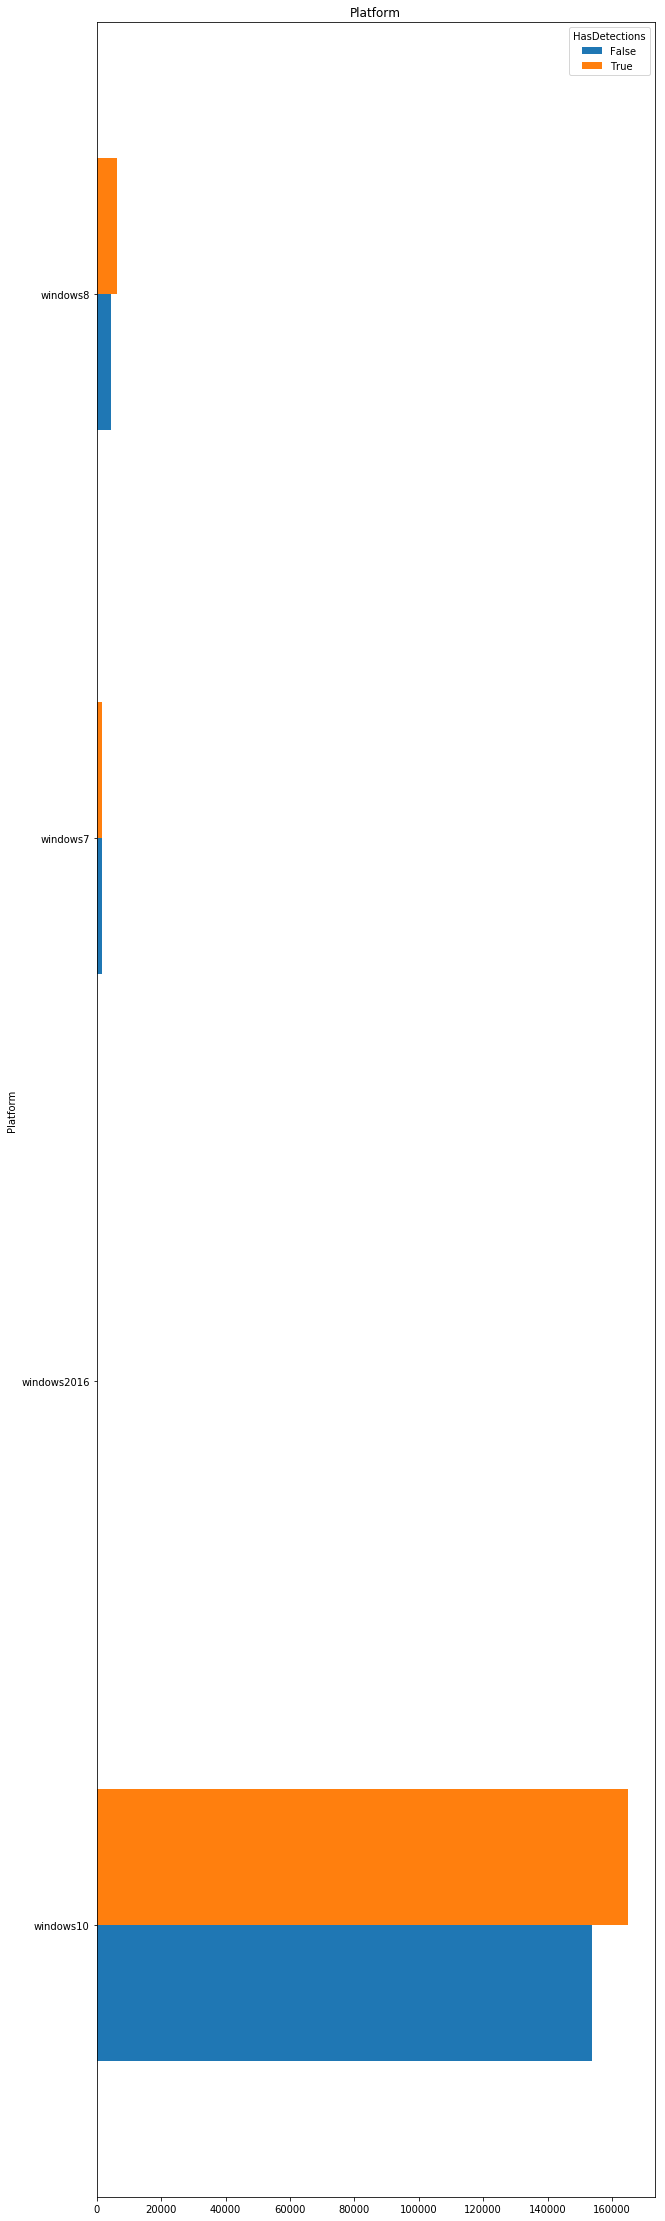

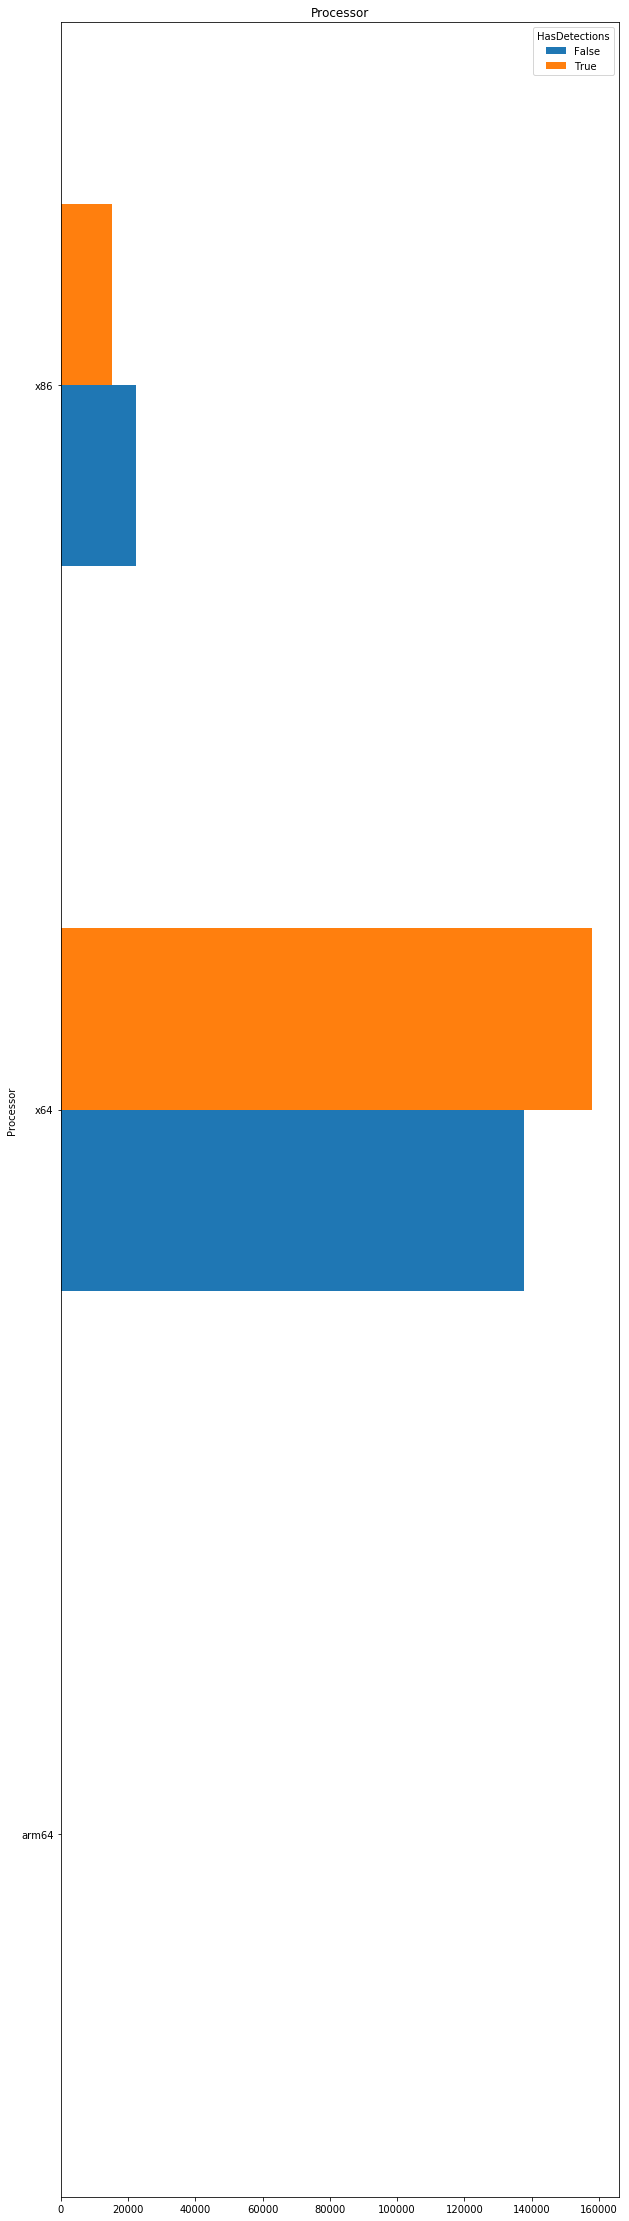

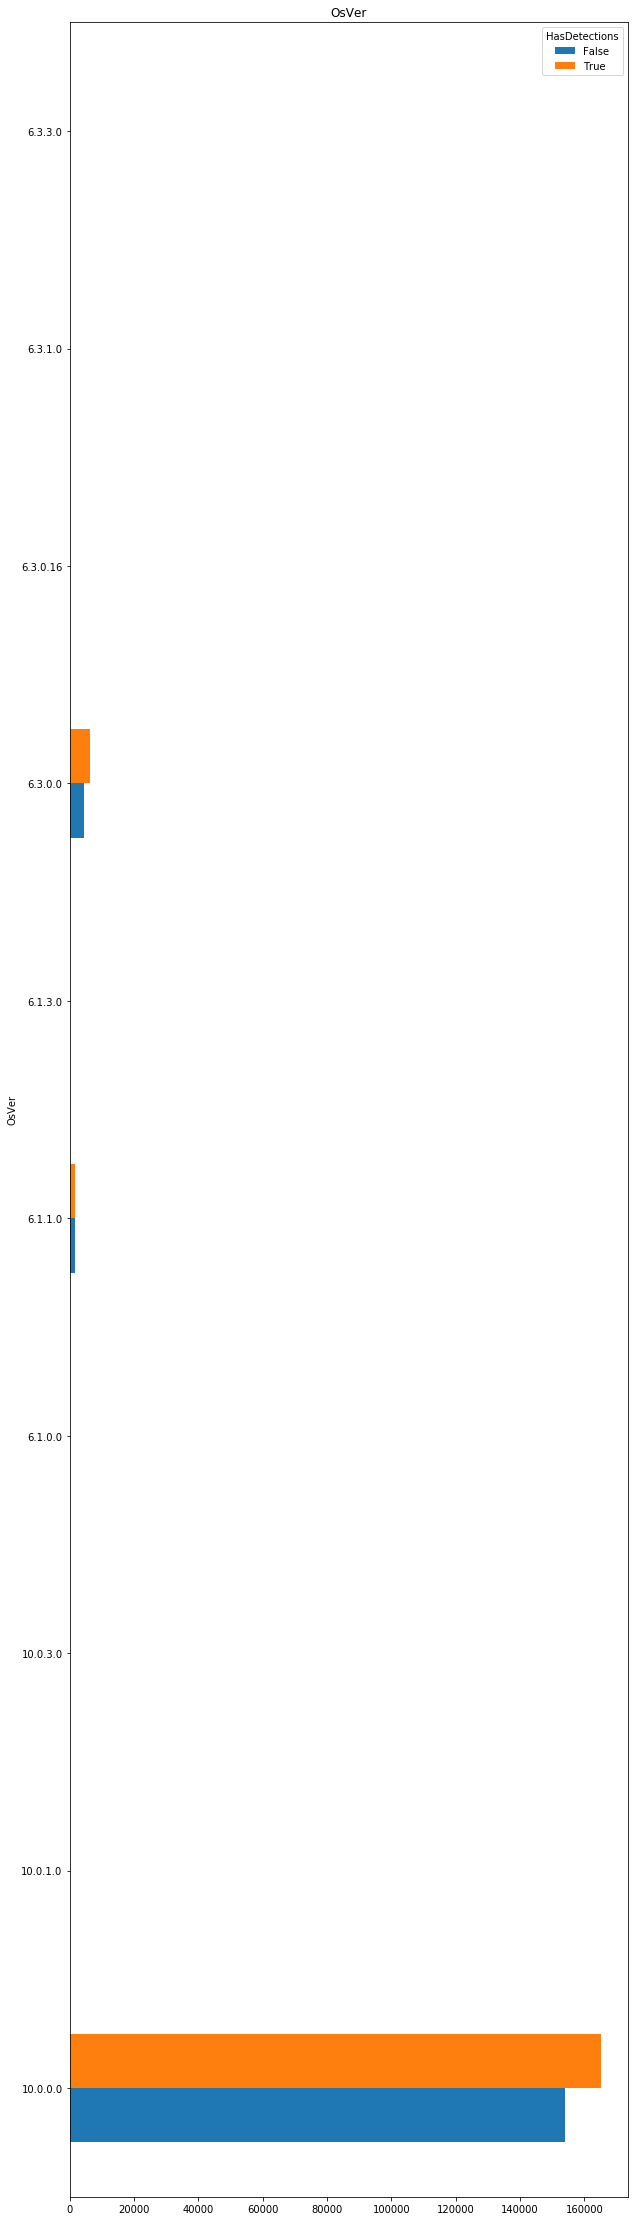

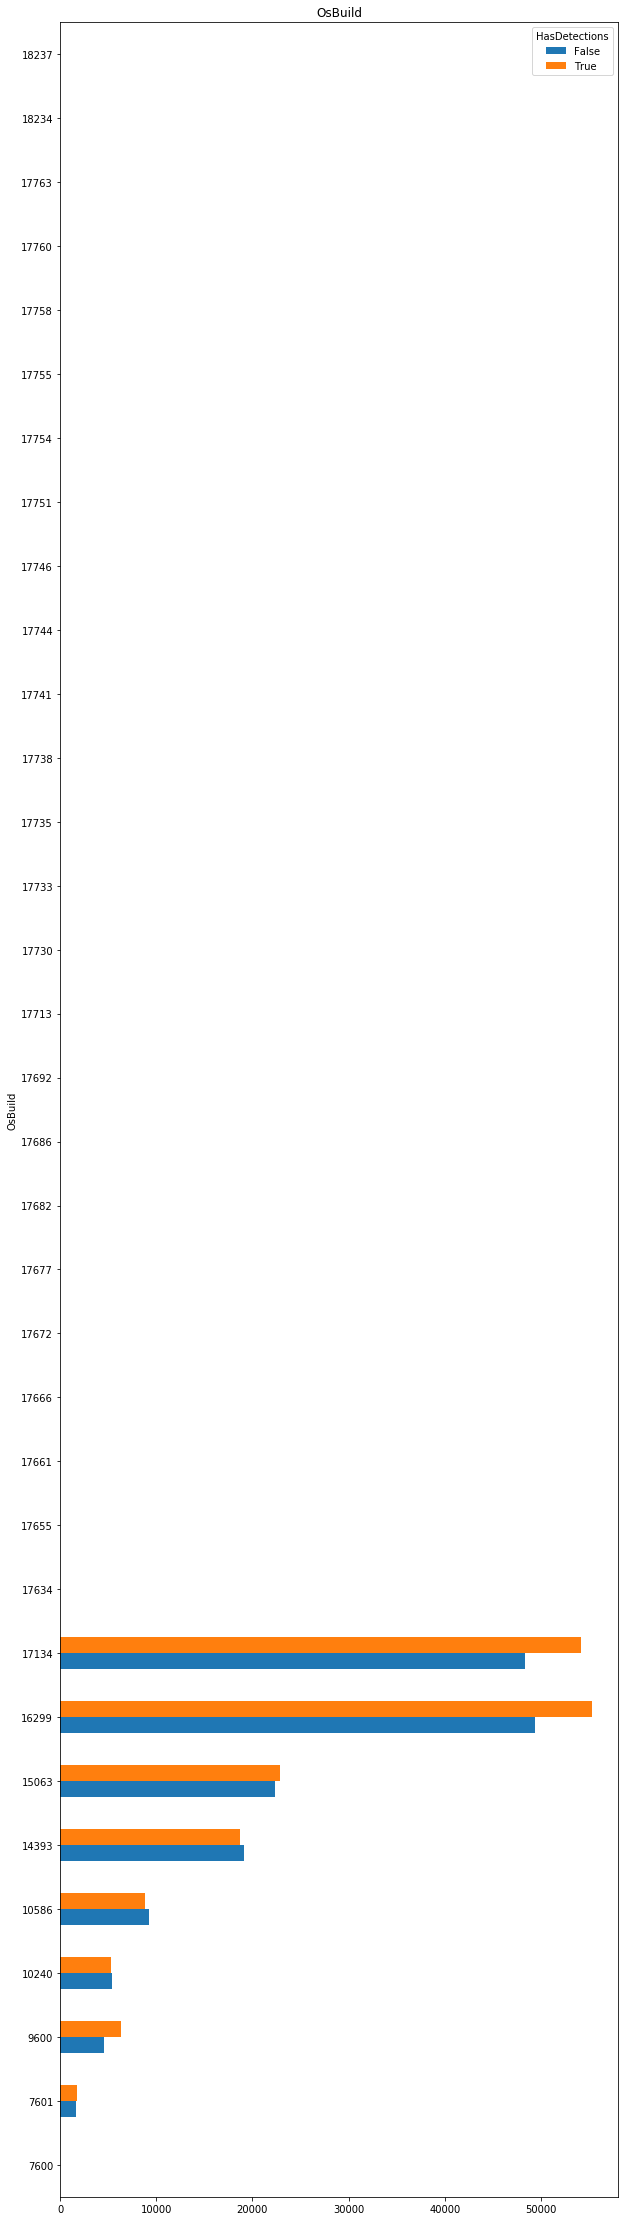

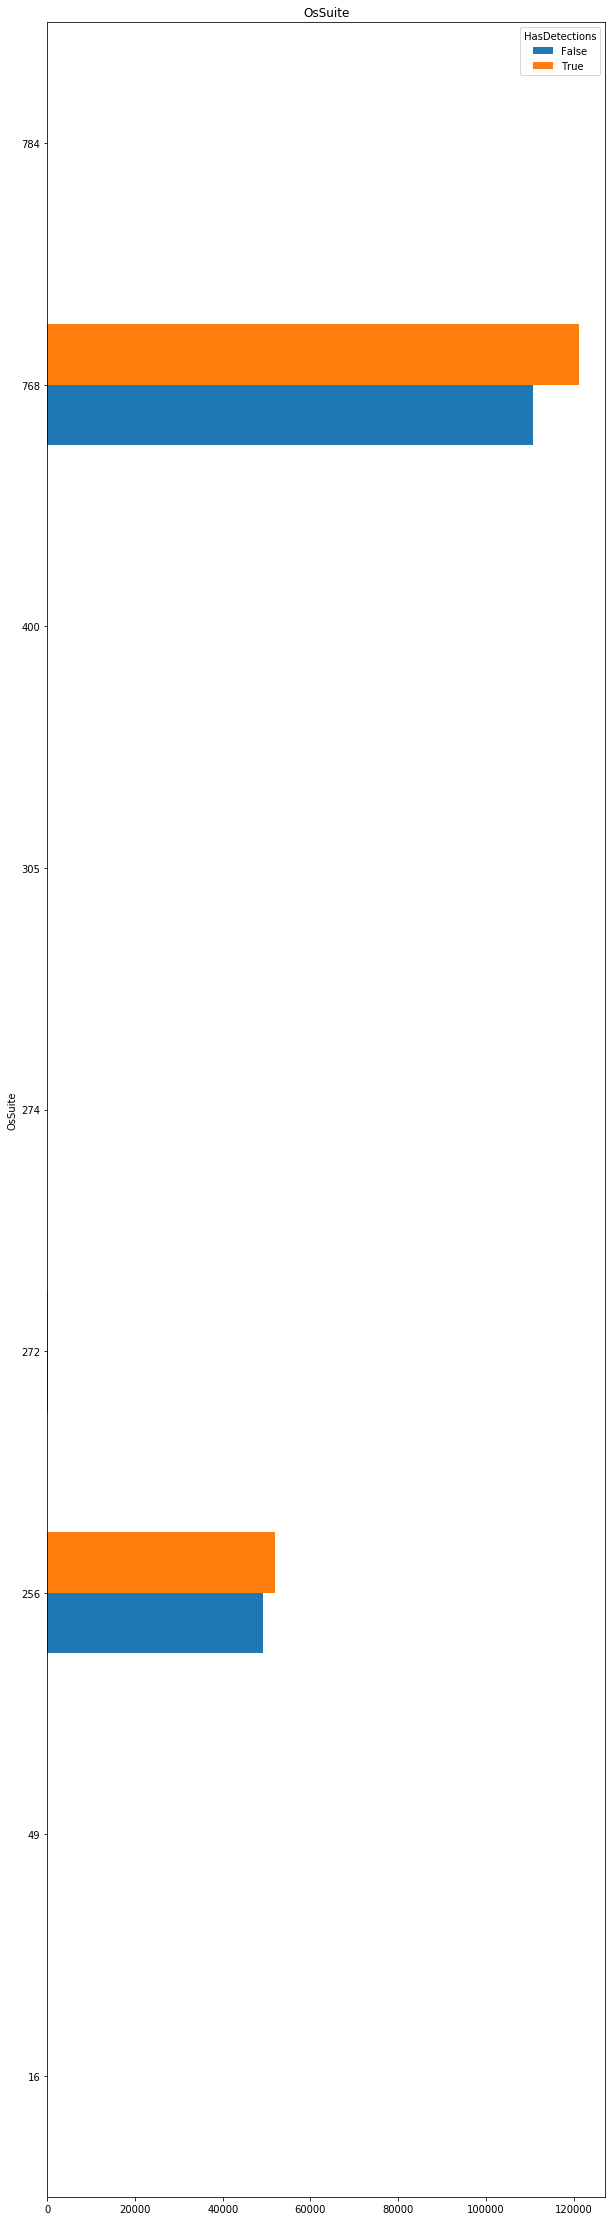

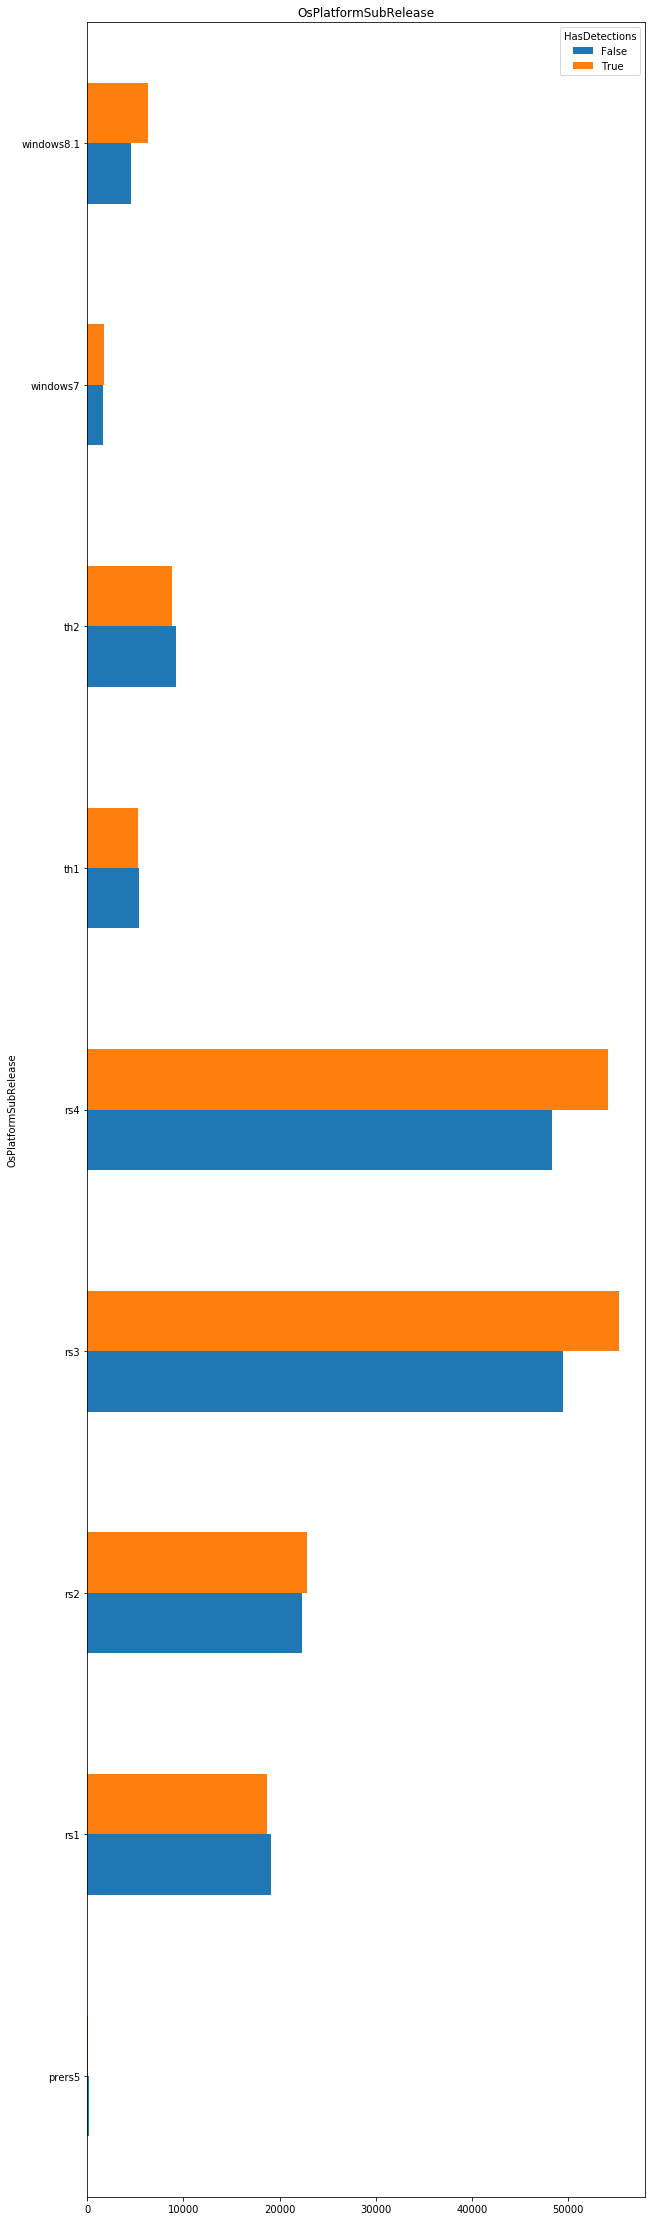

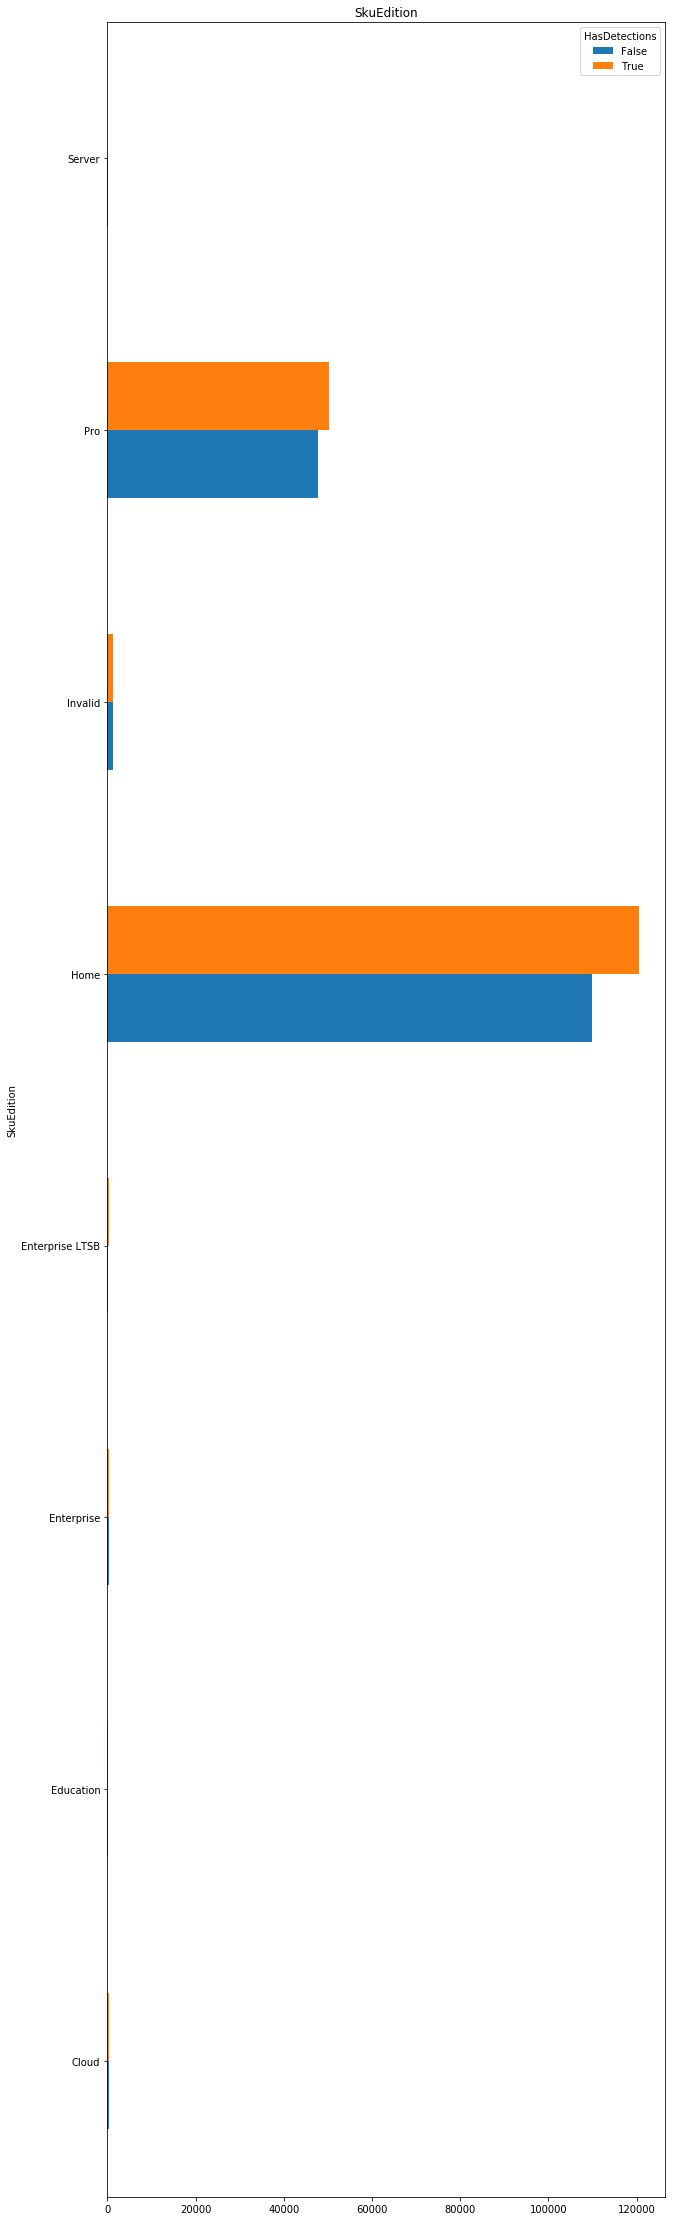

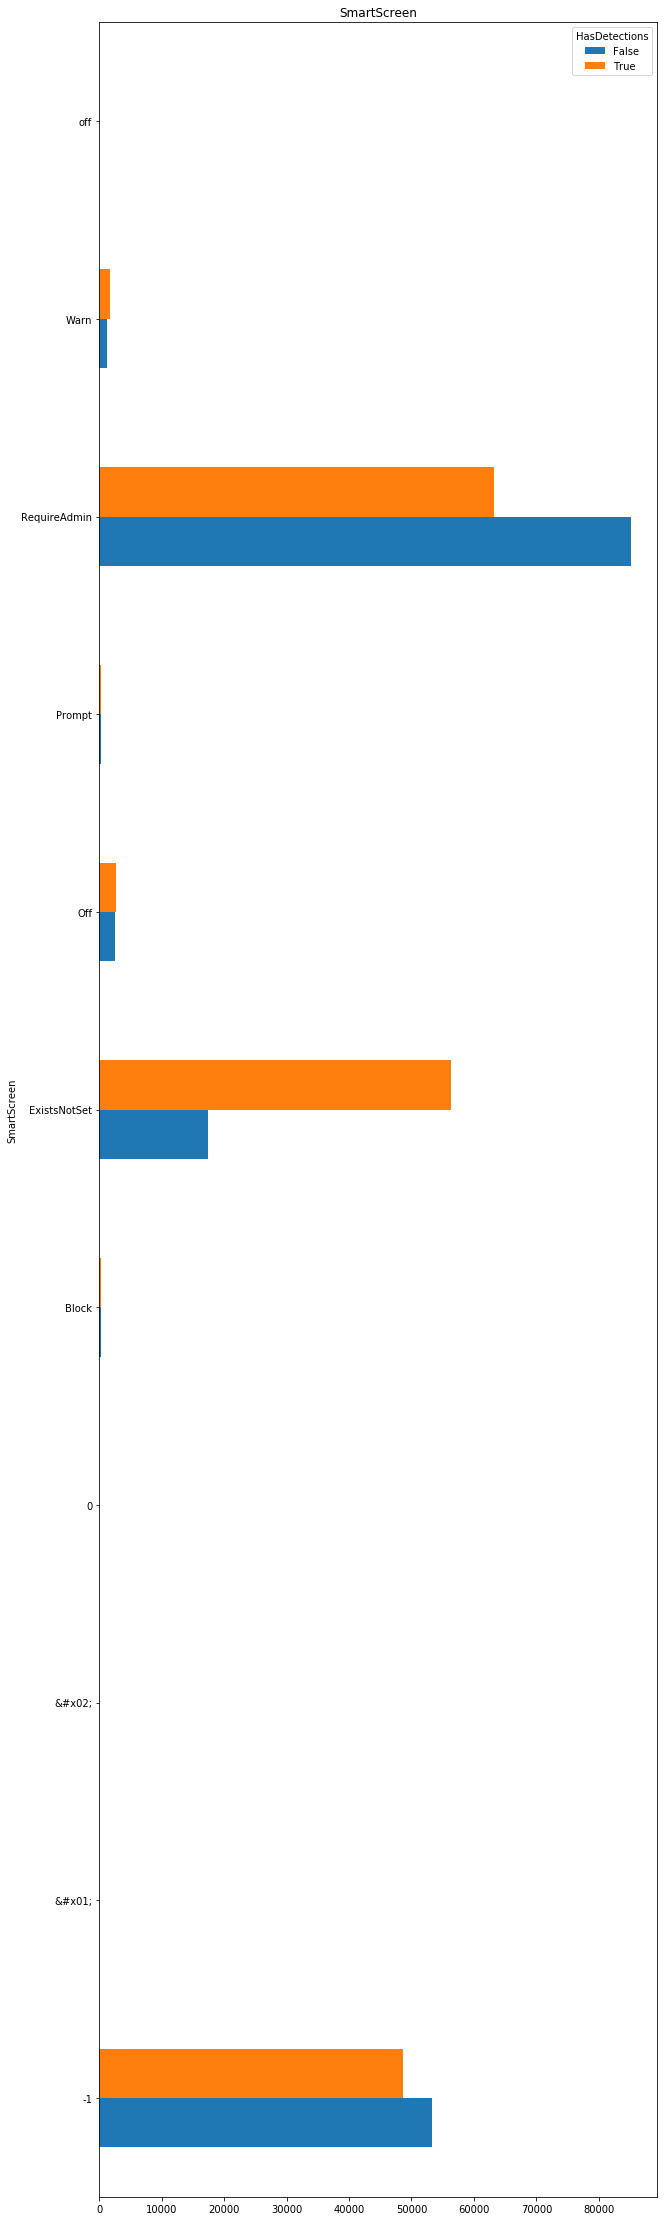

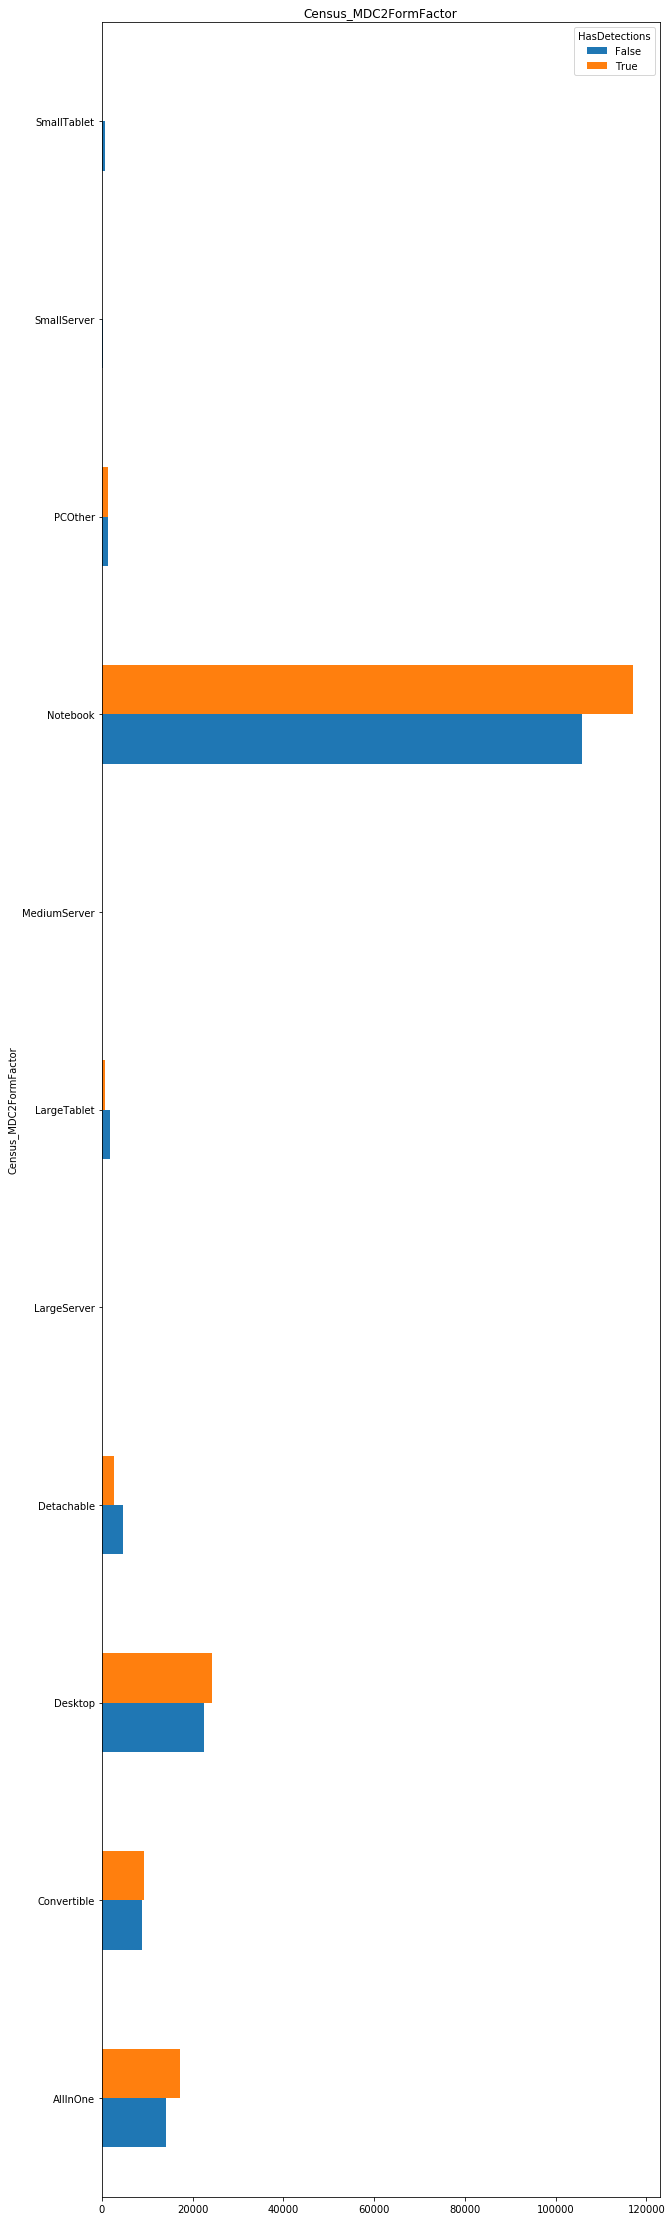

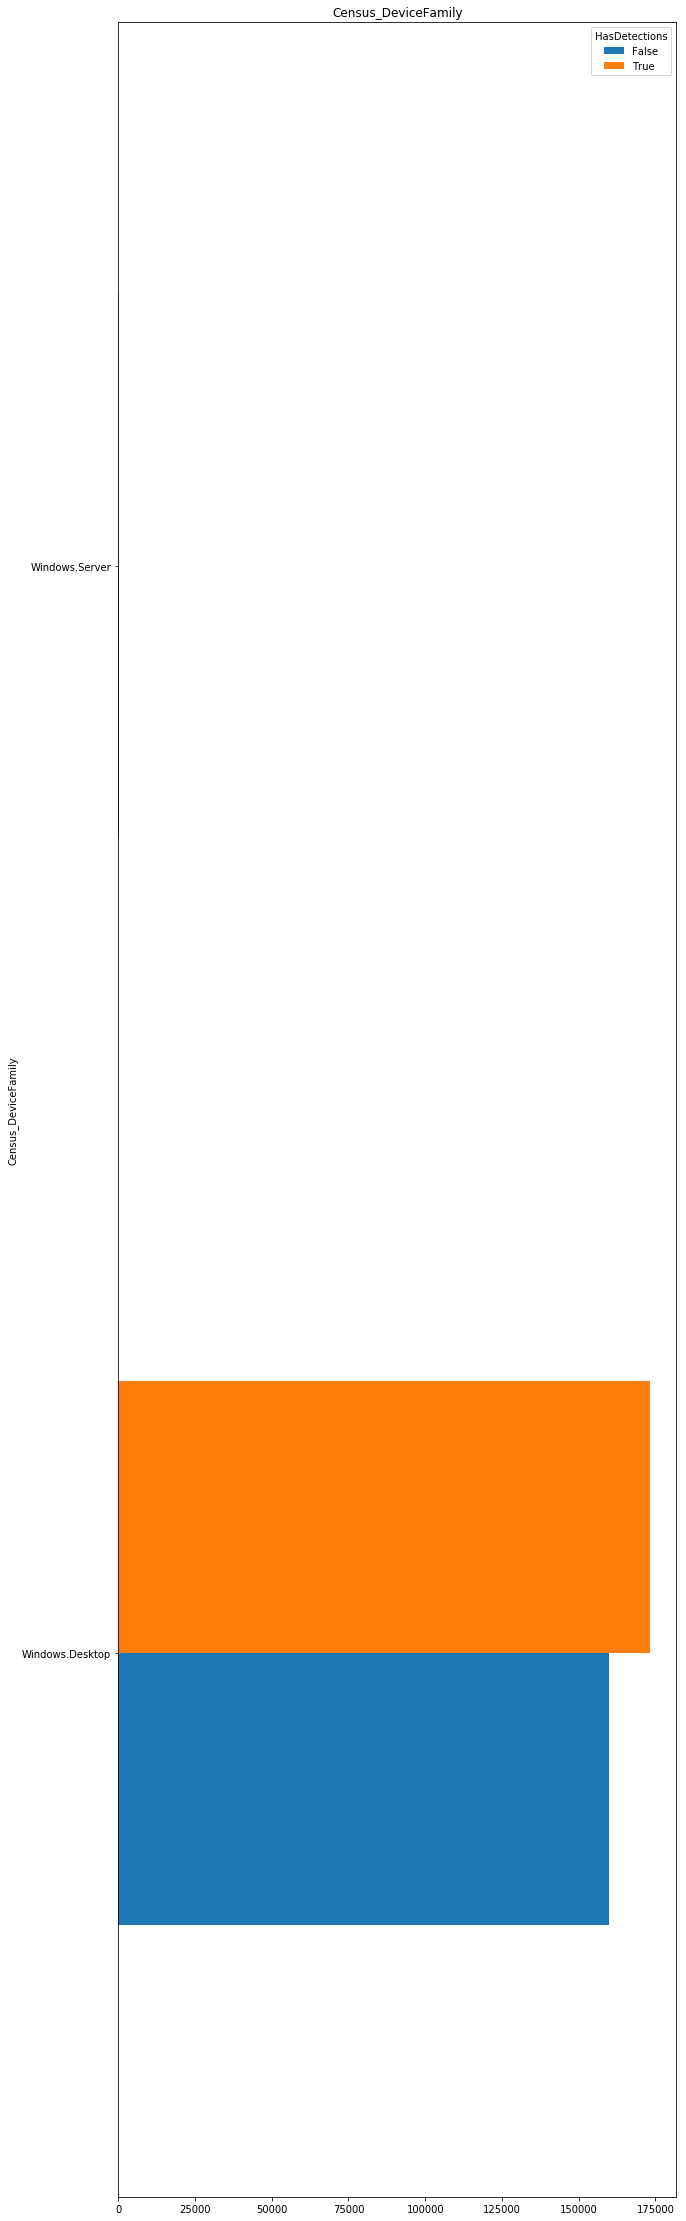

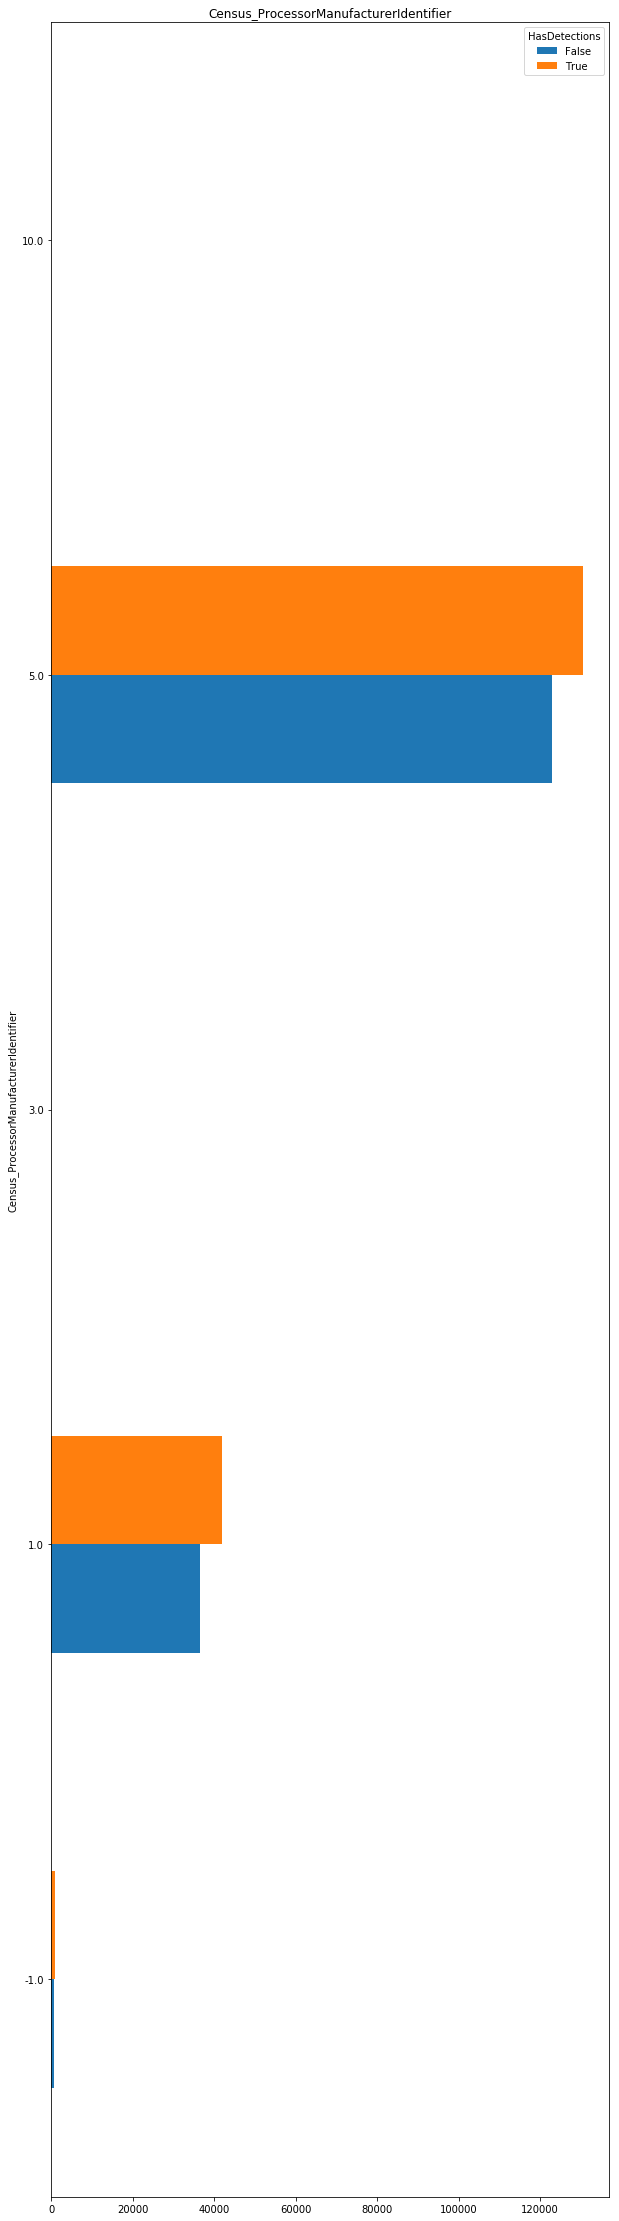

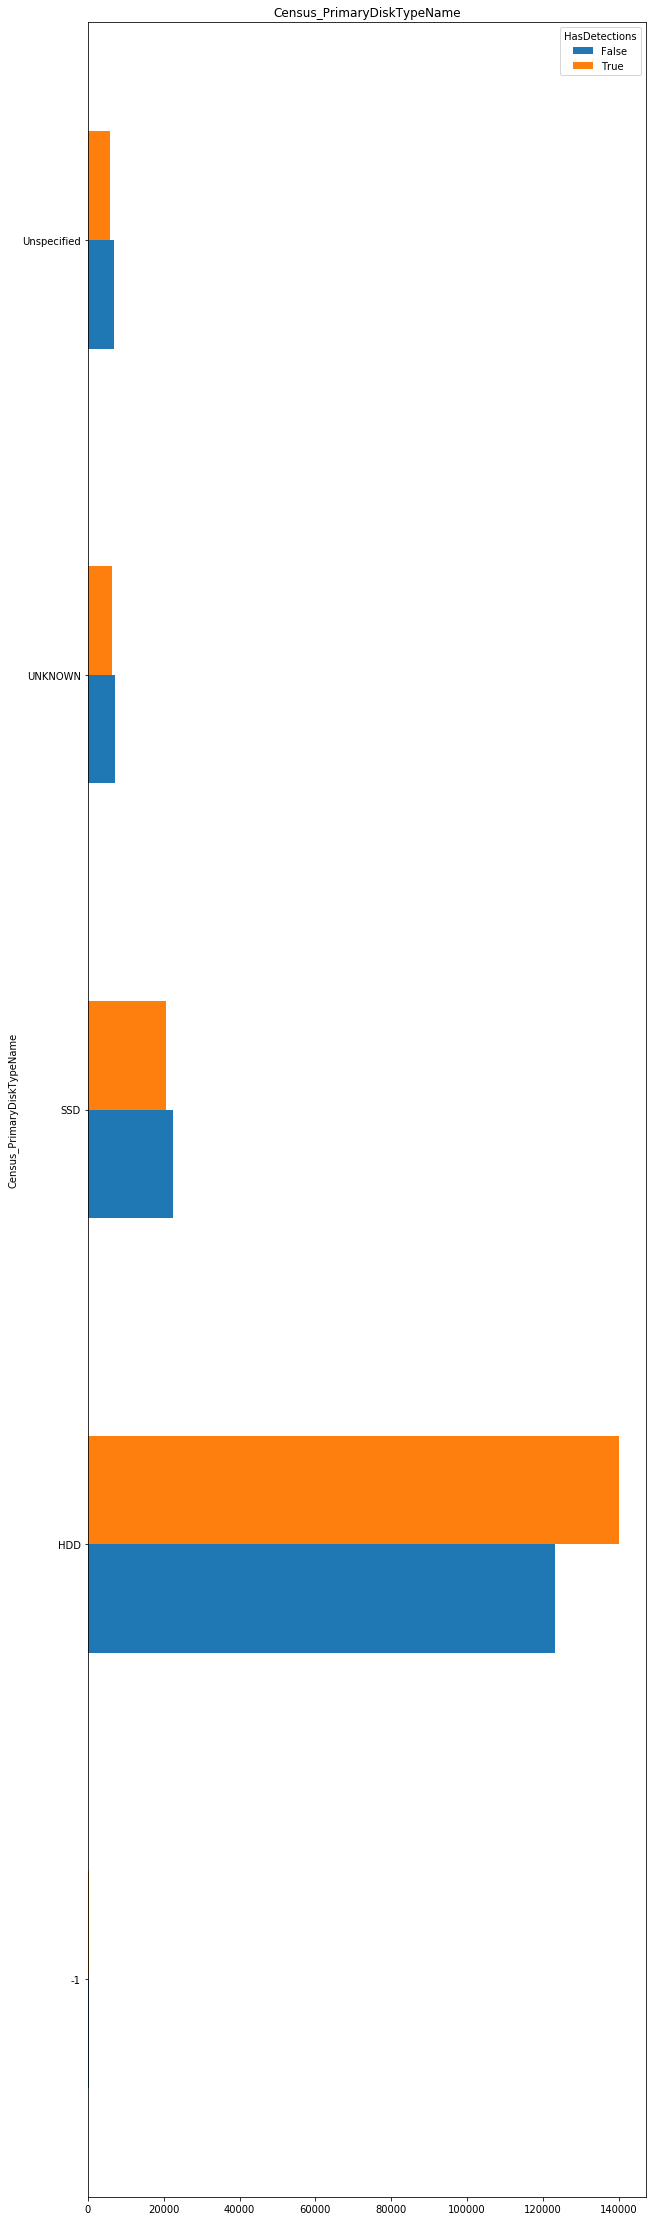

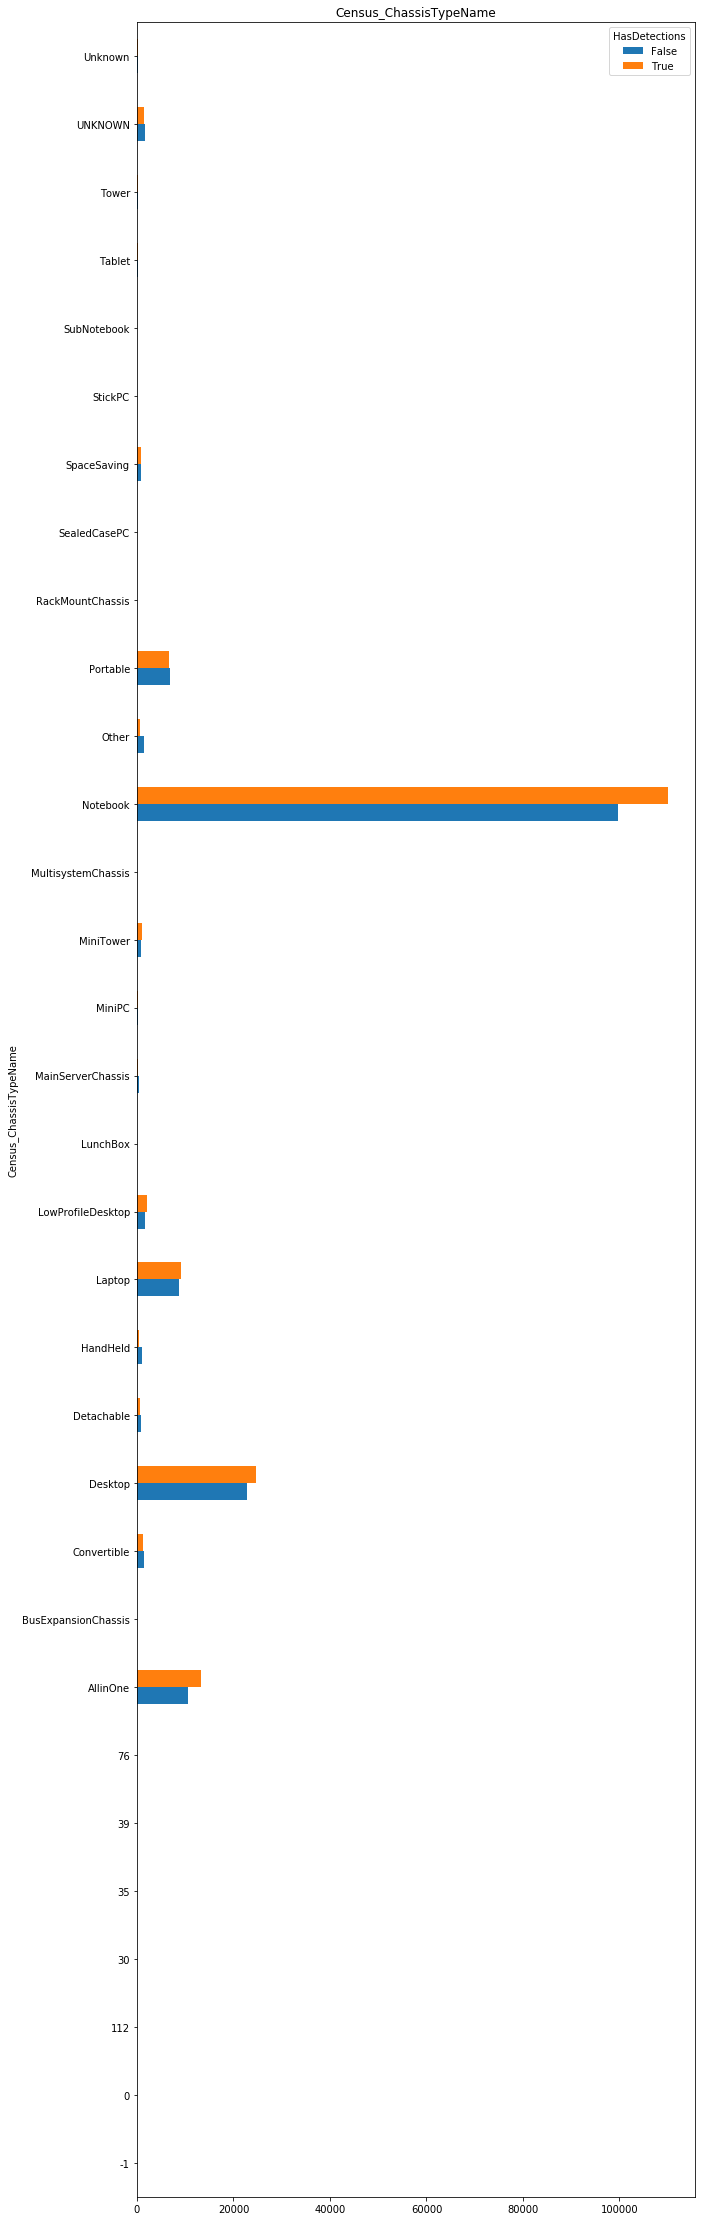

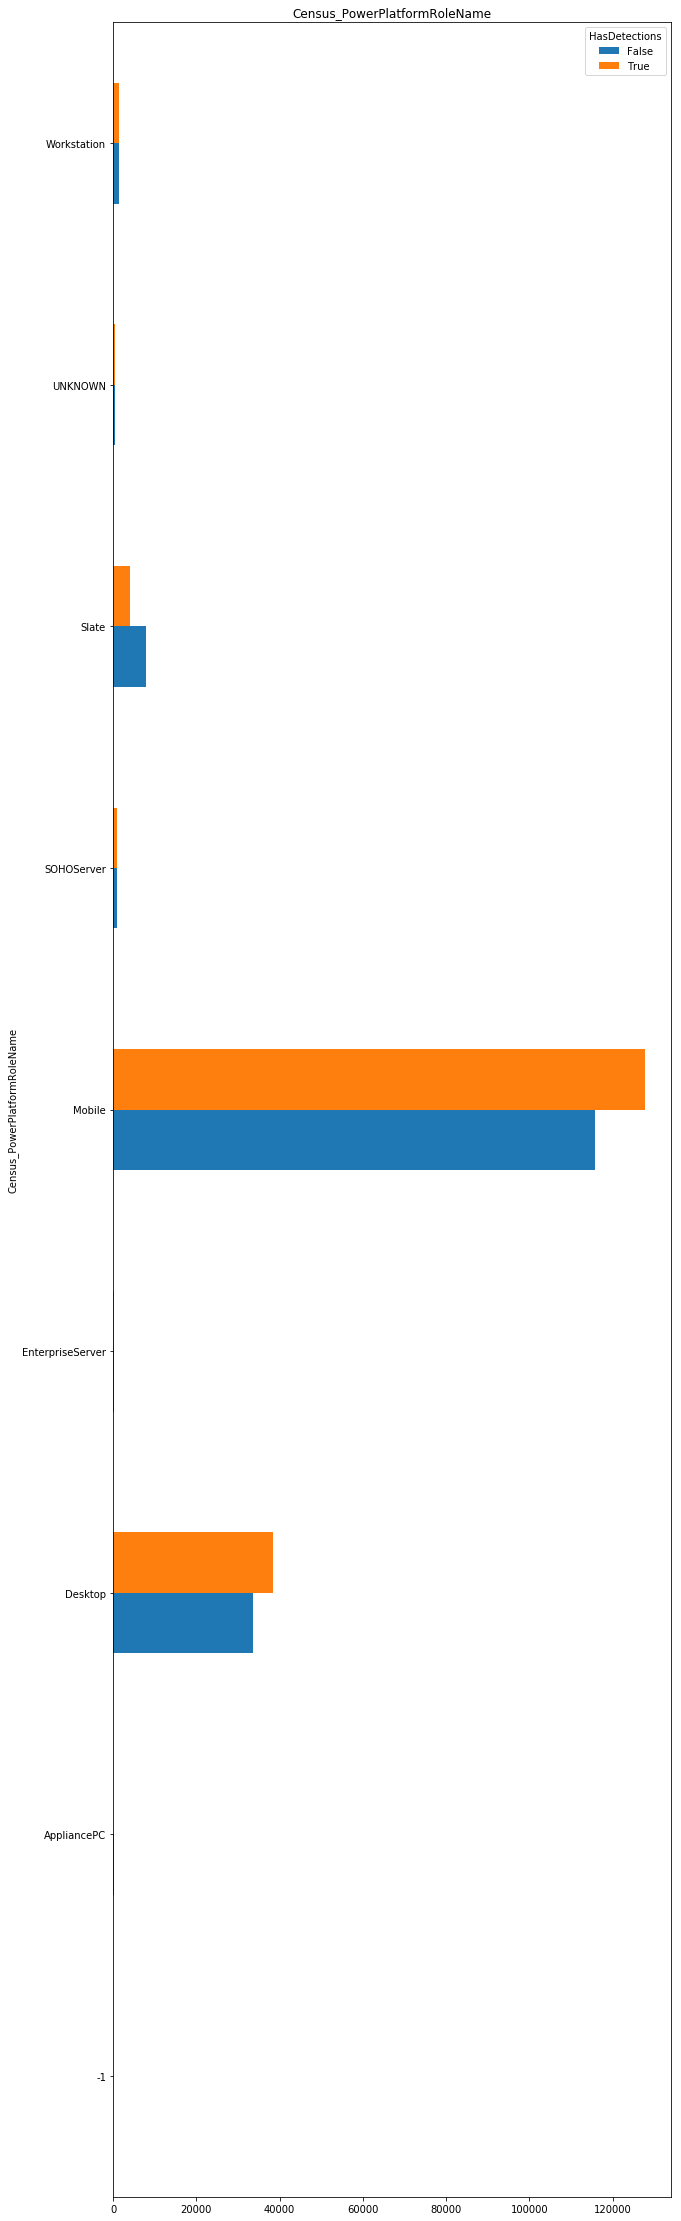

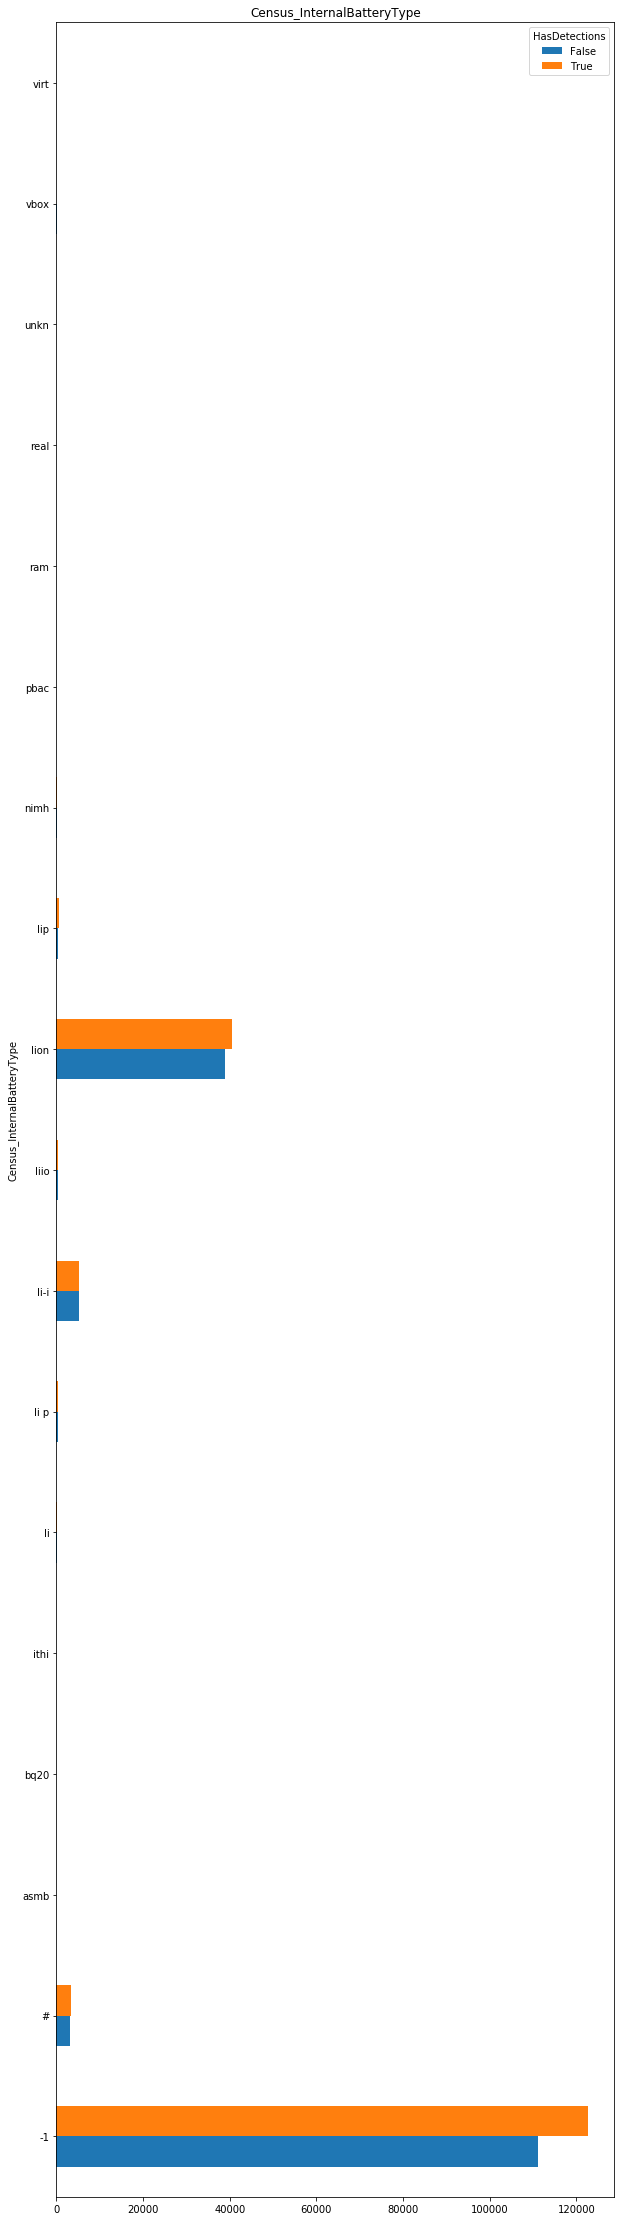

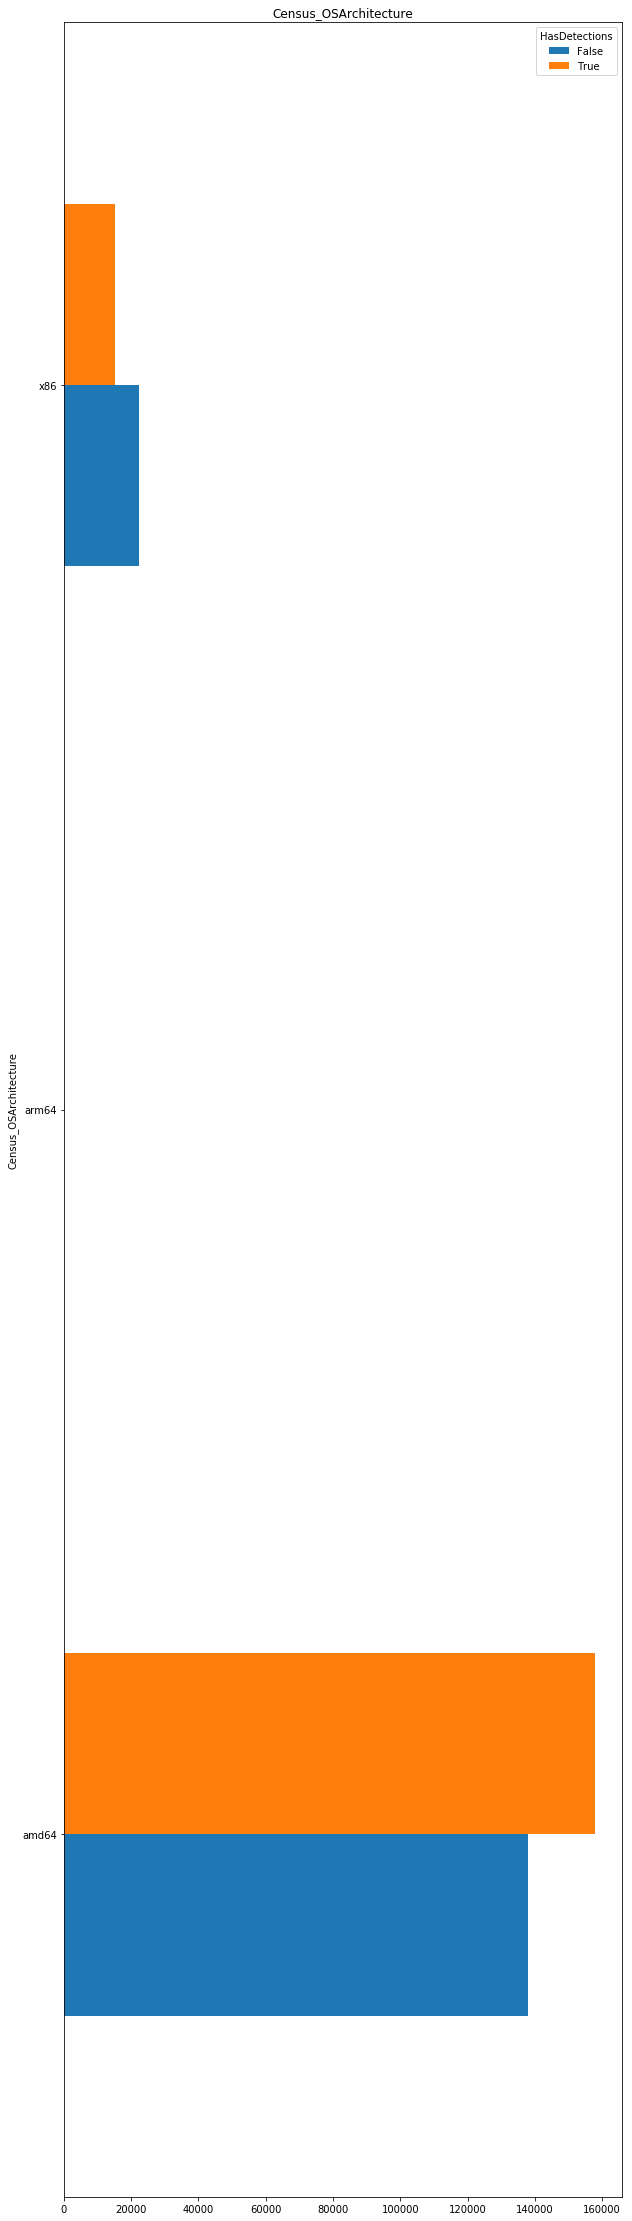

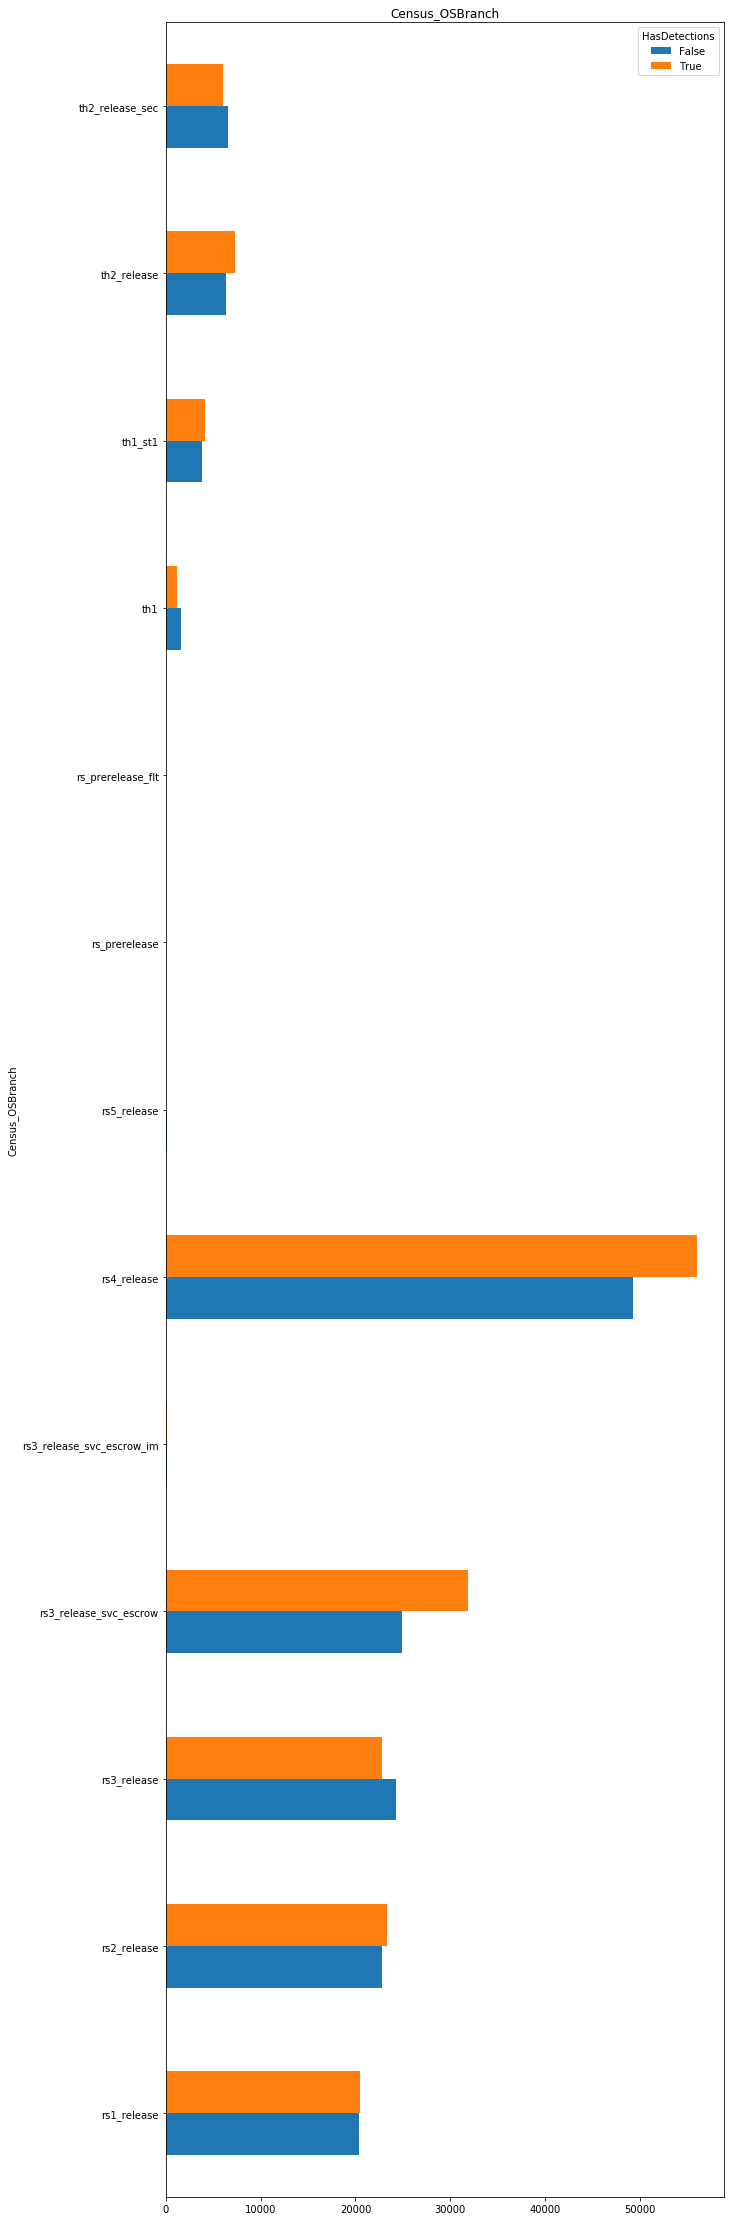

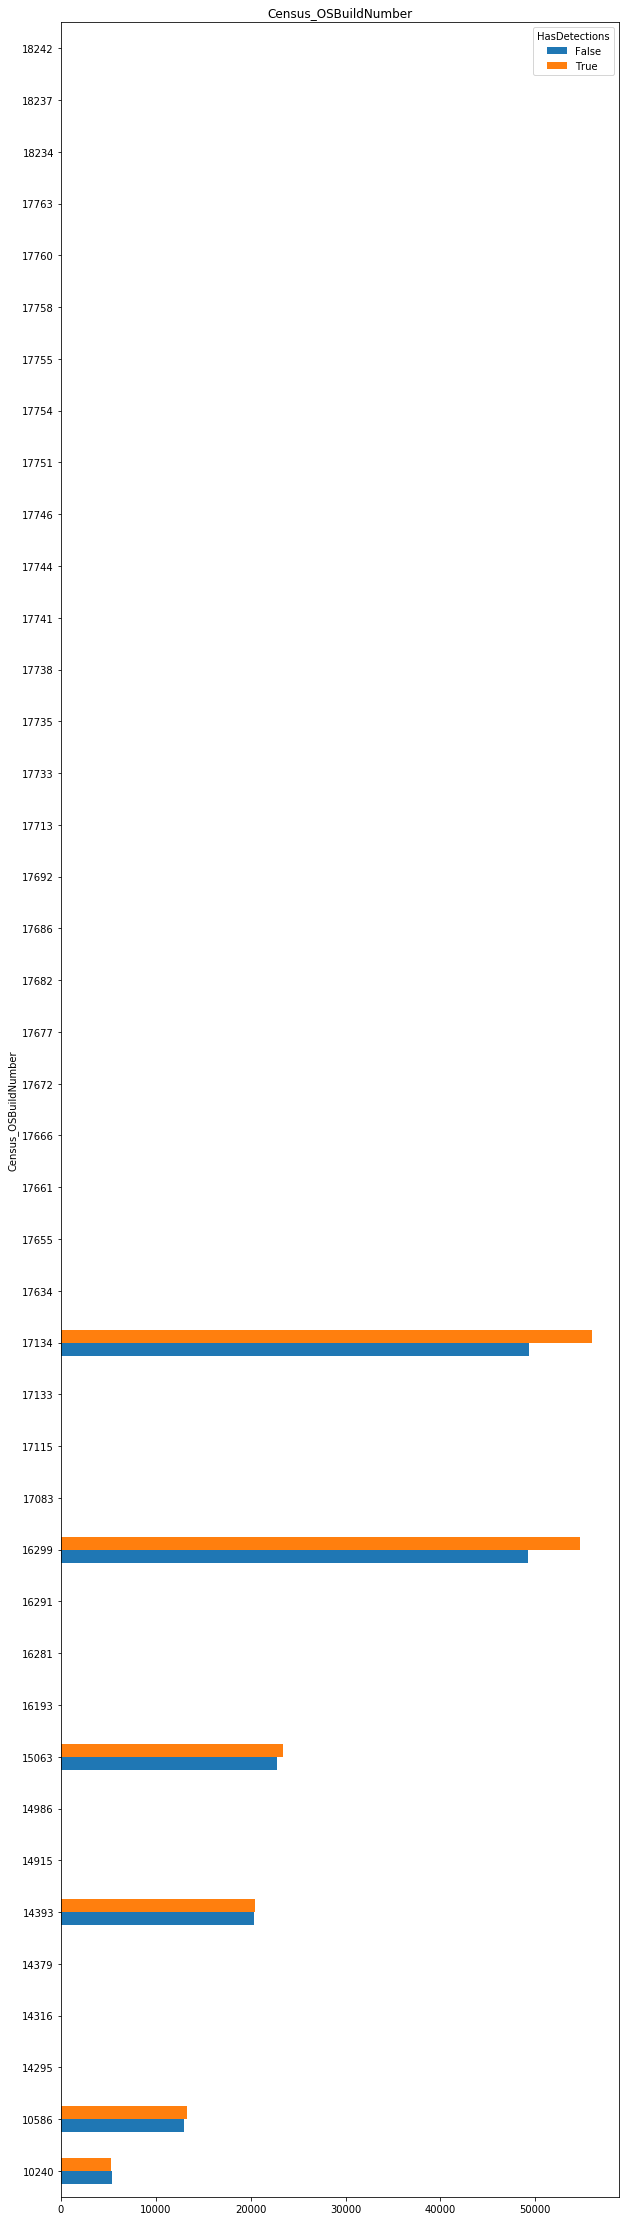

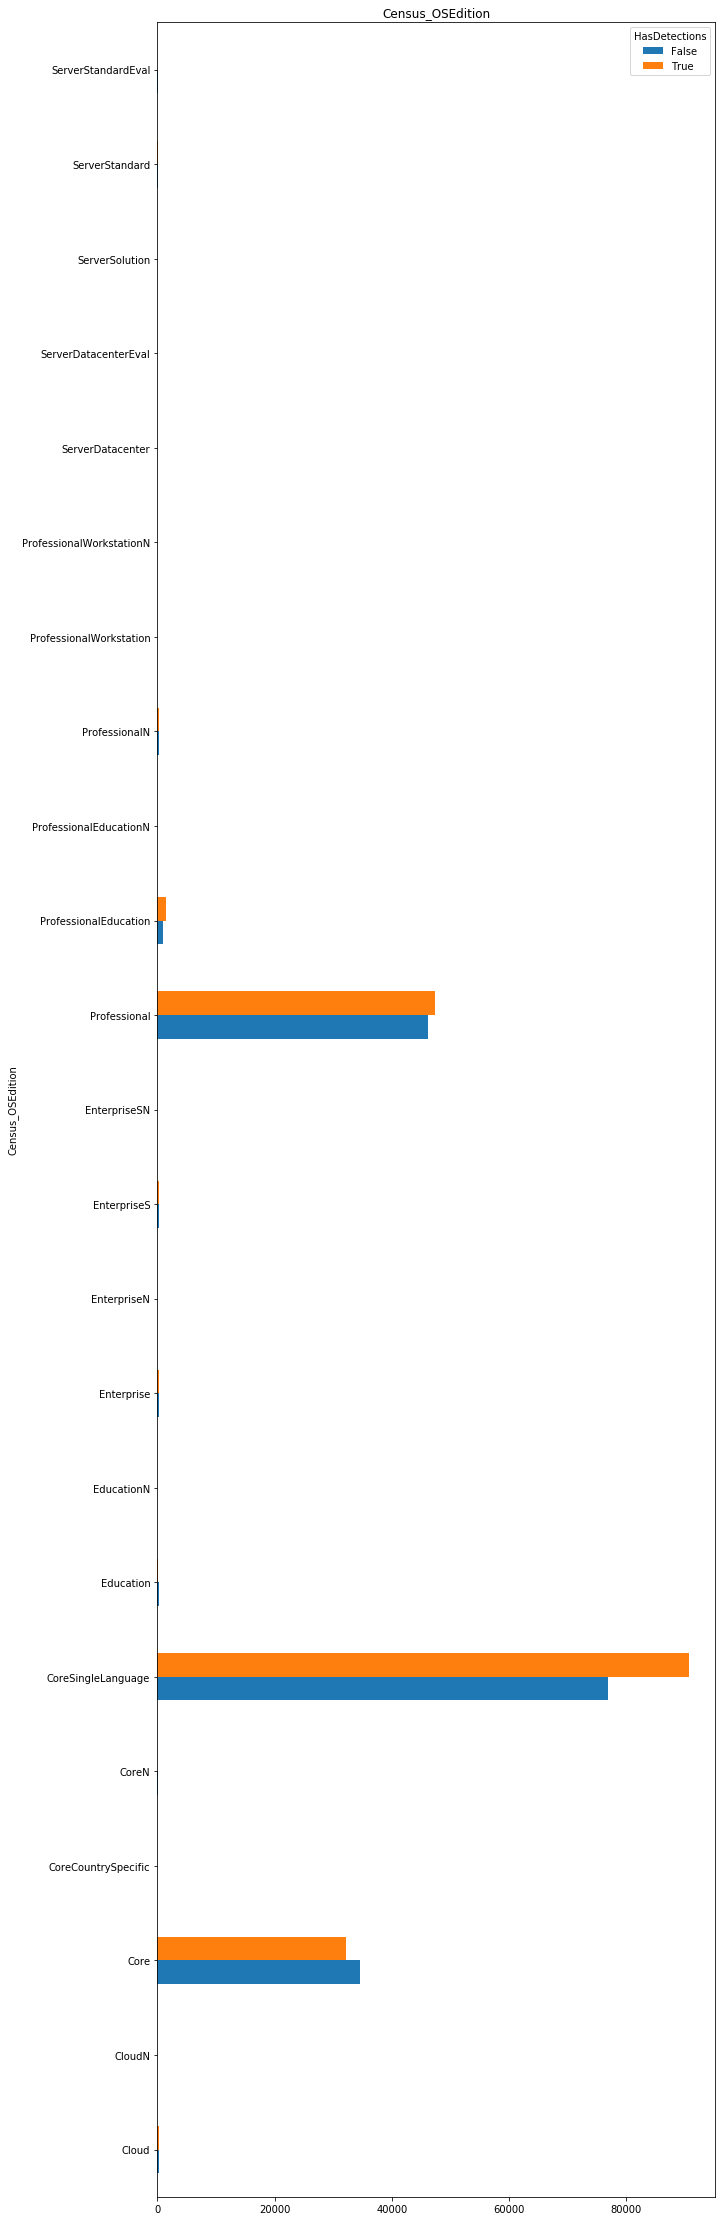

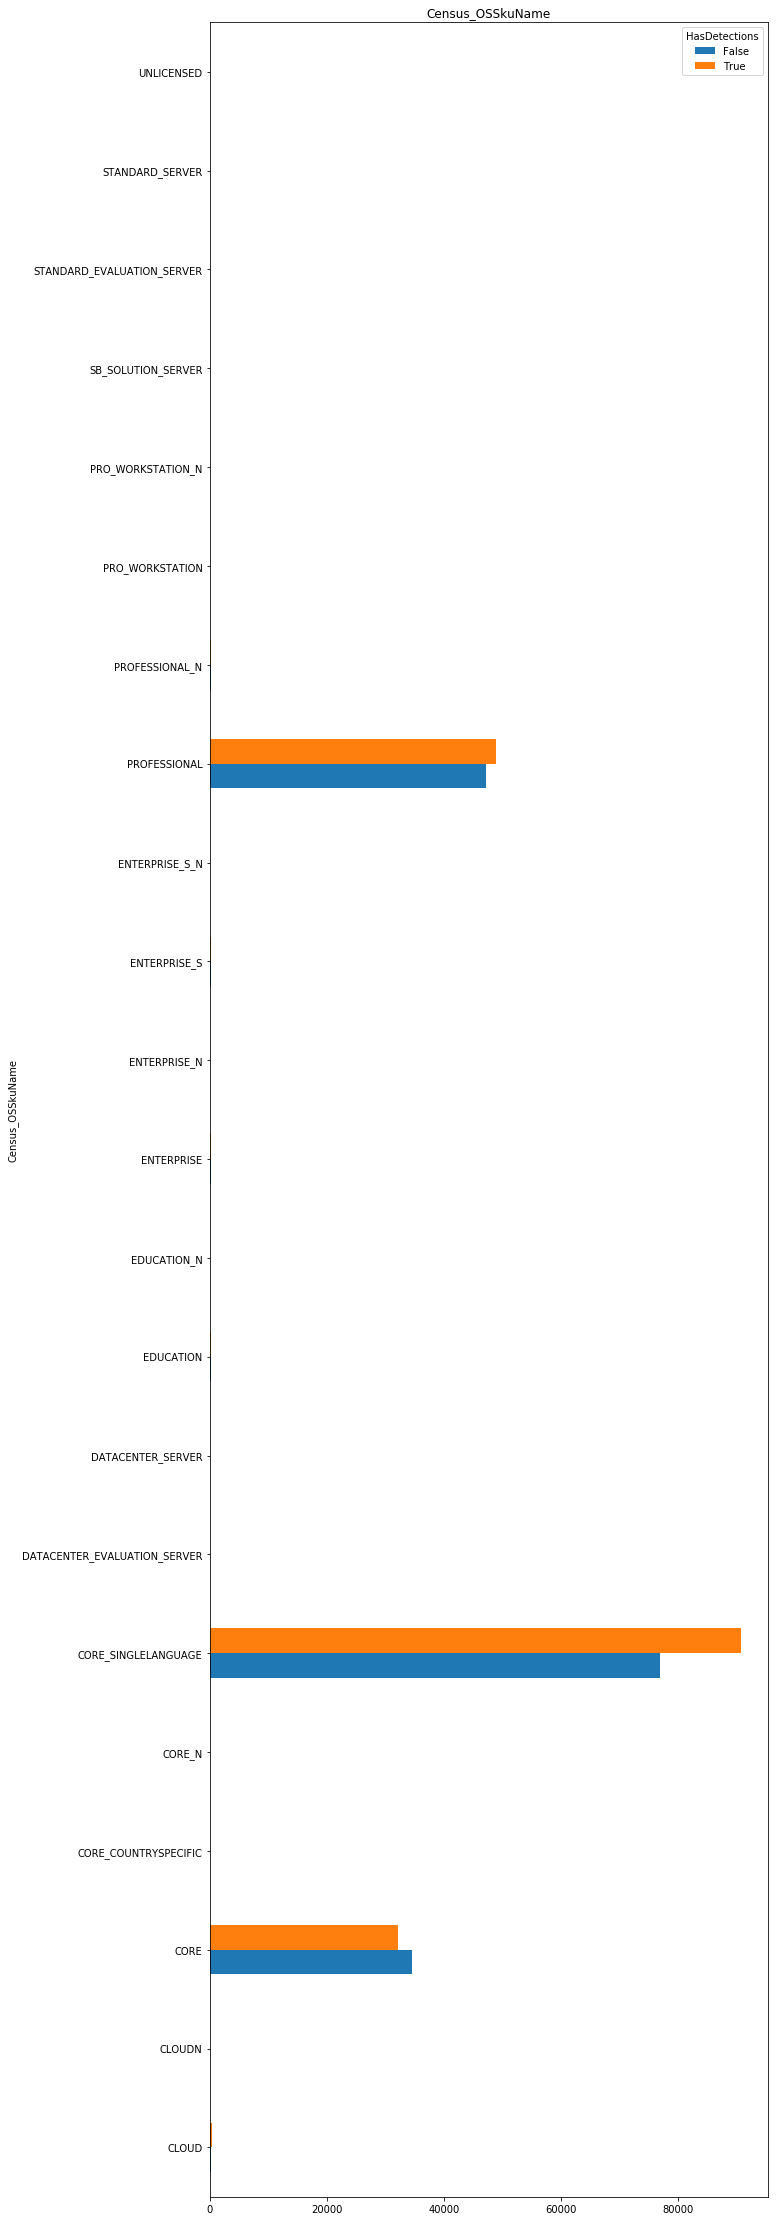

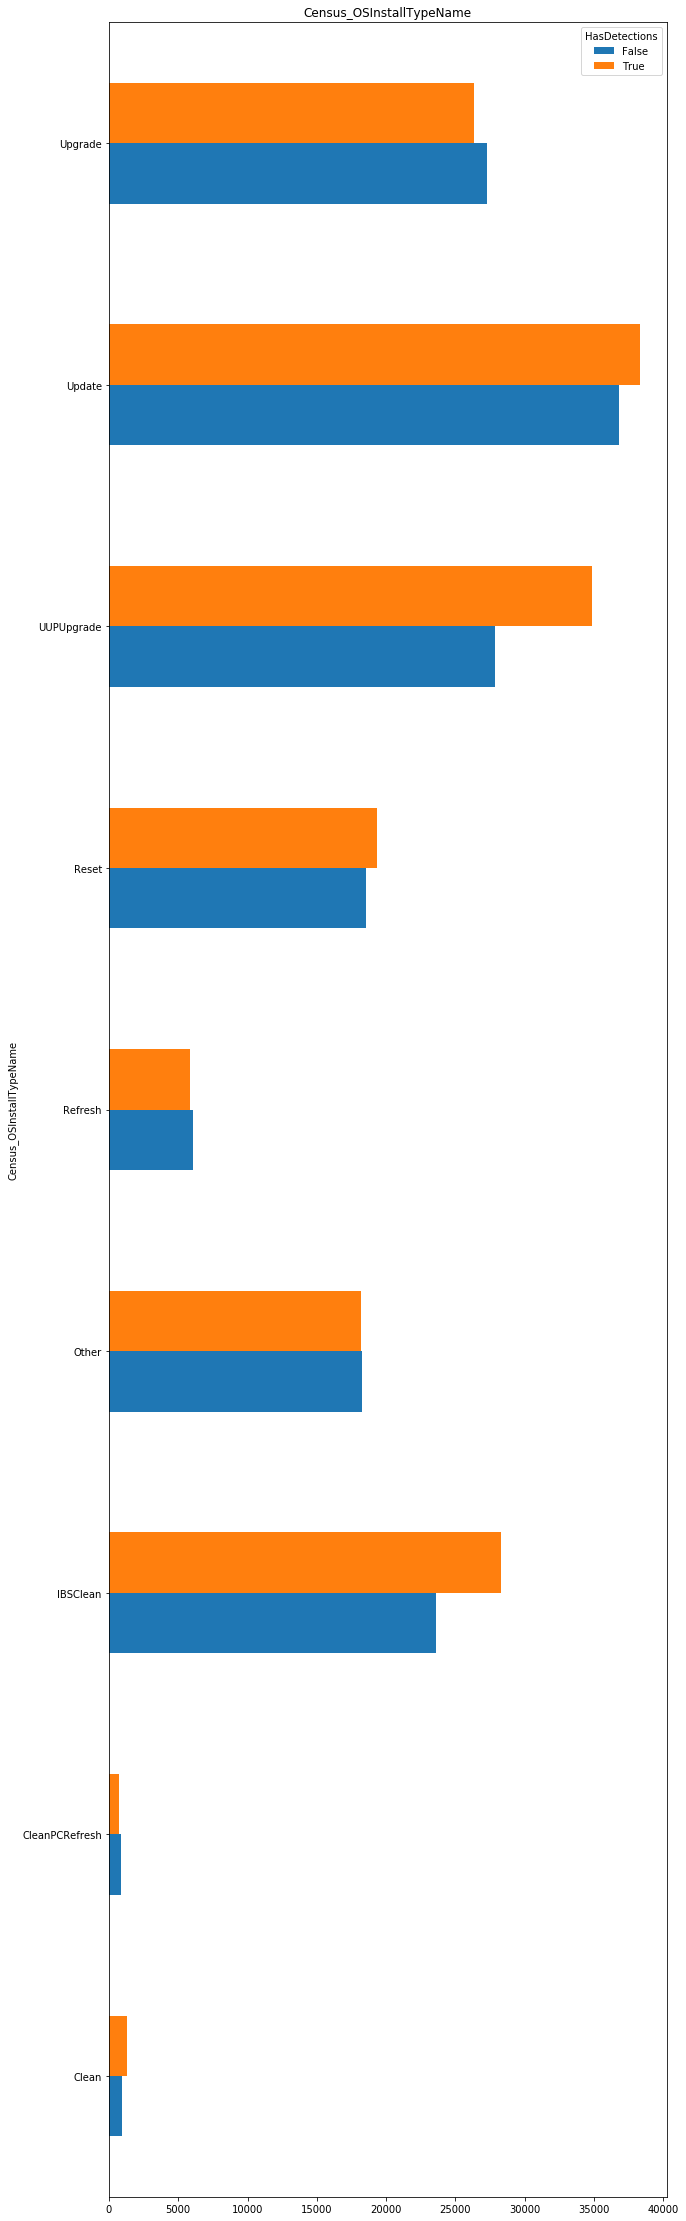

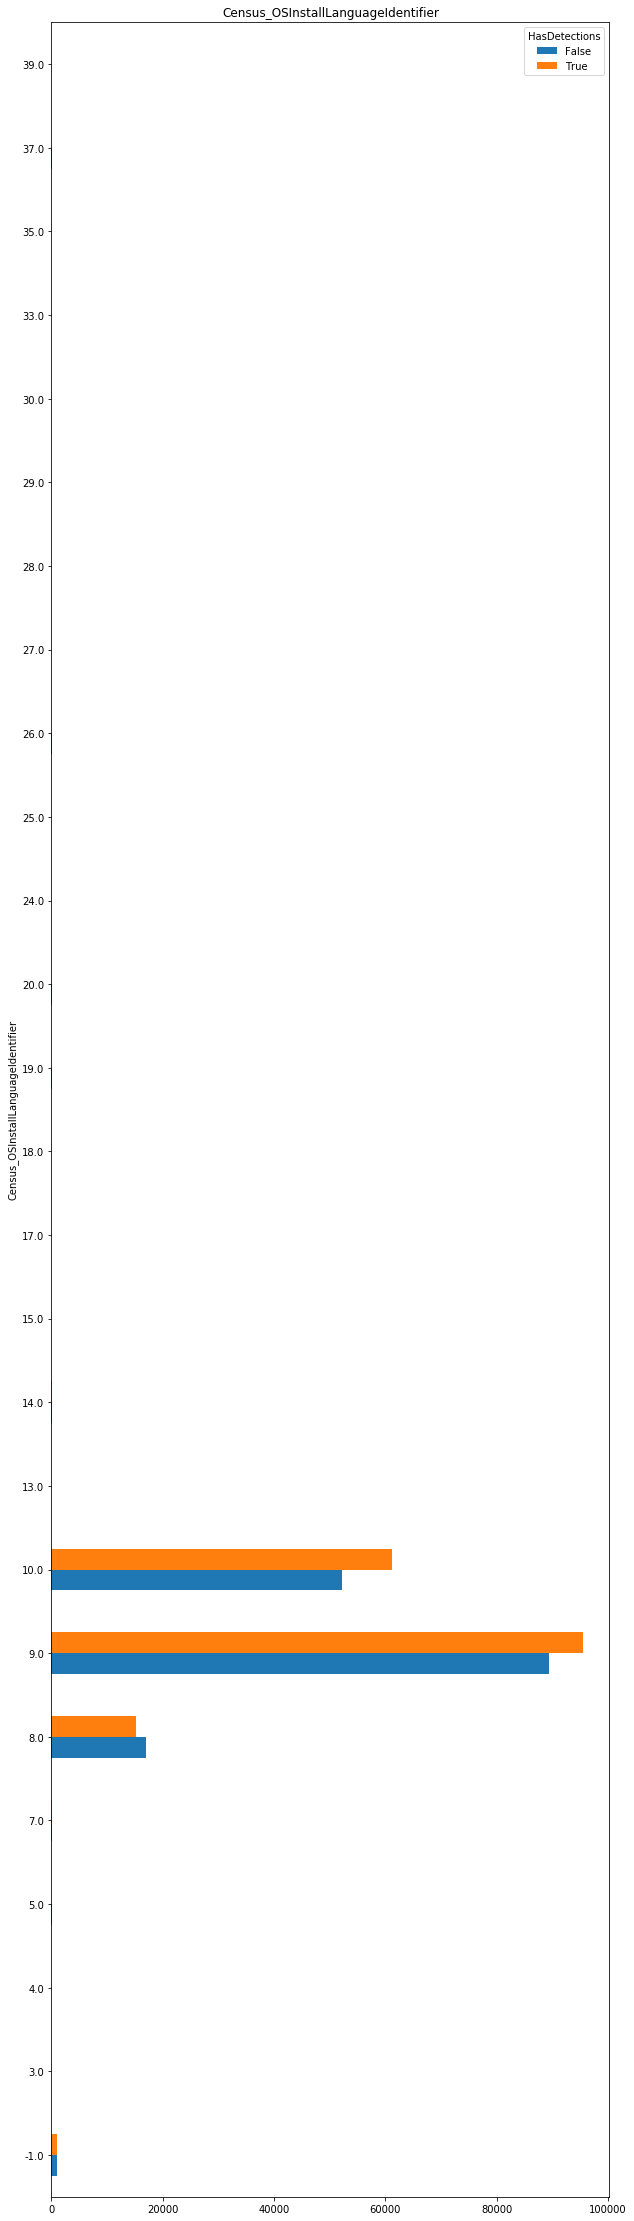

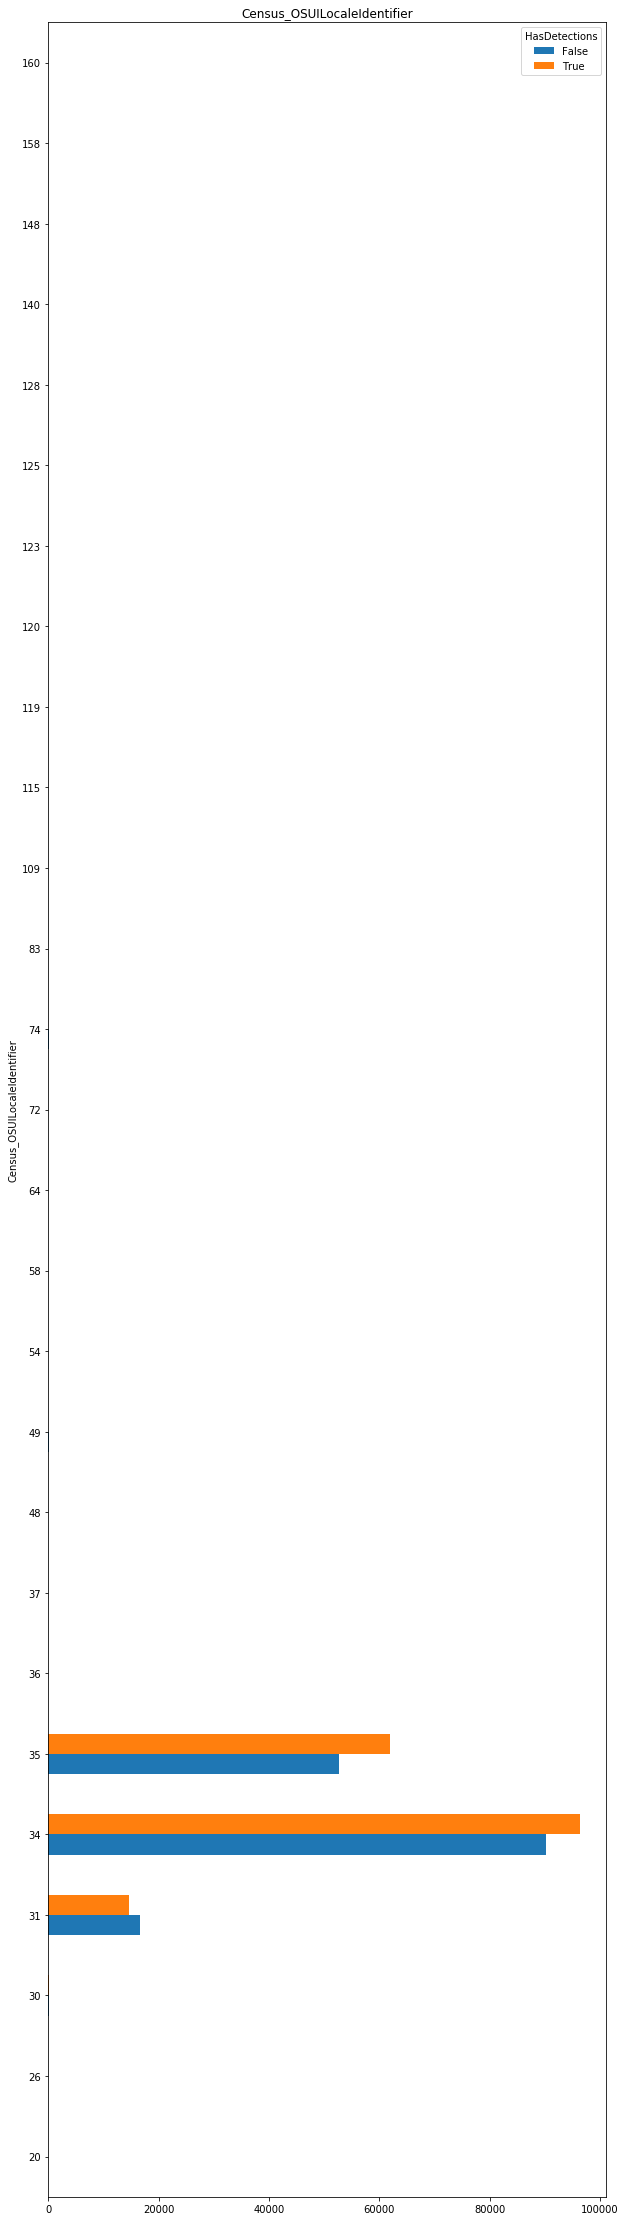

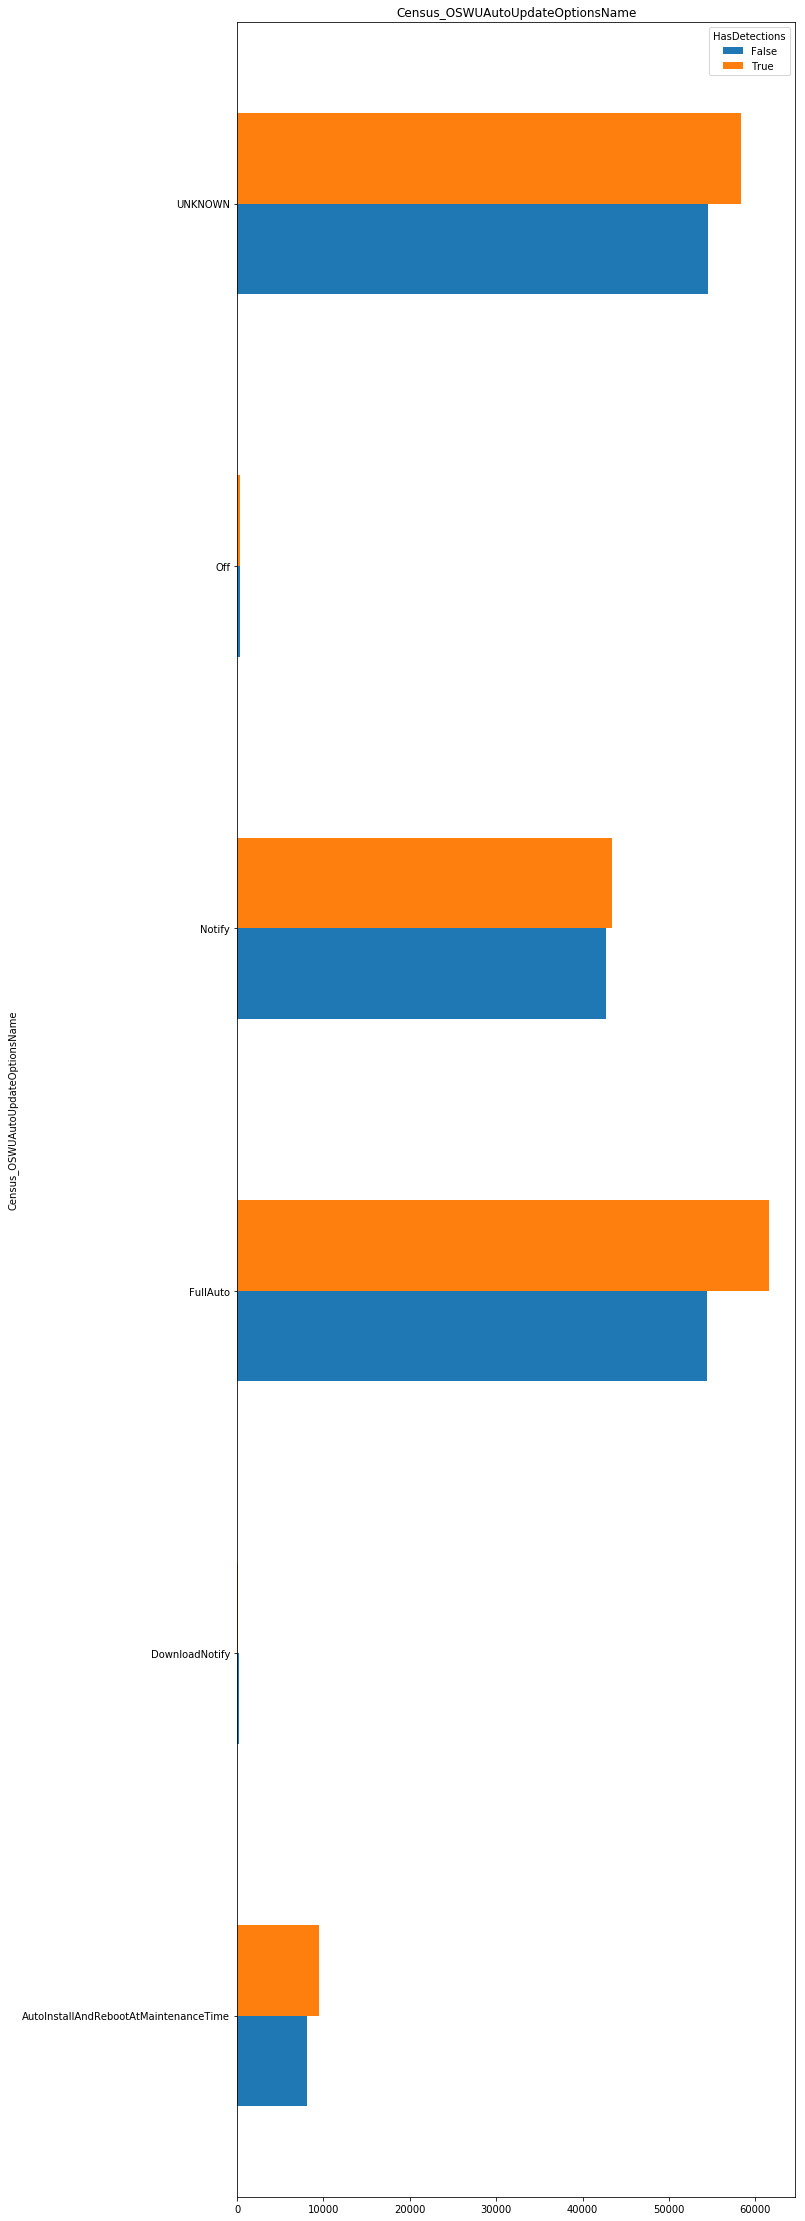

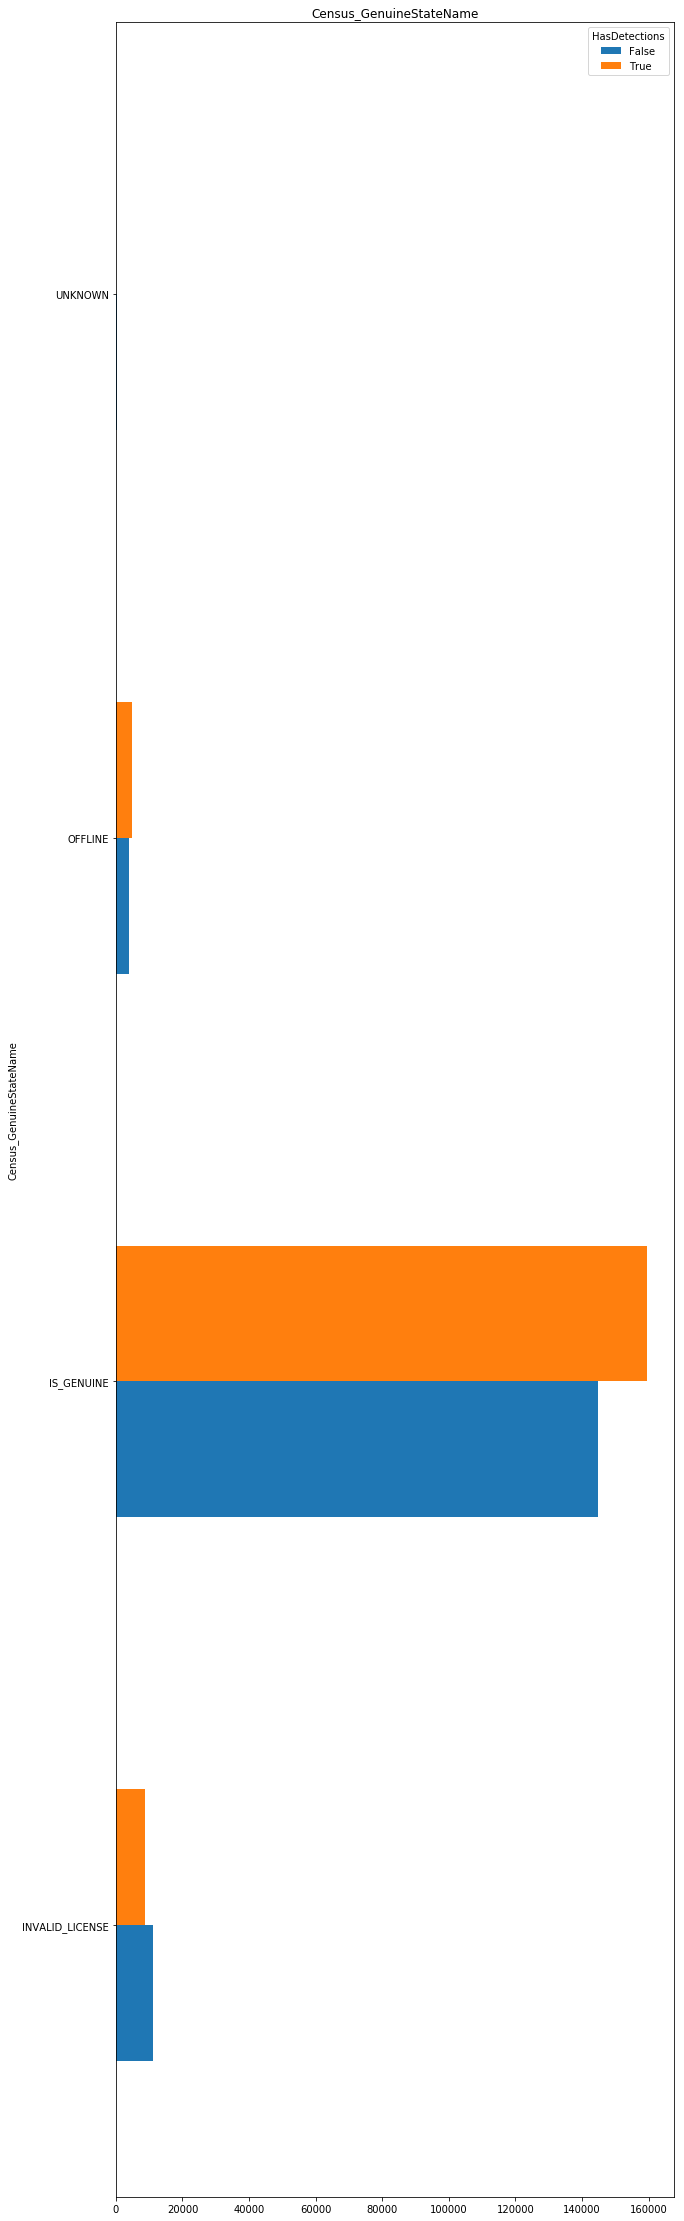

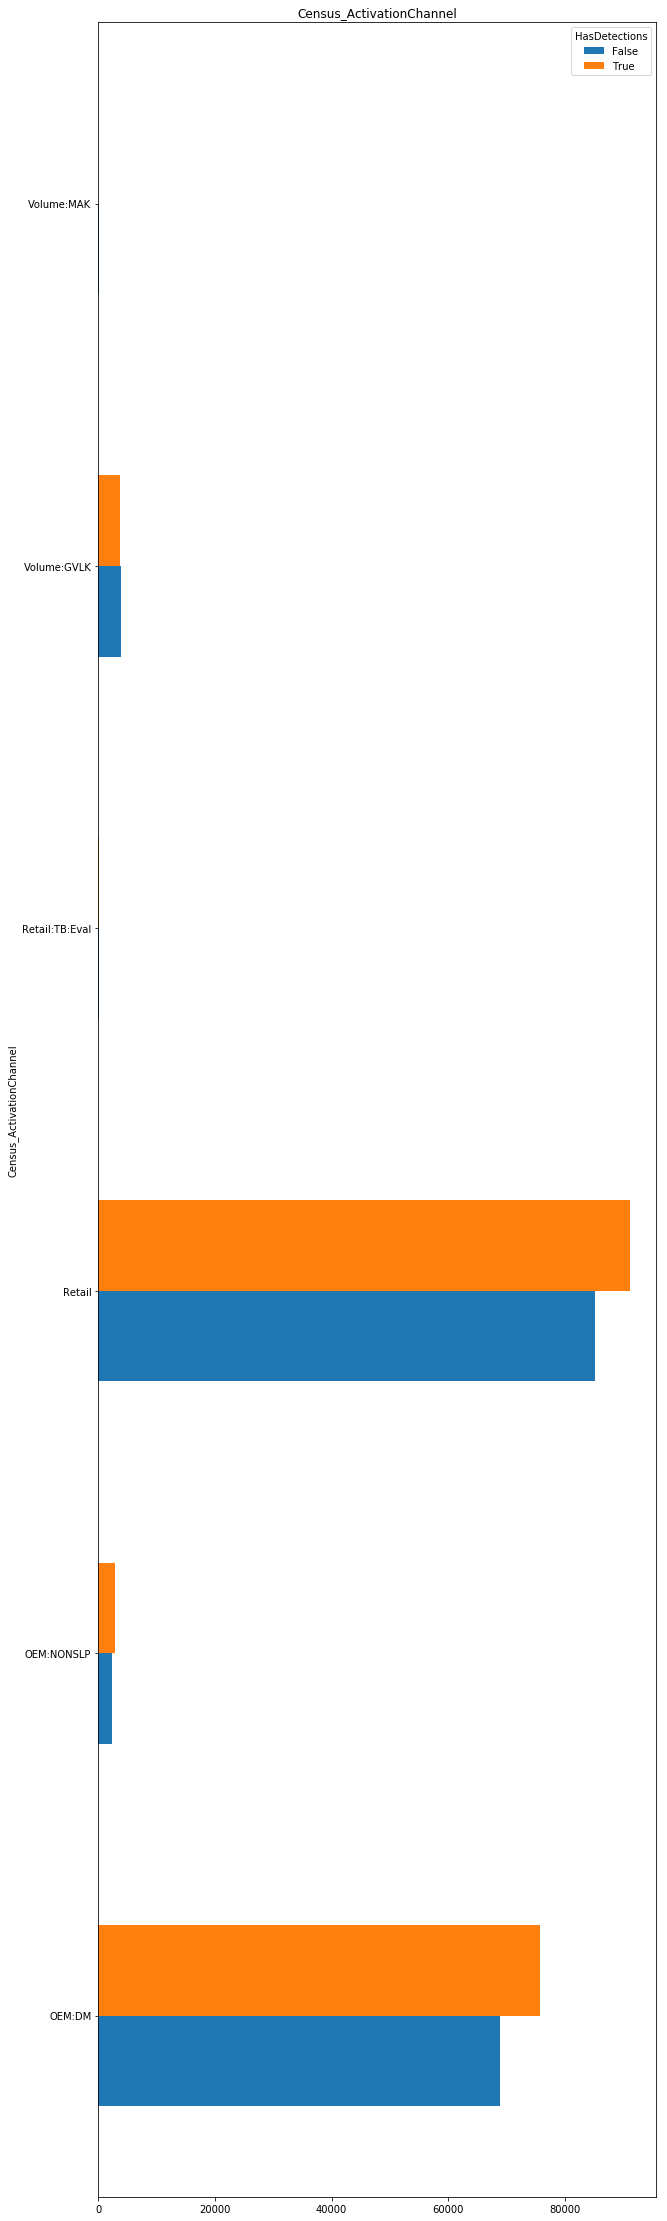

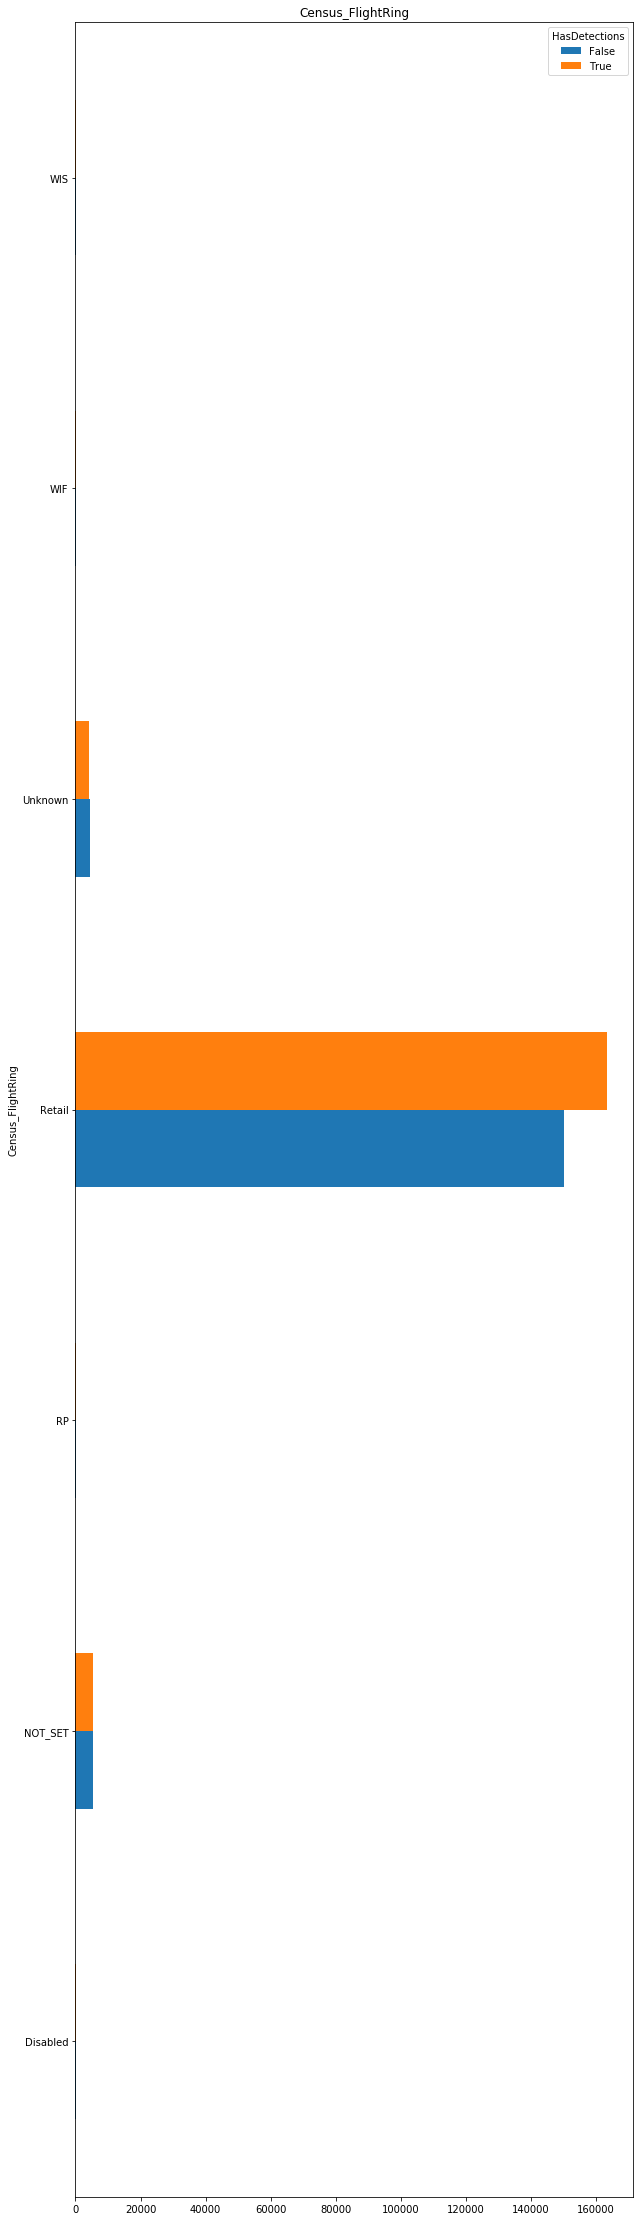

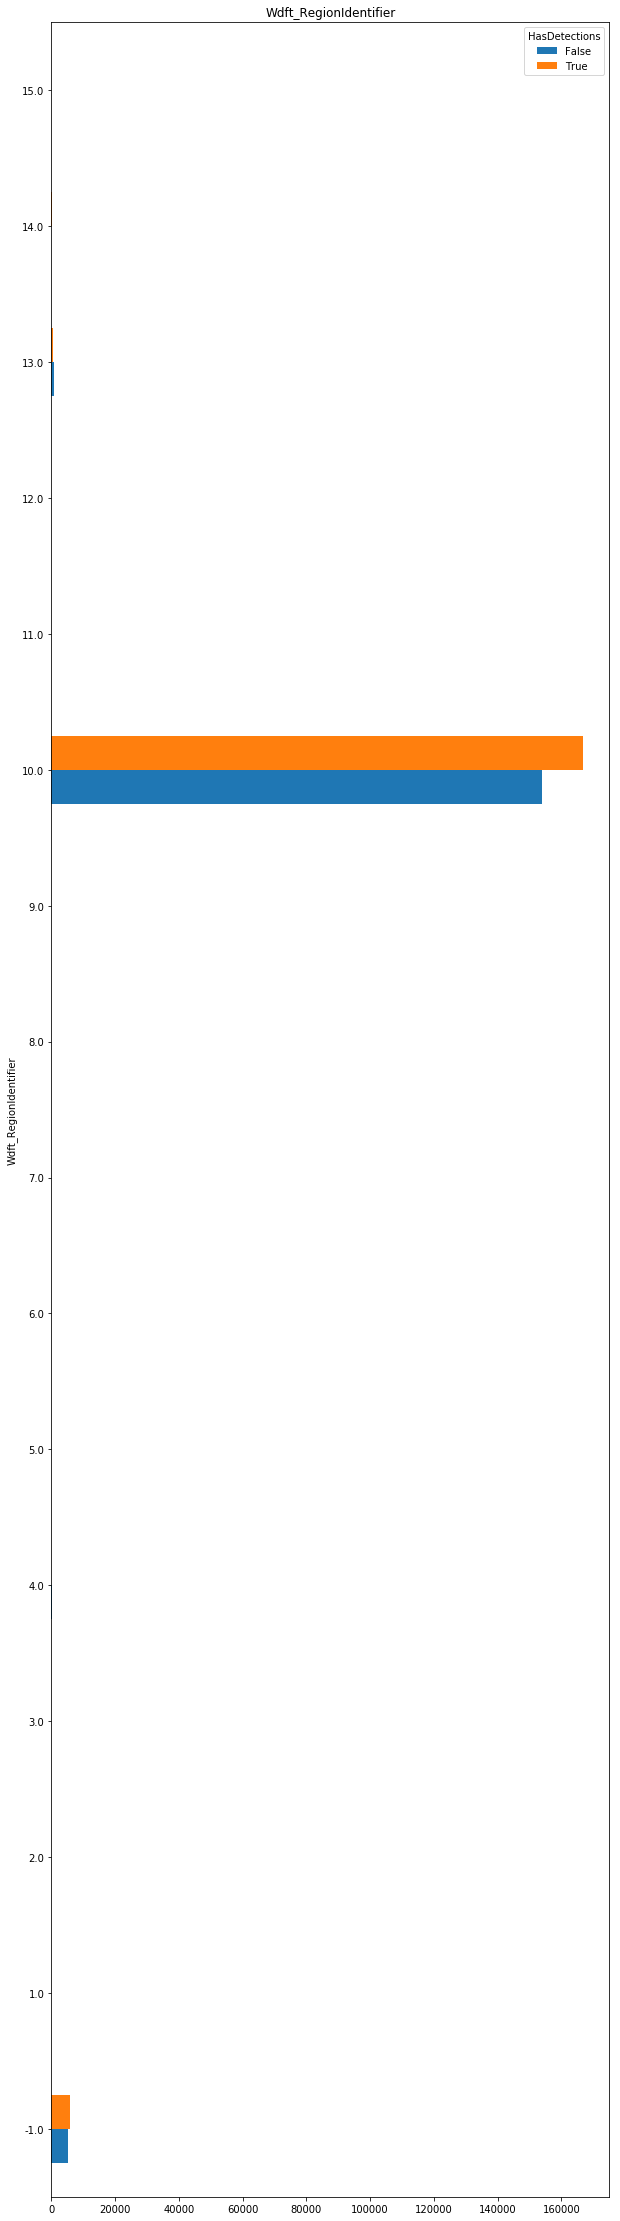

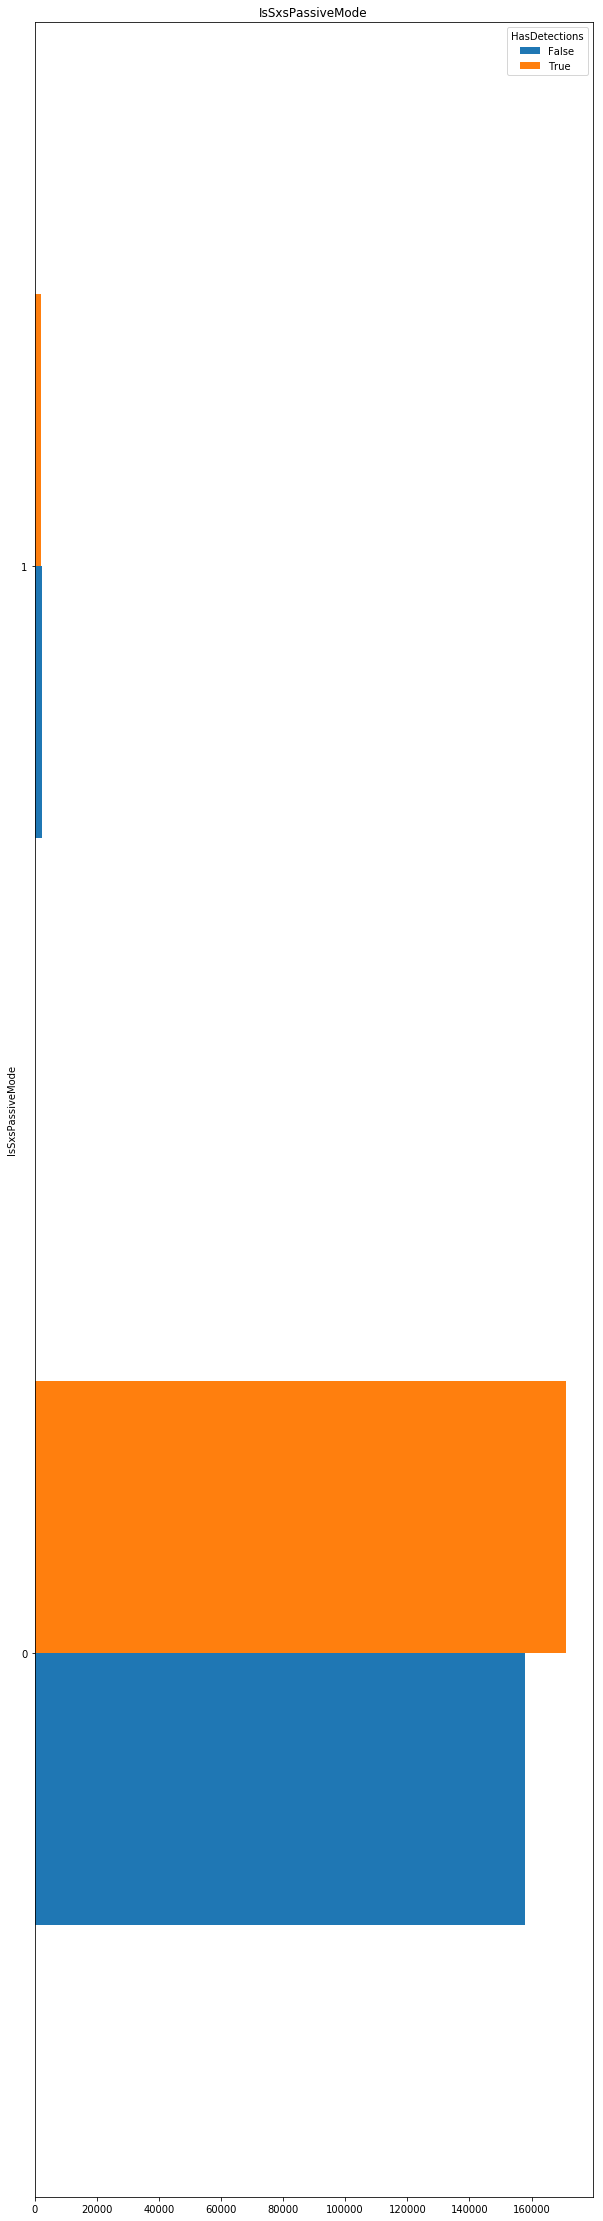

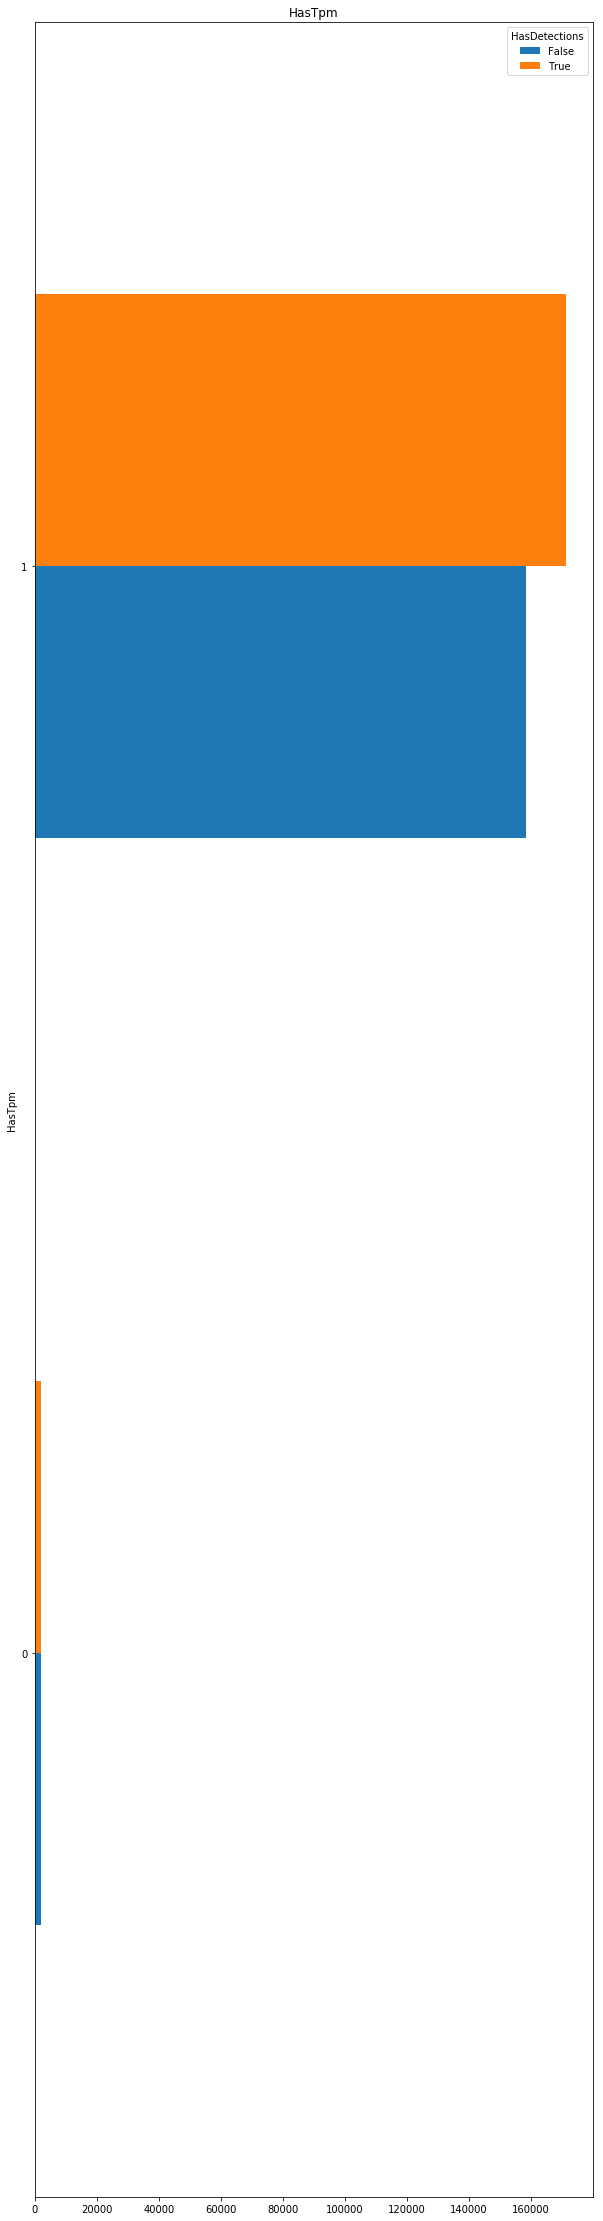

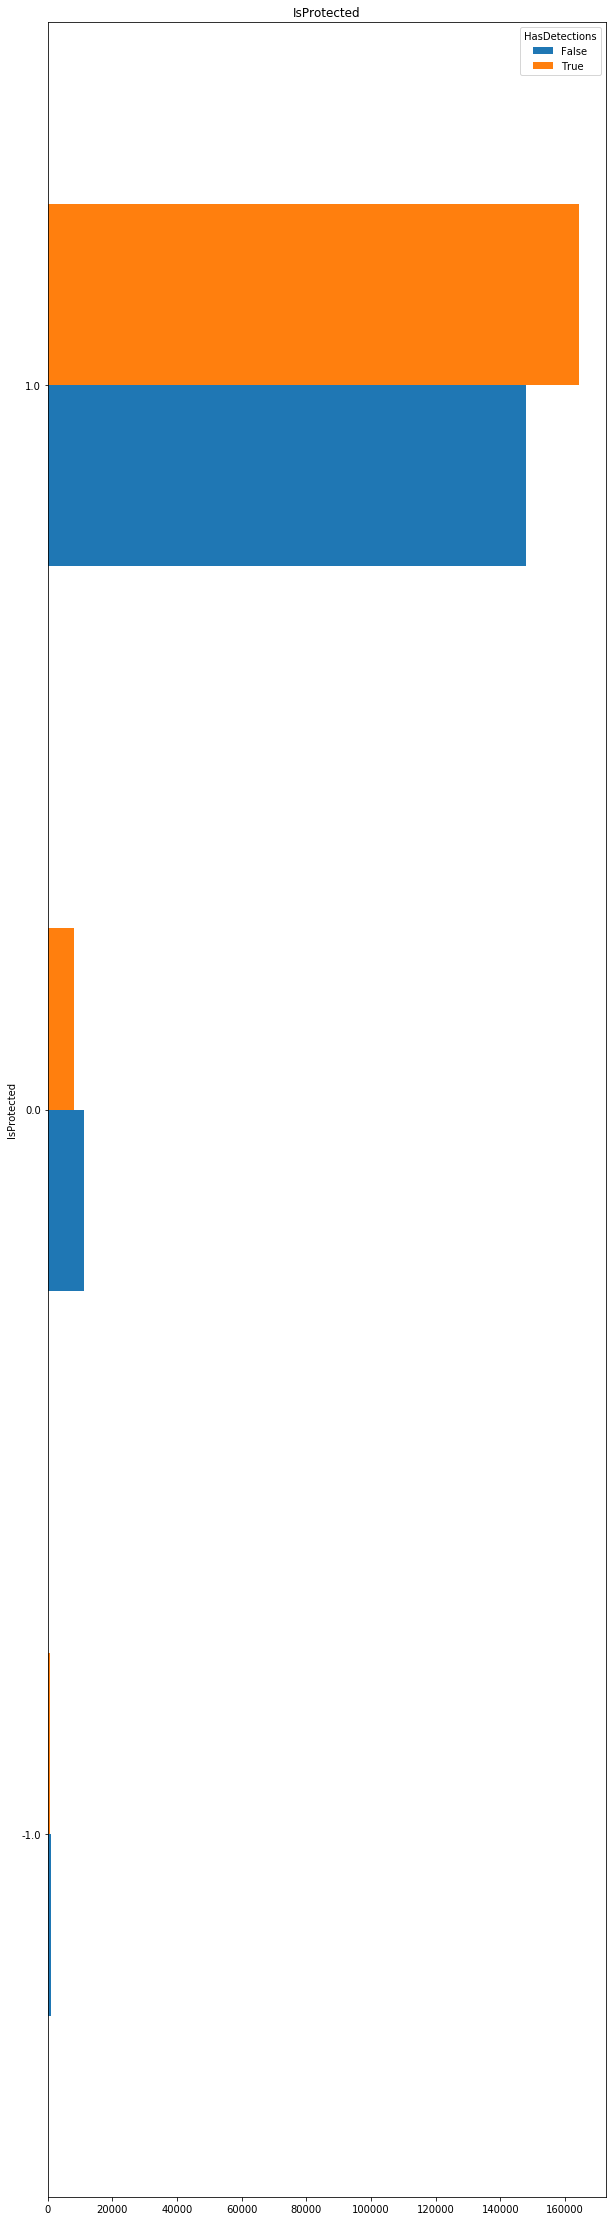

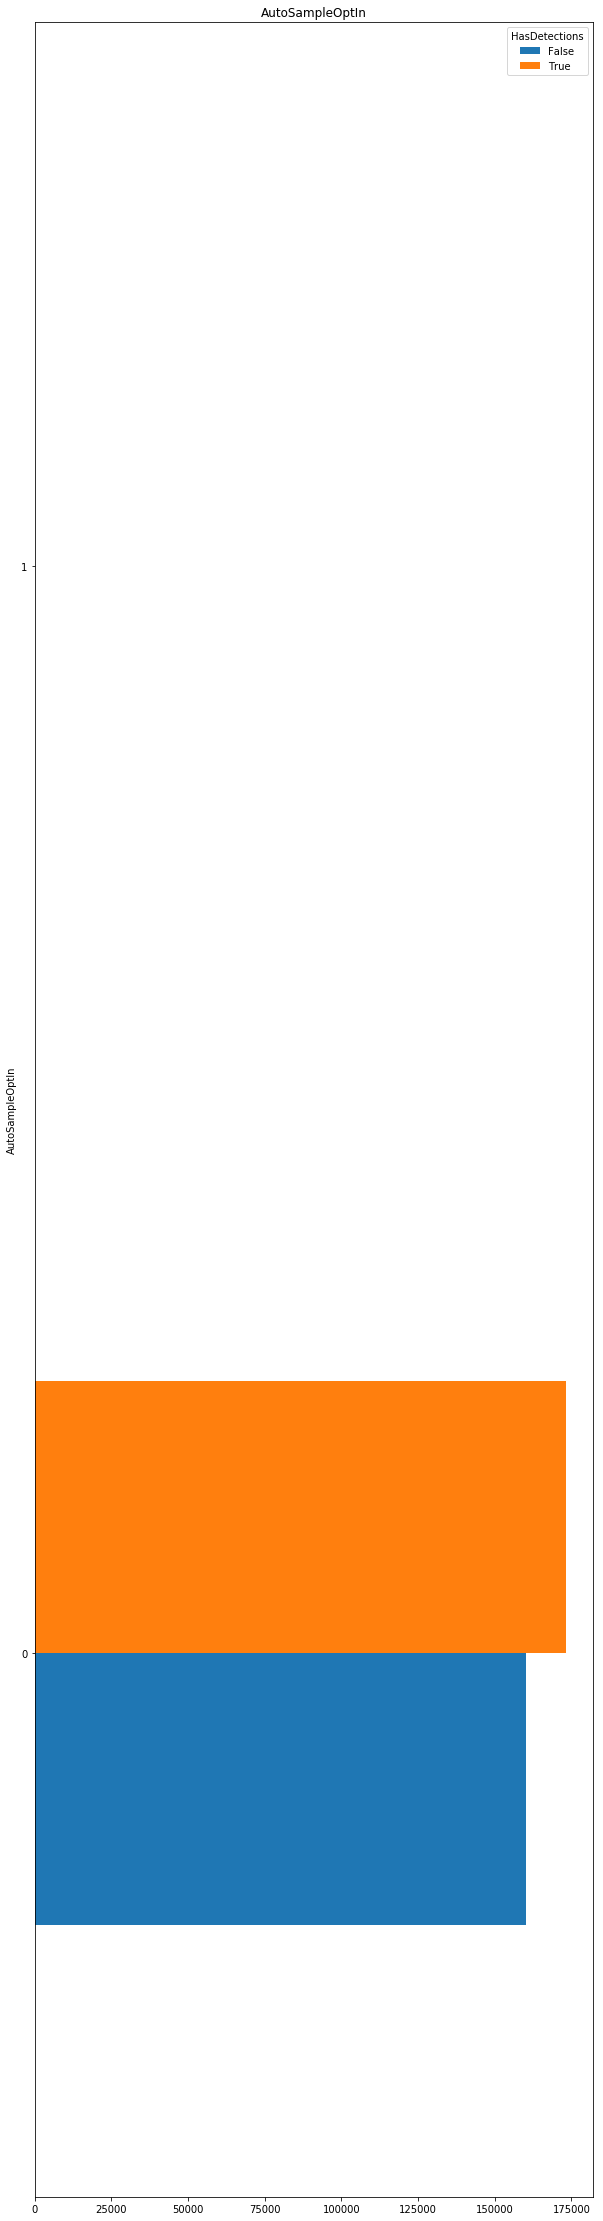

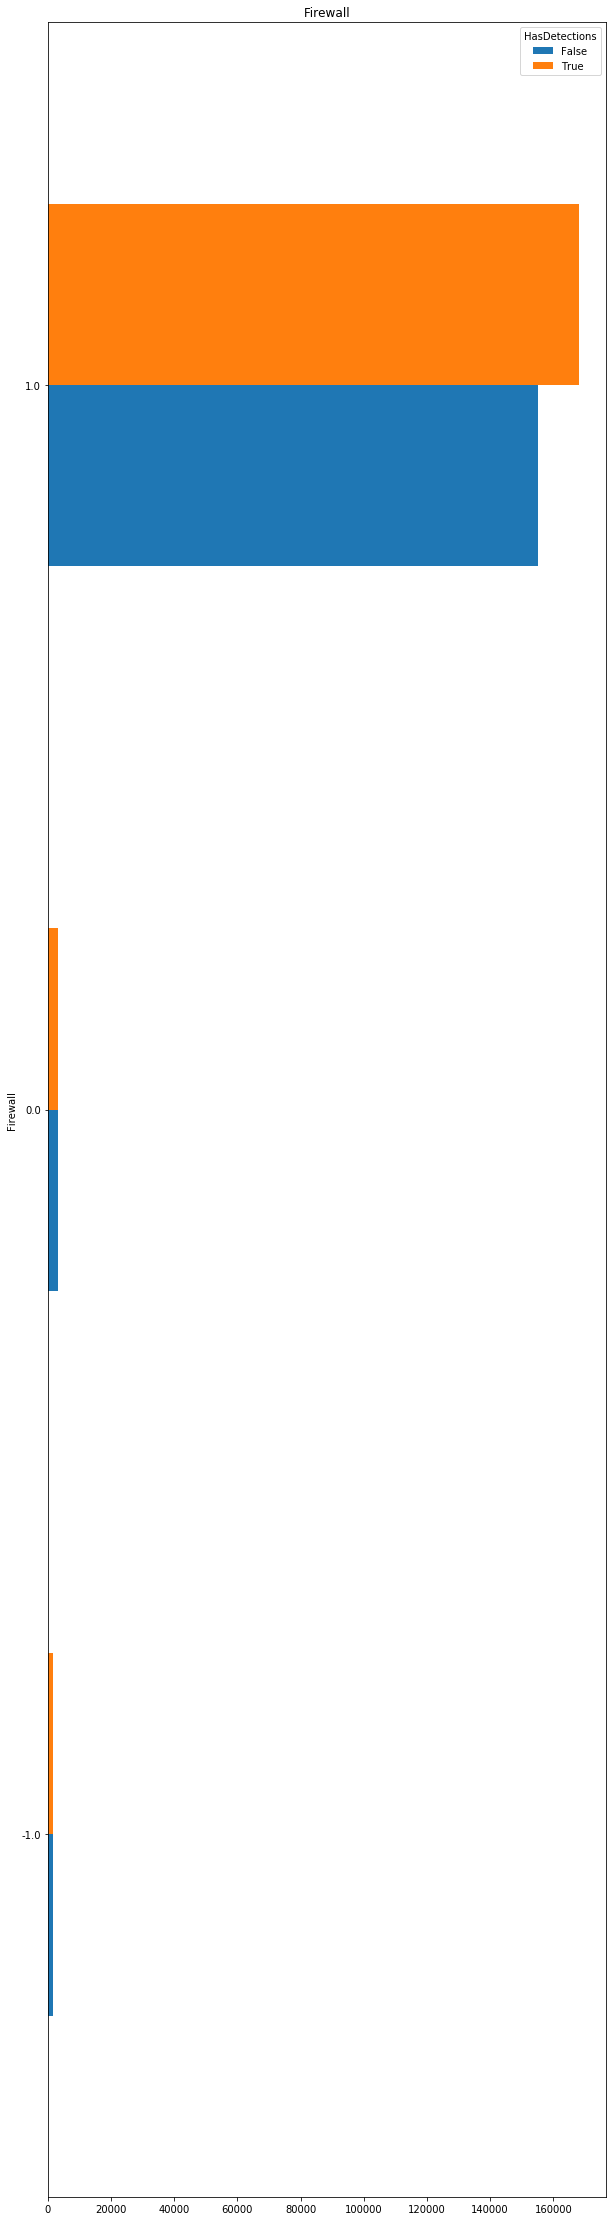

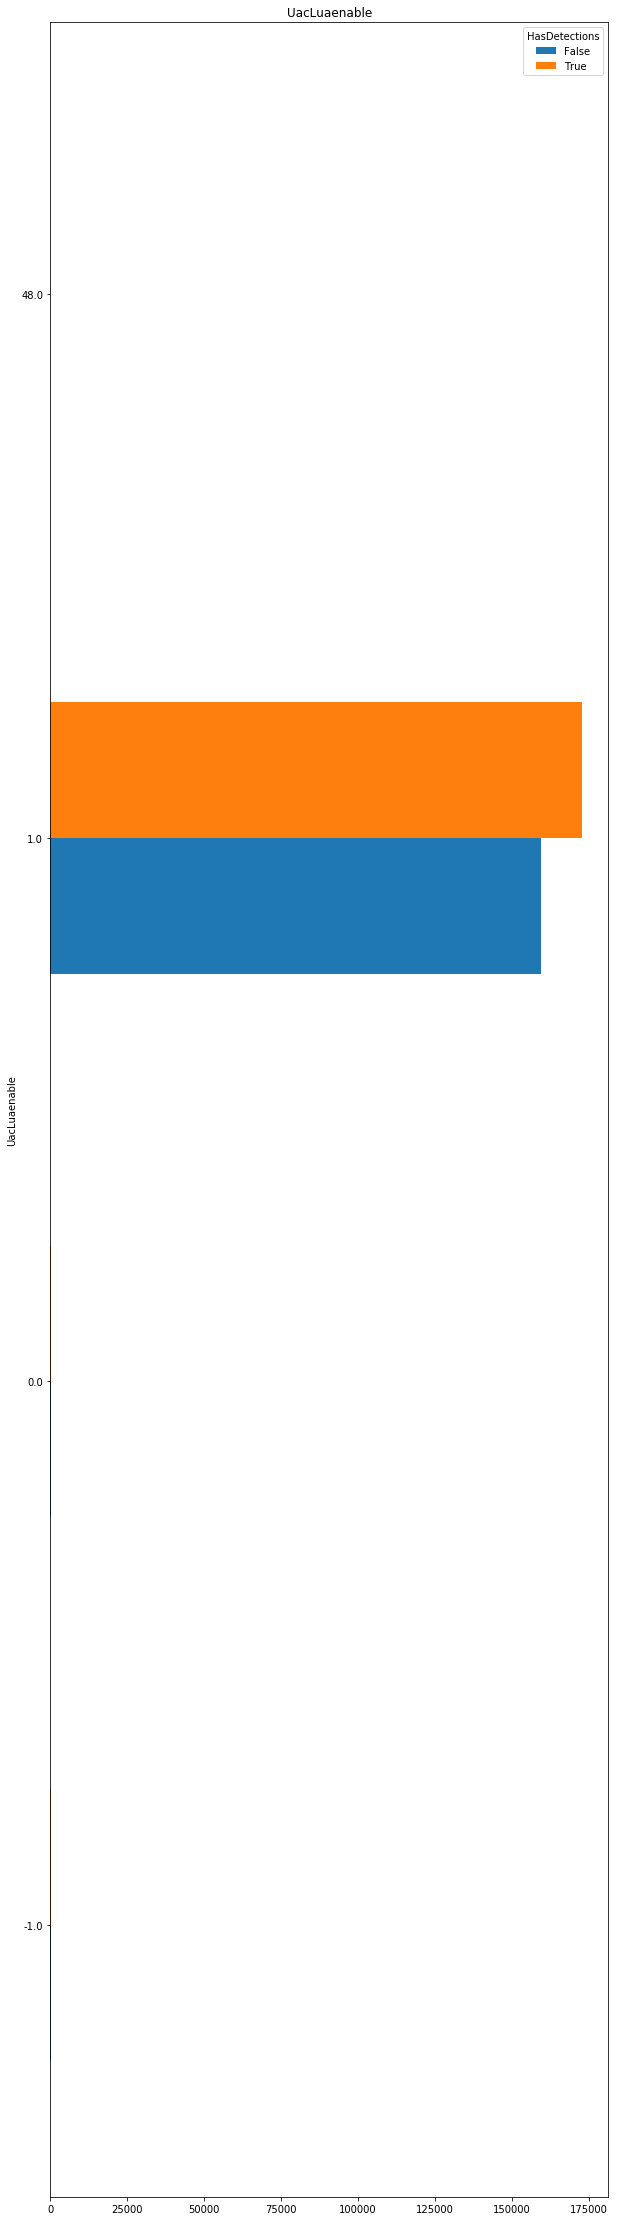

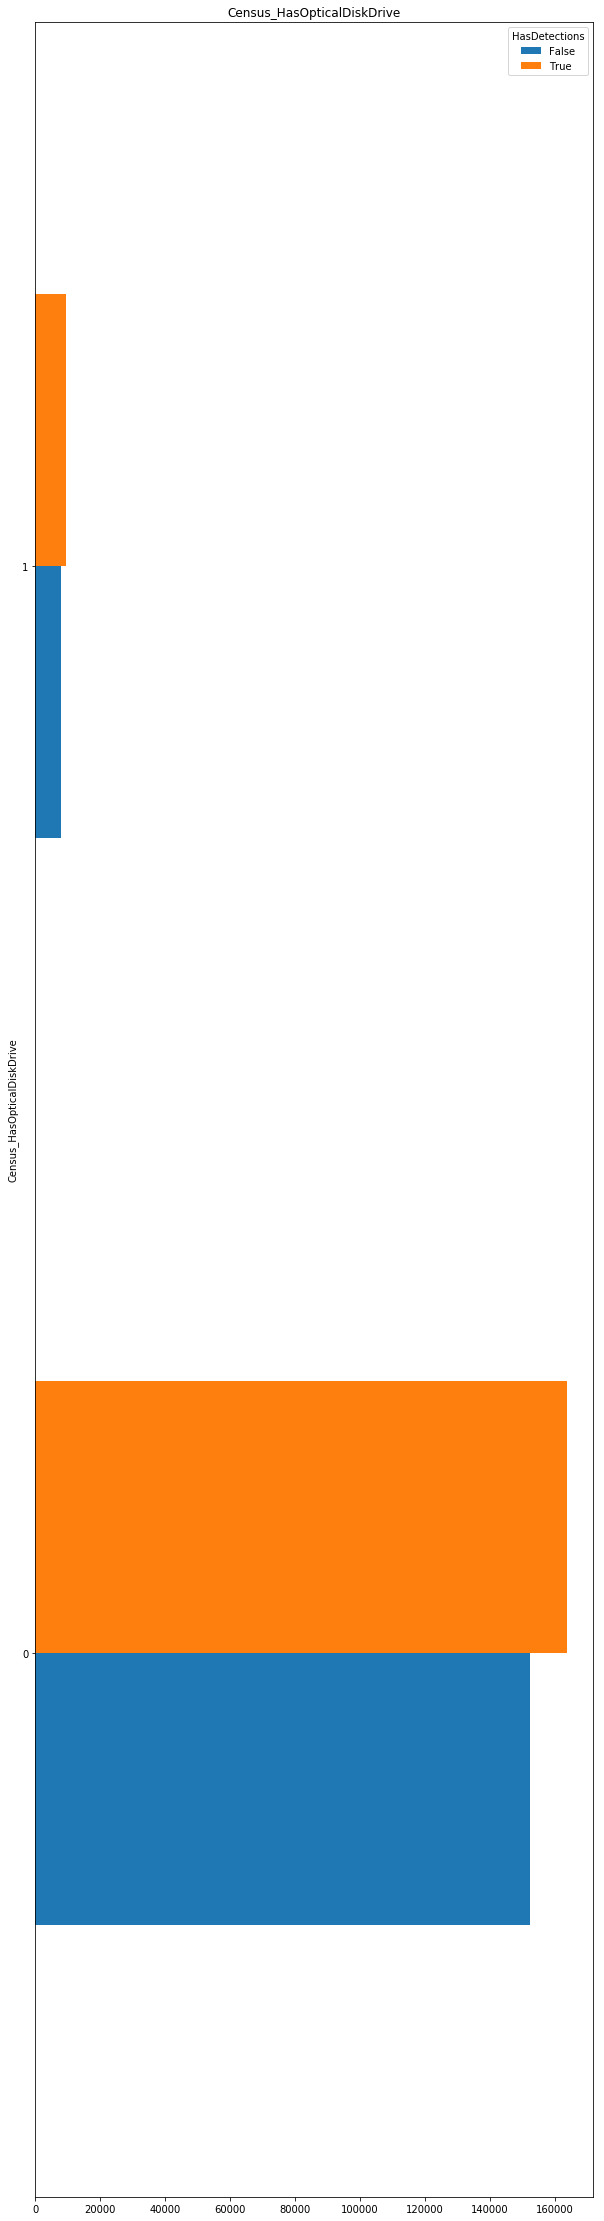

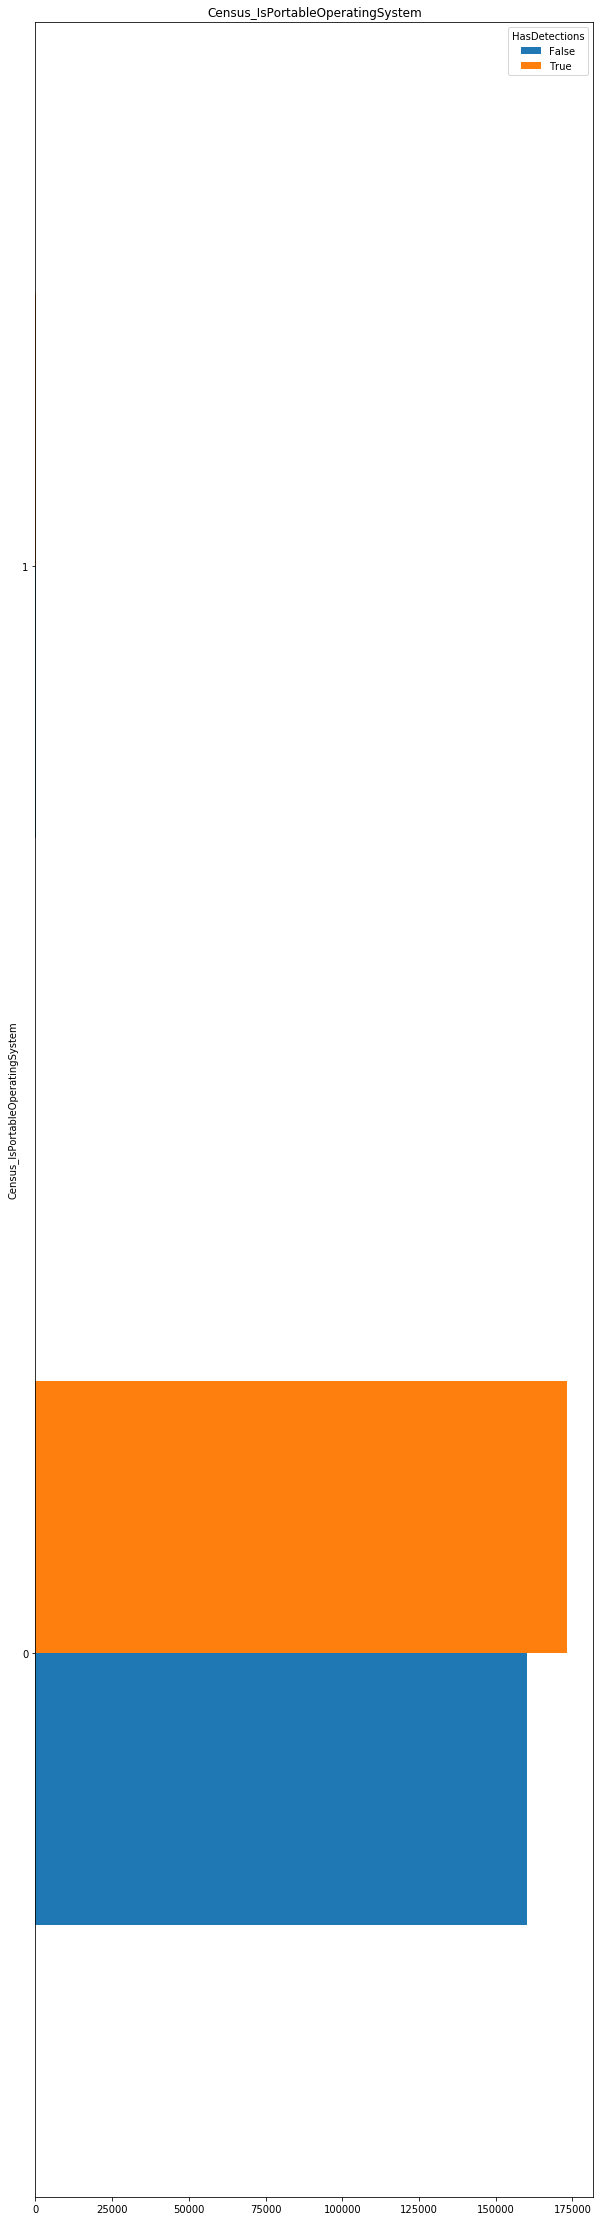

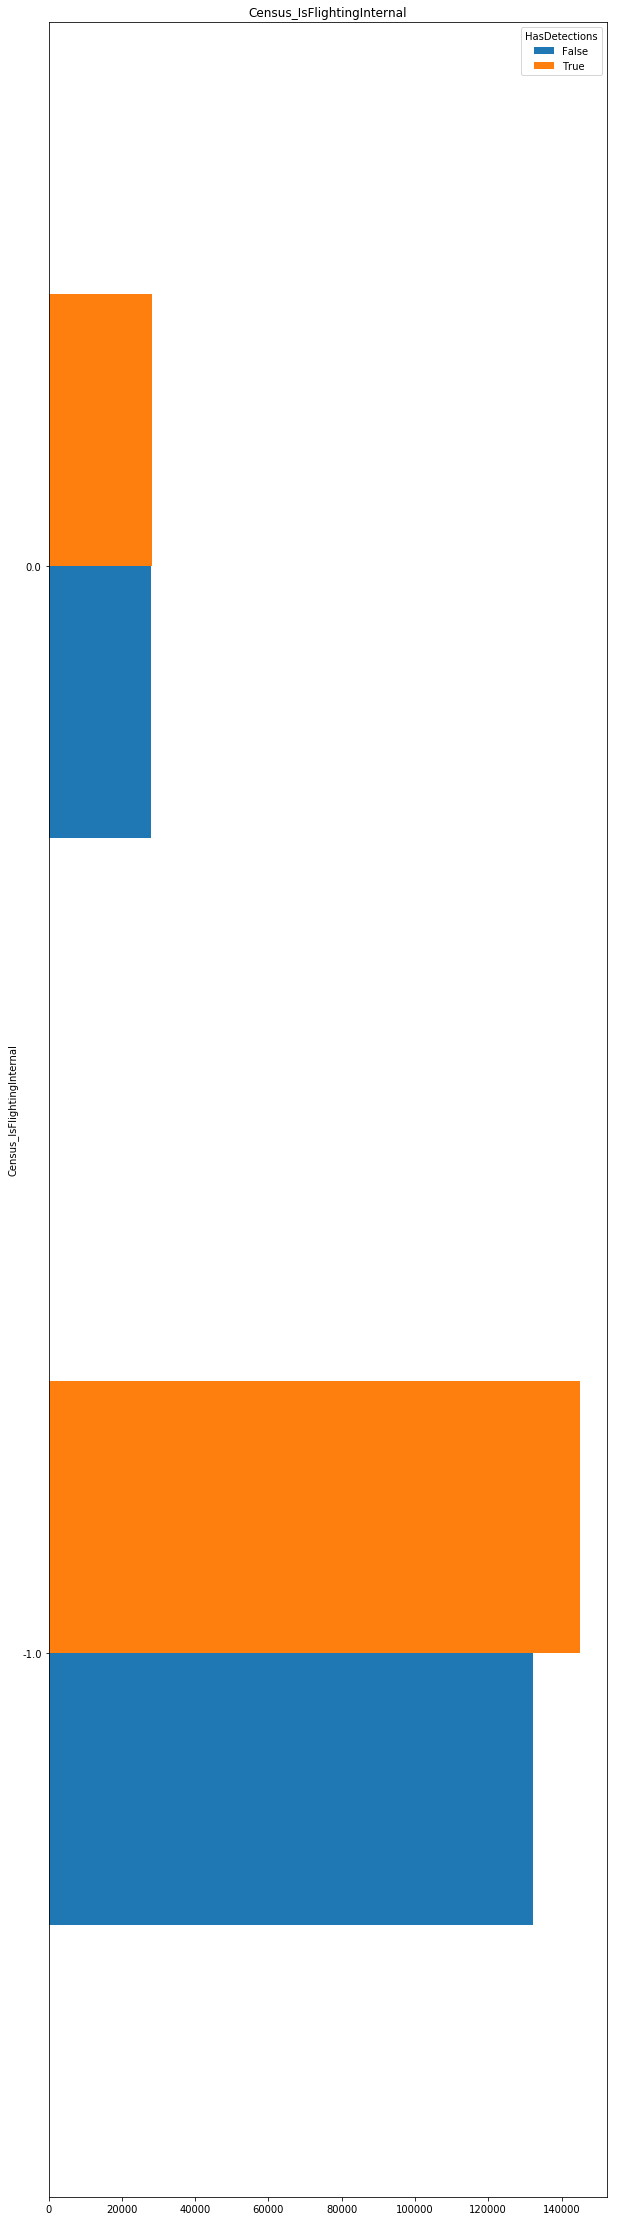

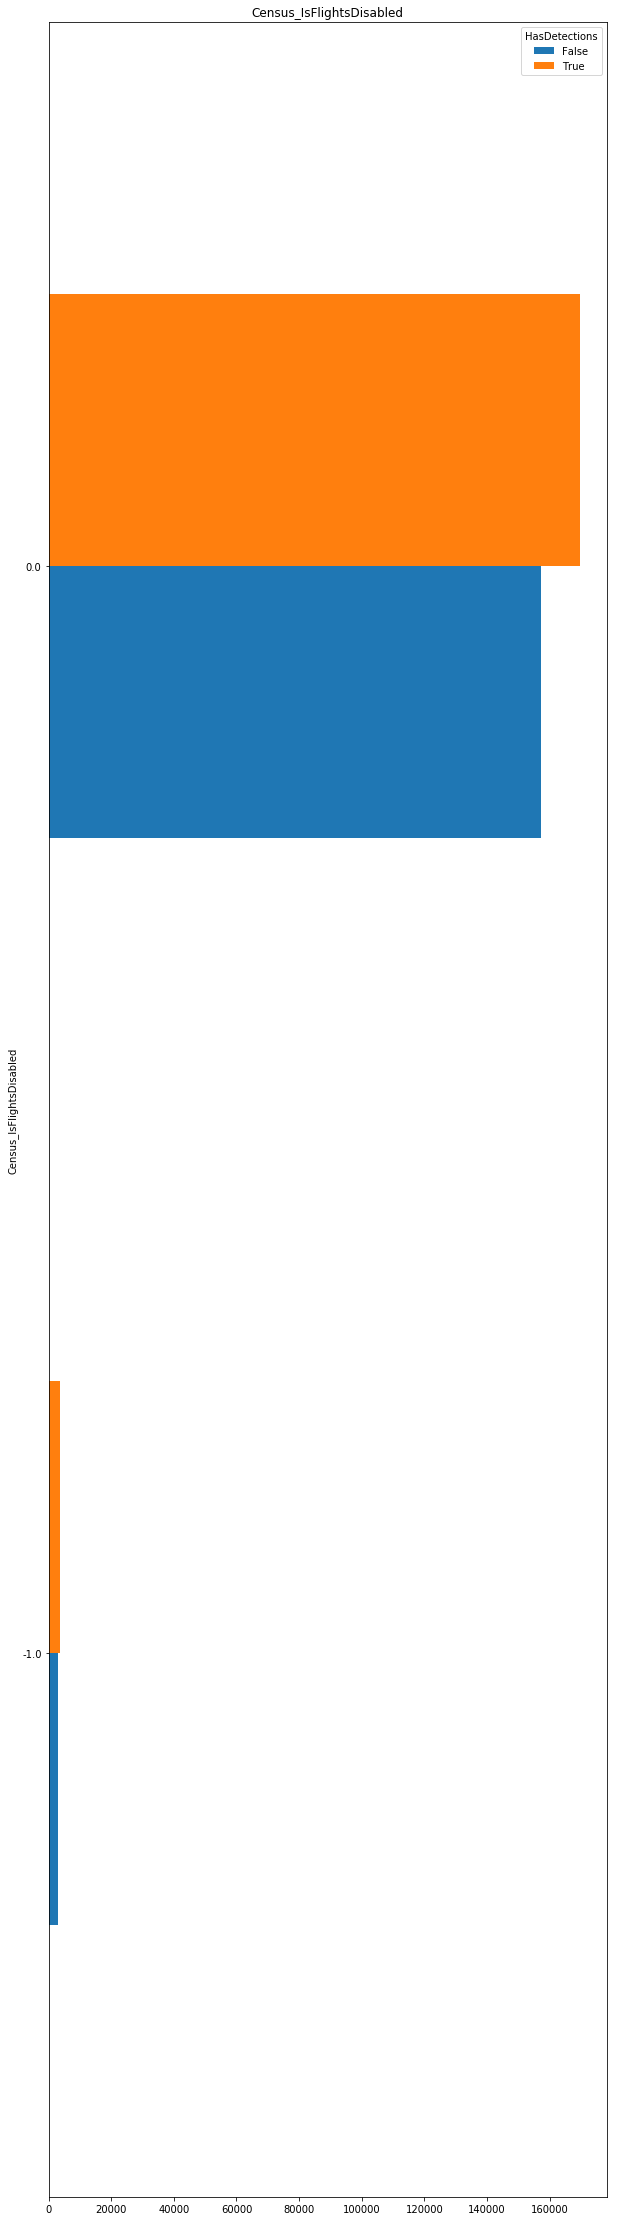

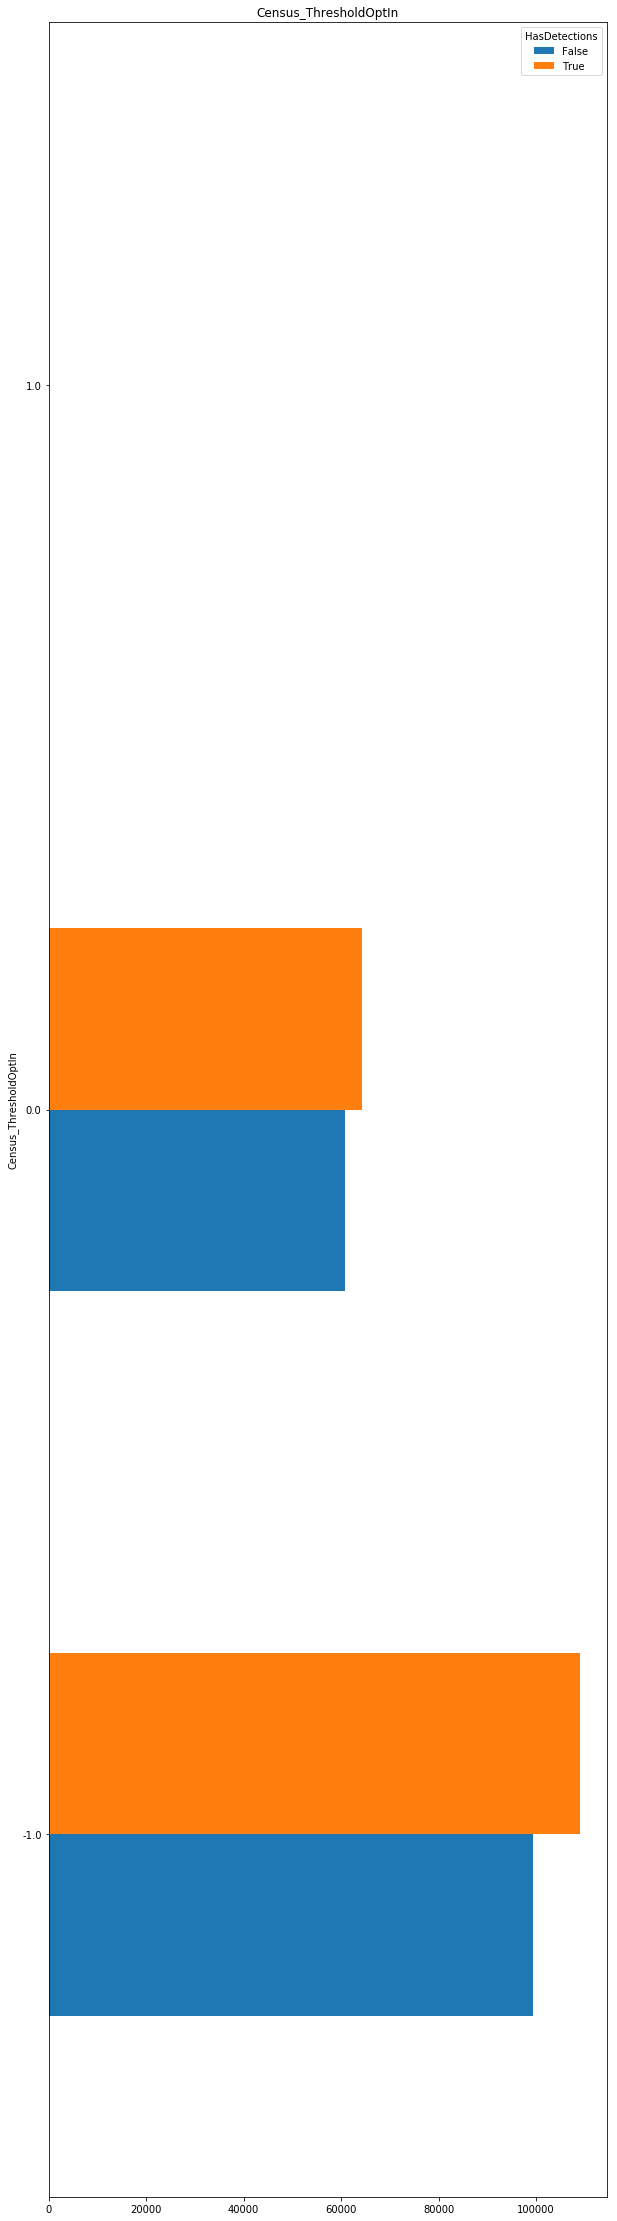

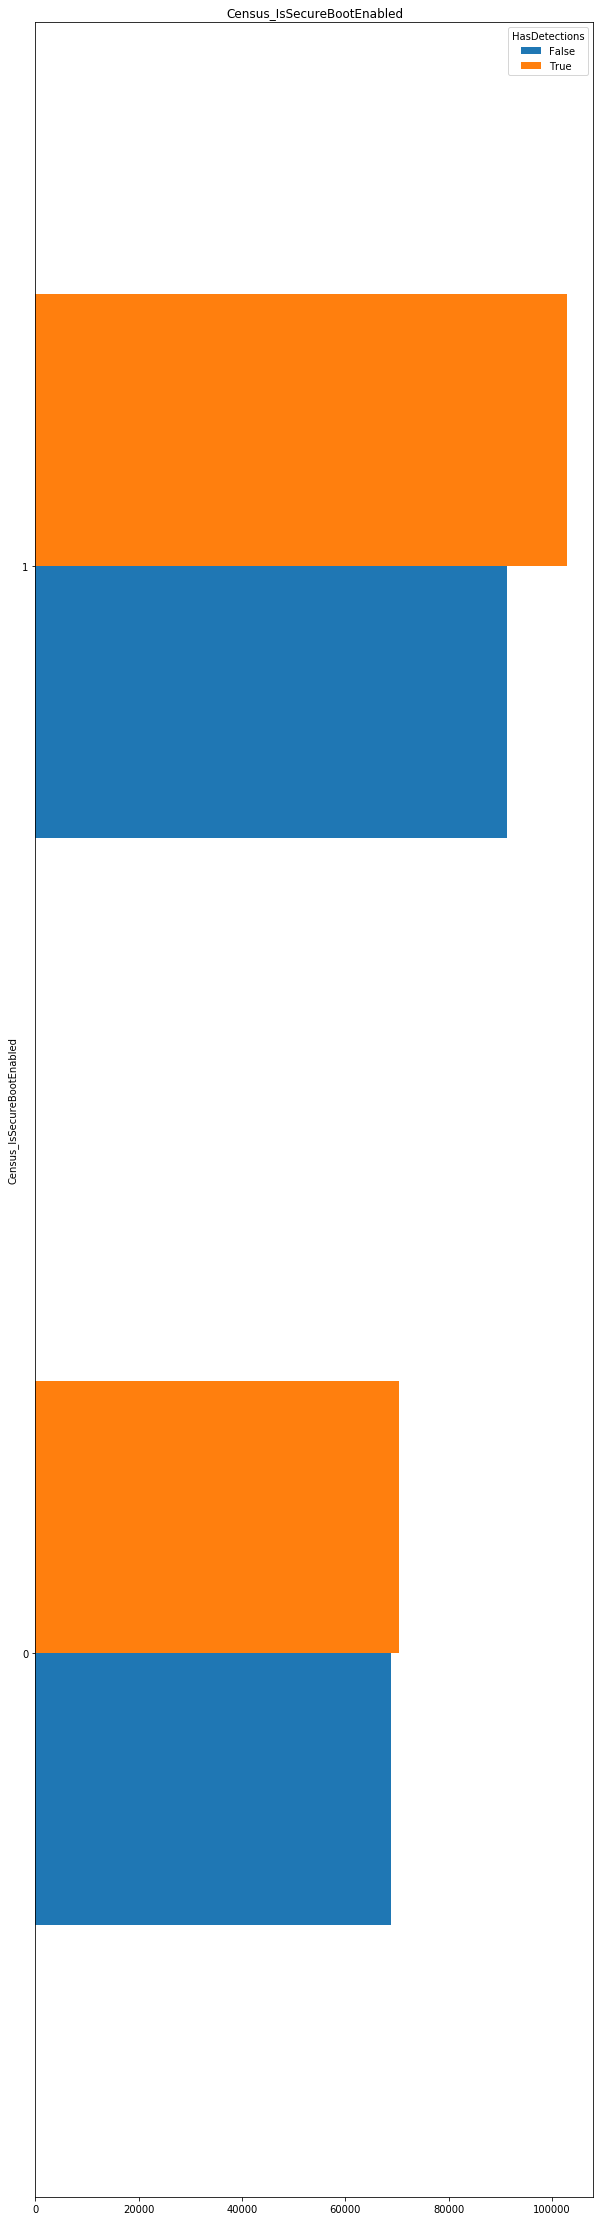

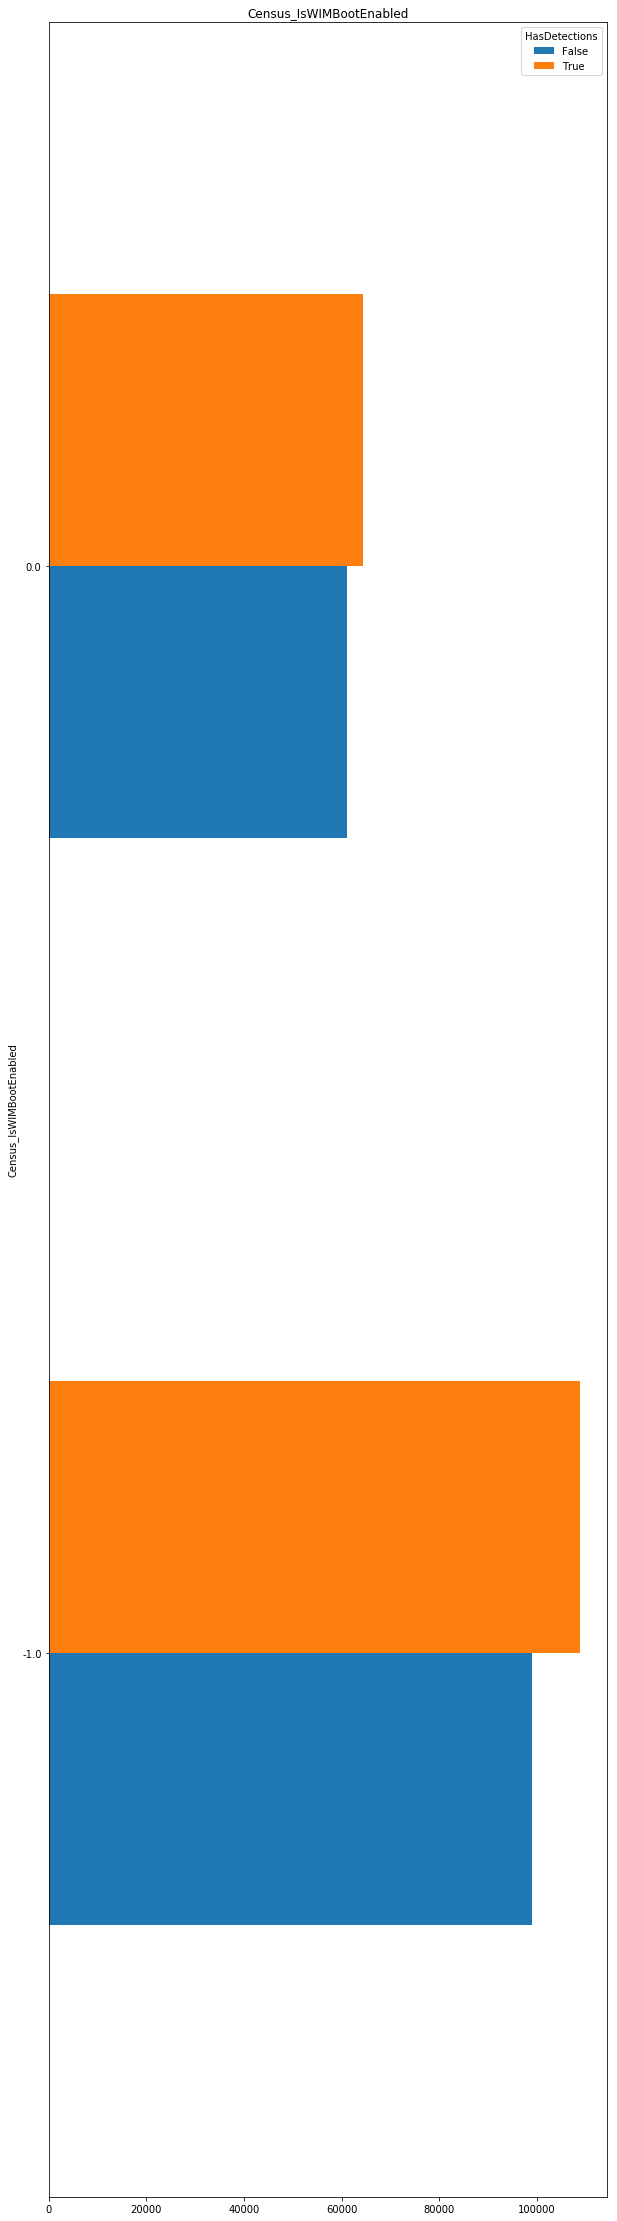

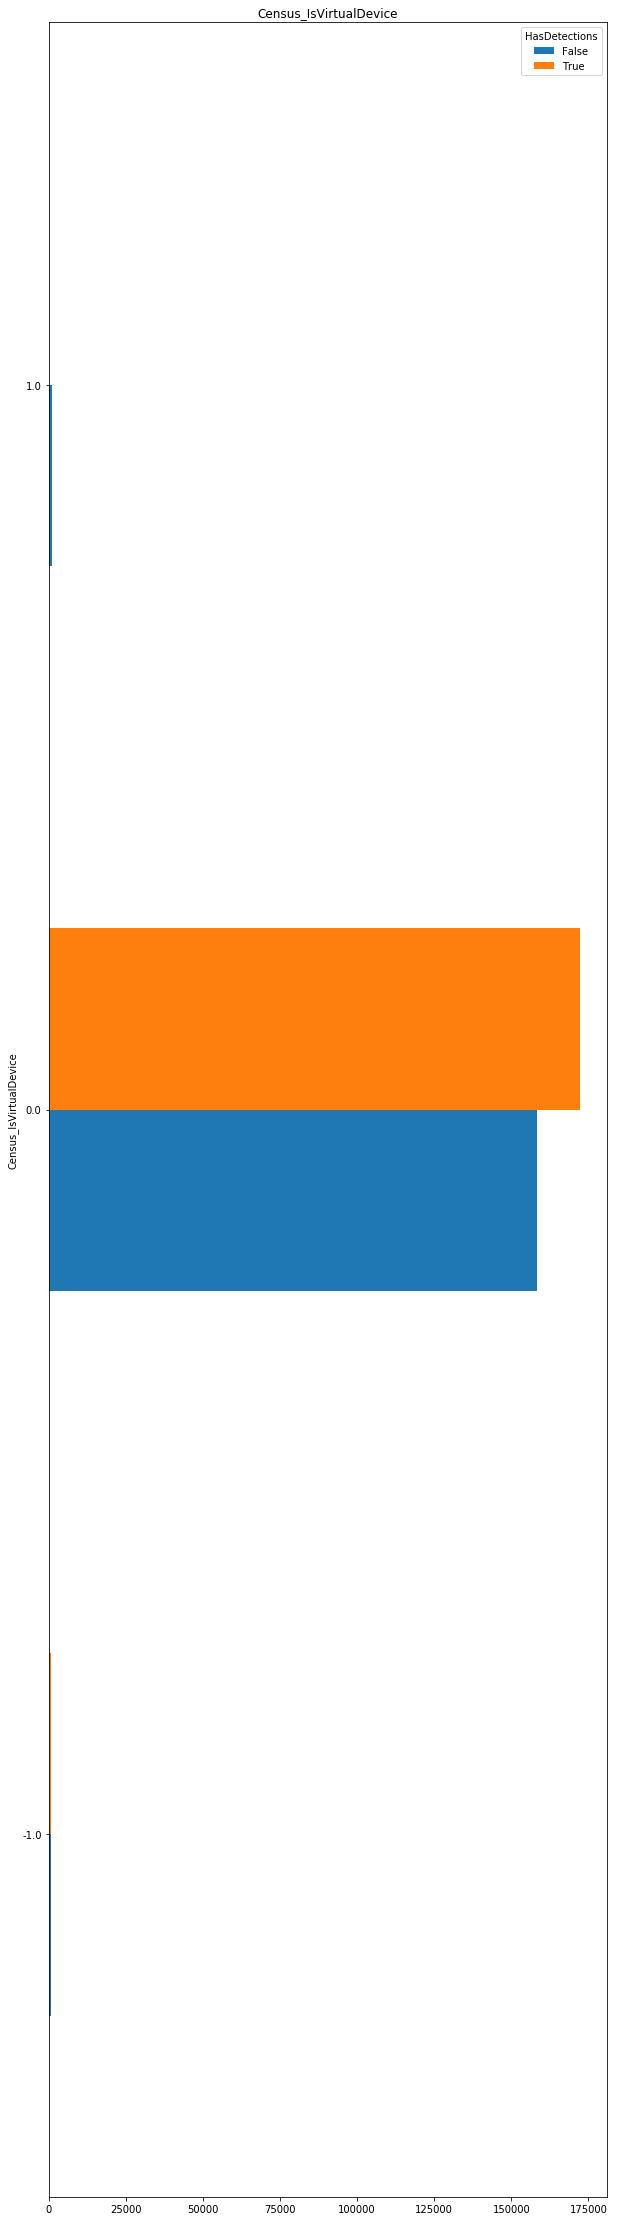

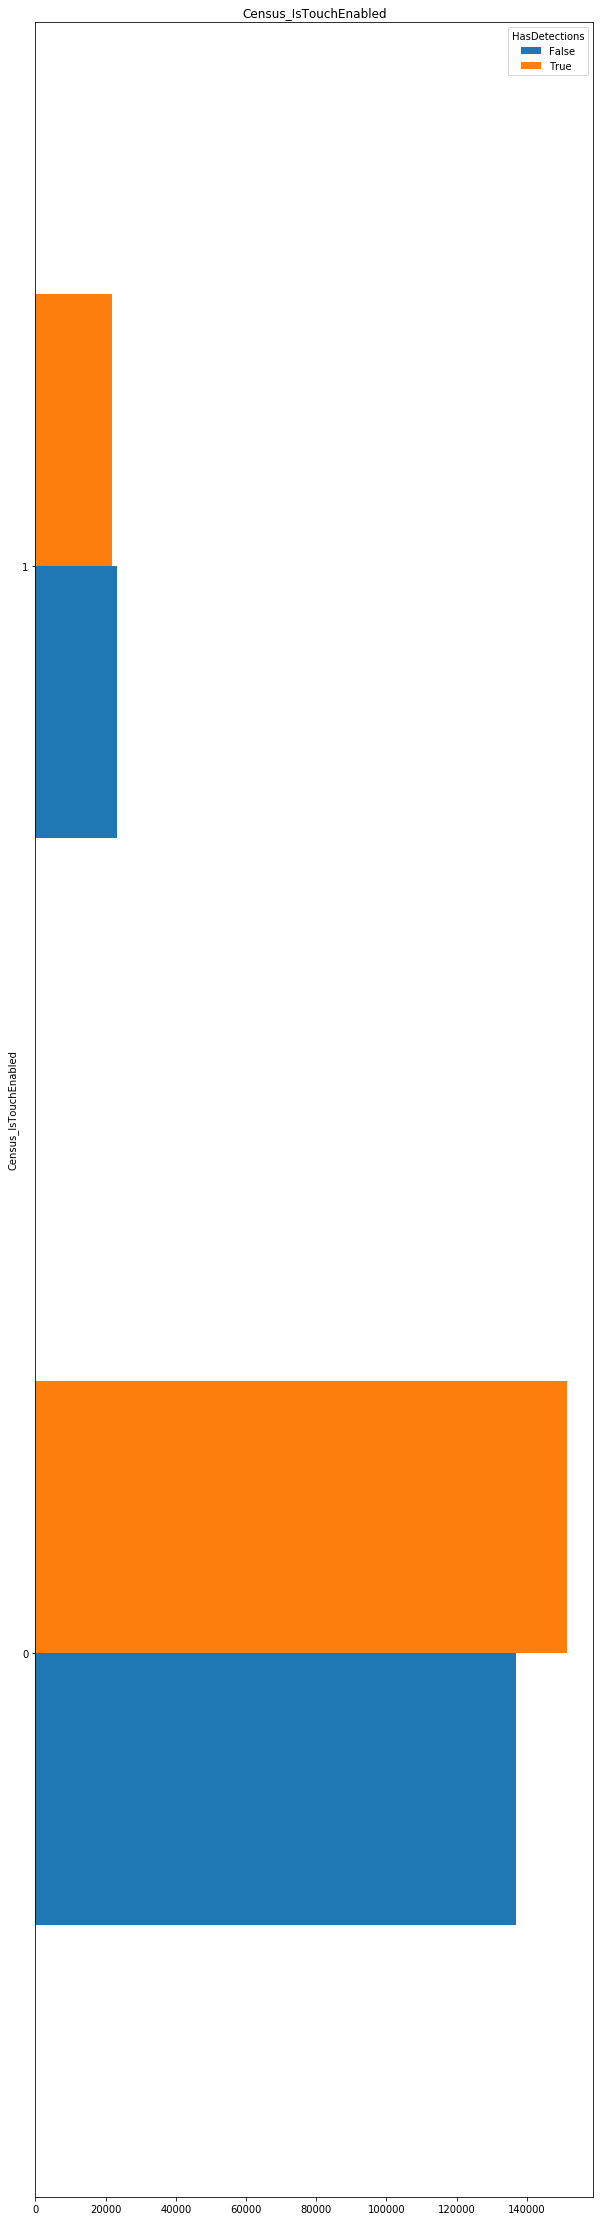

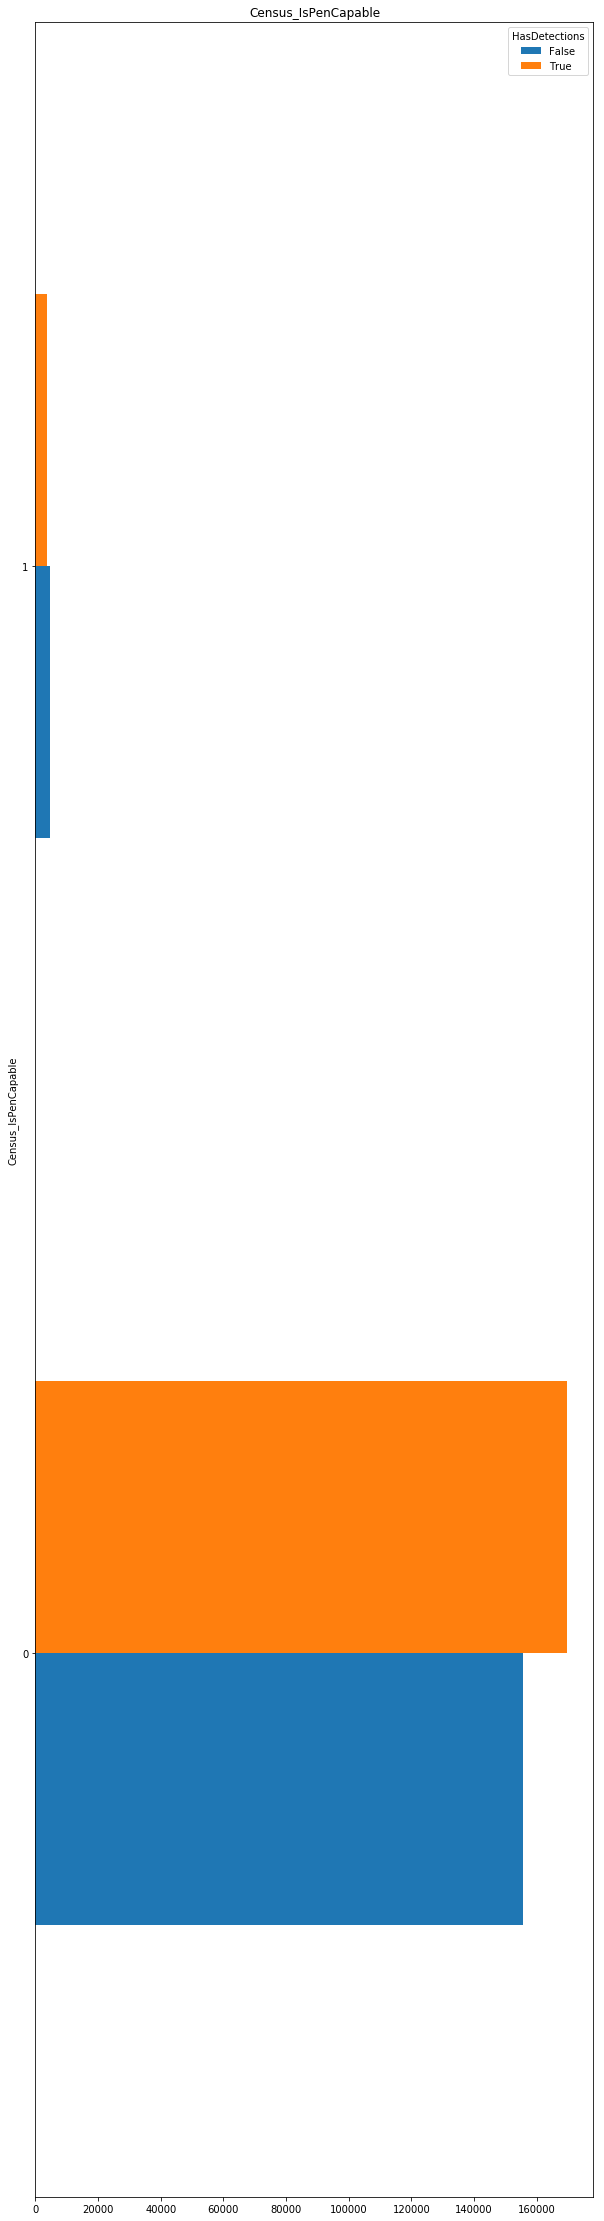

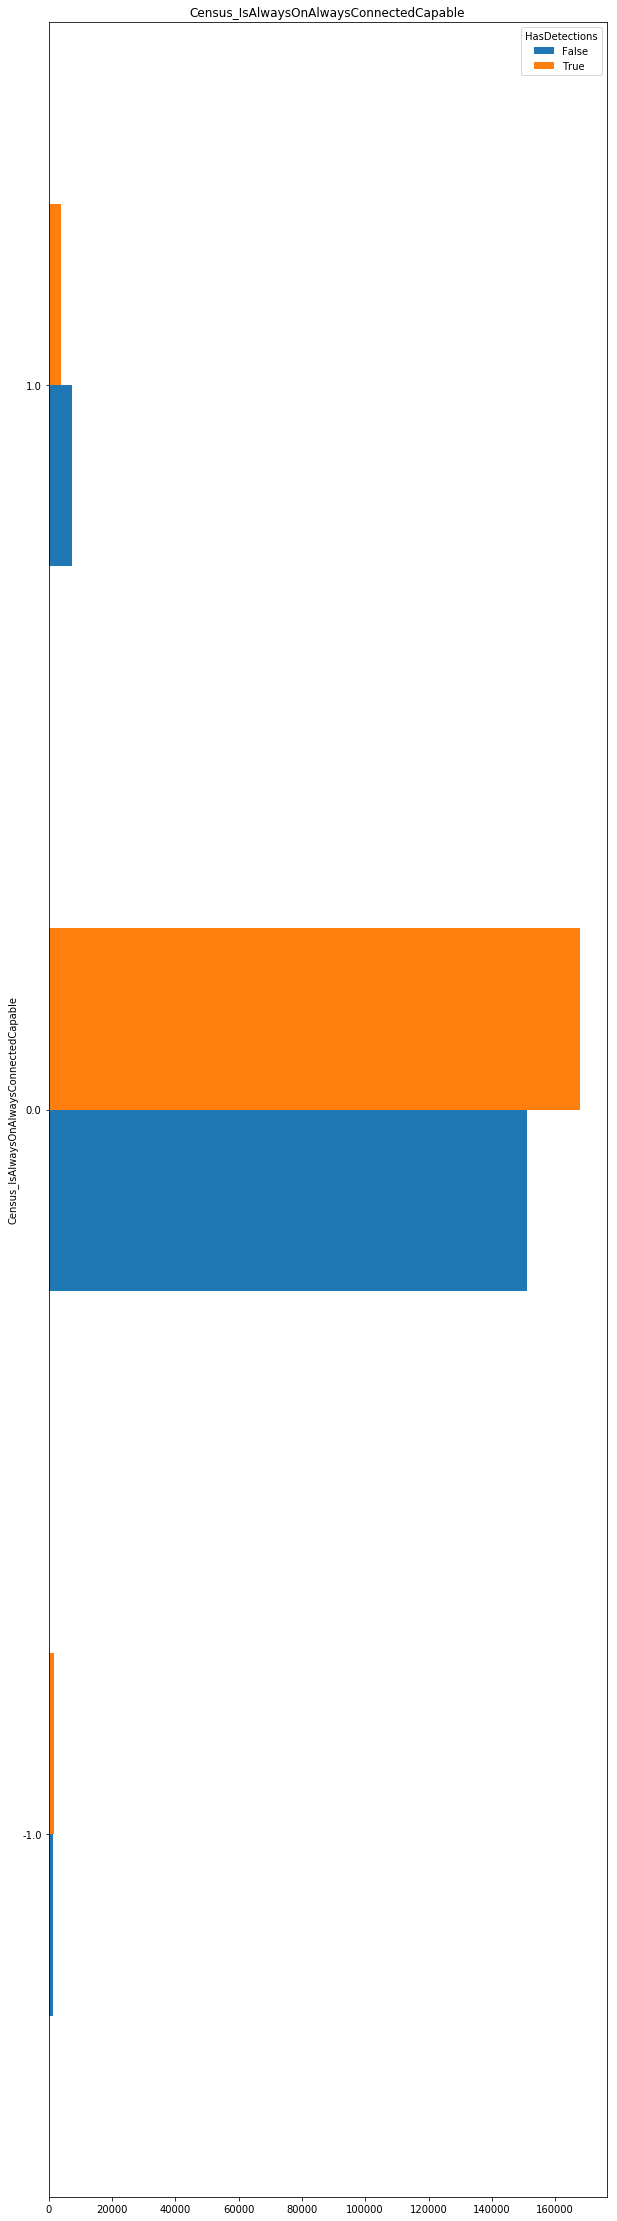

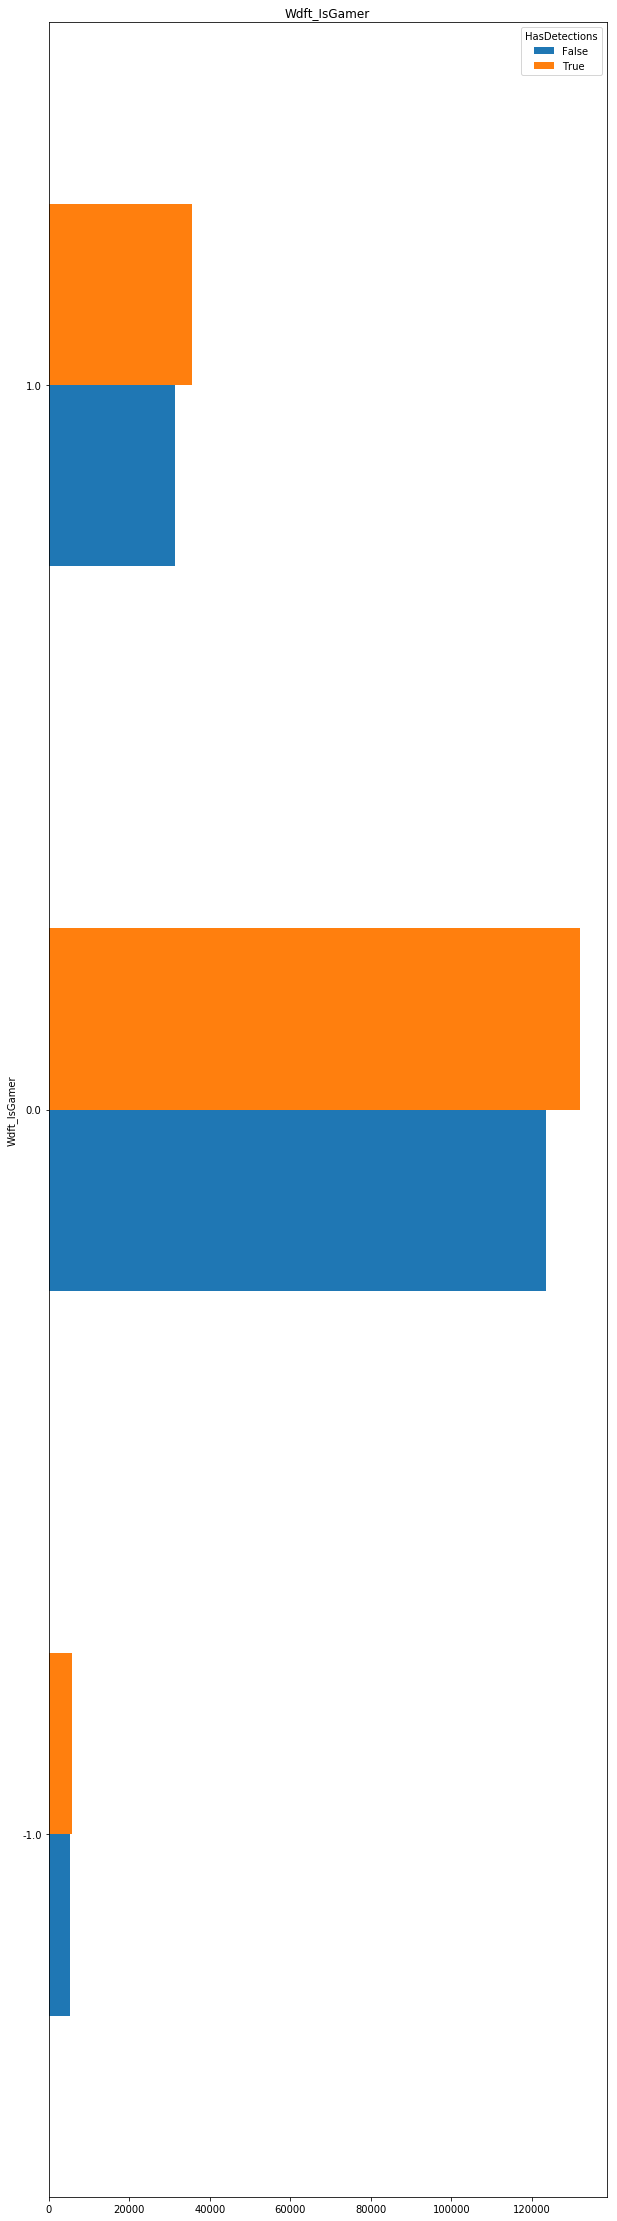

In [16]:
# Box Plots for all data classified as OS
# cols = list(set(cols_os) & set(cols_categorical_large))
# cols = cols + list(set(cols_os) & set(cols_booleans))

for col in cols:
    ct = pd.crosstab(
        [final[col].fillna(-1).astype(object)], 
        final.HasDetections.astype(bool))

    ct.plot(kind='barh',figsize = (10,40), title=col)

#### New Feature OS Version Grouping

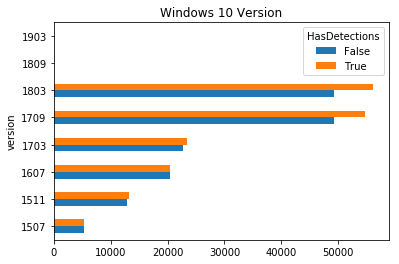

In [61]:
ct = pd.crosstab(
    [final["version"].astype(object)], 
    final.HasDetections.astype(bool))

ct.plot(kind='barh', title="Windows 10 Version")

## Joint Attributes and Class

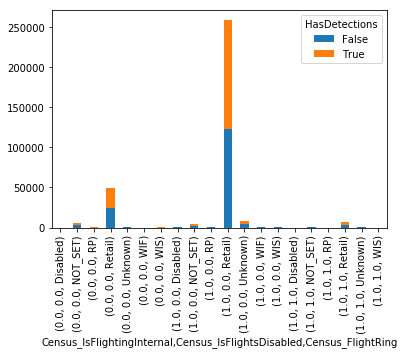

In [62]:
# Flight Values
flights = pd.crosstab(
    [
        final["Census_IsFlightingInternal"].fillna(1),
        final["Census_IsFlightsDisabled"].fillna(1),
        final["Census_FlightRing"]
    ], 
    final.HasDetections.astype(bool))

flights.plot(kind='bar', 
                     stacked=True)

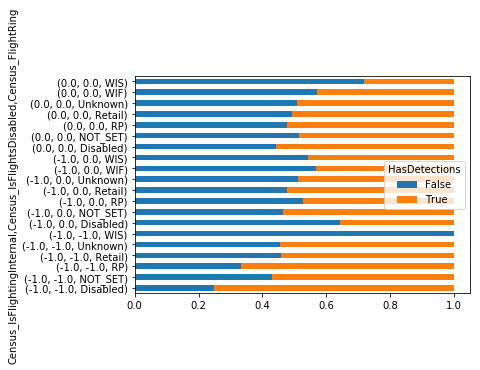

In [14]:
flights_rate = flights.div(flights.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
flights_rate.plot(kind='barh', 
                   stacked=True)

In [53]:
#Replace Null Values with 1 for IsFlightsDisabled and IsFlightingInternal
final["Census_IsFlightingInternal"].fillna(-1, inplace=True)
final["Census_IsFlightsDisabled"].fillna(-1, inplace=True)

In [109]:
# cols = np.append(cols_numerical)
cols = cols_categorical
optim = []
for col in cols:
    optim.append((col, final[col].isnull().sum() * 100 / final.shape[0],
                final[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                final[col].dtype))

optim = pd.DataFrame(optim, columns=['Attribute','Percentage_Missing_value',
                                     'Percentage_by_biggest_category','Data_type'])

optim.sort_values(by = ['Percentage_Missing_value'],ascending=False)

Attribute  Percentage_Missing_value  \
31                   Wdft_RegionIdentifier                  3.280336   
25      Census_OSInstallLanguageIdentifier                  0.630153   
2                        AVProductsEnabled                  0.475389   
1                      AVProductsInstalled                  0.475389   
15  Census_ProcessorManufacturerIdentifier                  0.469391   
16              Census_PrimaryDiskTypeName                  0.164062   
17                  Census_ChassisTypeName                  0.011097   
18            Census_PowerPlatformRoleName                  0.000900   
6                                Processor                  0.000000   
20                         Census_OSBranch                  0.000000   
30                       Census_FlightRing                  0.000000   
29                Census_ActivationChannel                  0.000000   
28                 Census_GenuineStateName                  0.000000   
27        Census_OSWUAutoUpdateOptionsName                  0.000000   
26             Census_OSUILocaleIdentifier                  0.000000   
3                        CountryIdentifier                  0.000000   
24                Census_OSInstallTypeName                  0.000000   
23                        Census_OSSkuName                  0.000000   
22                        Census_OSEdition                  0.000000   
21                    Census_OSBuildNumber                  0.000000   
19                   Census_OSArchitecture                  0.000000   
7                                    OsVer                  0.000000   
4                   OrganizationIdentifier                  0.000000   
5                                 Platform                  0.000000   
14                     Census_DeviceFamily                  0.000000   
13                   Census_MDC2FormFactor                  0.000000   
12                             SmartScreen                  0.000000   
11                              SkuEdition                  0.000000   
10                    OsPlatformSubRelease                  0.000000   
9                                  OsSuite                  0.000000   
8                                  OsBuild                  0.000000   
0                            EngineVersion                  0.000000   

    Percentage_by_biggest_category Data_type  
31                       96.186988    object  
25                       55.428285    object  
2                        96.653680    object  
1                        63.650269    object  
15                       75.951903    object  
16                       79.031886    object  
17                       62.918440    object  
18                       72.996692    object  
6                        88.723227    object  
20                       31.585641    object  
30                       93.997199    object  
29                       52.844987    object  
28                       91.314924    object  
27                       34.758601    object  
26                       55.929768    object  
3                       100.000000    object  
24                       22.524452    object  
23                       50.237695    object  
22                       50.242194    object  
21                       31.584441    object  
19                       88.734925    object  
7                        95.713399    object  
4                        79.914580    object  
5                        95.612622    object  
14                       99.891125    object  
13                       66.865820    object  
12                       52.680026    object  
11                       69.116496    object  
10                       31.400584    object  
9                        69.569690    object  
8                        31.400584    object  
0                        41.704983    object

In [111]:
cols = np.append(["HasDetections"],cols_numerical)
final[cols].to_csv("data/final_countinous.csv")

## New Feature CVE

In [29]:
mask = np.column_stack([final[col].str.contains("10240", na=False) for col in ["Census_OSVersion"]])
final.loc[mask.any(axis=1)]



MachineIdentifier   ProductName EngineVersion  \
16      0003640889c4e1c2735f3d3e94f2c04e  win8defender   1.1.15000.2   
17      0003c394fa166eca61e72ccce9d06eee  win8defender   1.1.15200.1   
49      000b8f024c05140f950c7534f88670ec  win8defender   1.1.15100.1   
89      00136b9d2f0016c160c365c1acb1bfb1  win8defender   1.1.15100.1   
216     002c9063b6d77a1b7ce8b9c1bcdda655  win8defender   1.1.15100.1   
237     0031699fe7fcce2020938bde4e8fb967  win8defender   1.1.15000.2   
249     003577997624dc46cbd2670744bead05  win8defender   1.1.15100.1   
256     00374a00d1f1938acdfdb109ce8ffe9c  win8defender   1.1.14901.4   
261     00385096b7149d23547b4ce04fb213f6  win8defender   1.1.15200.1   
290     003ecc29ed4951b4f324fd9be1179358  win8defender   1.1.15100.1   
311     0042b801489540c49e2aee963facadb5  win8defender   1.1.15100.1   
375     004dc1503509852b4cc62a6bf2af3526  win8defender   1.1.15200.1   
467     005e04cf7b04324ac3dc2a80559b238d  win8defender   1.1.15200.1   
510     0065013081068bc8757fb202319c1518  win8defender   1.1.15100.1   
524     00677bcbb15a9d25e3e4963275cd1b48  win8defender   1.1.15100.1   
530     00682ac624c490ef8cb1545038ee85df  win8defender   1.1.15100.1   
569     007025abe035683a351cbc453fa4d2ad  win8defender   1.1.15200.1   
576     00716680a212a4cf52d32945501fae9f  win8defender   1.1.15200.1   
577     00718a6ad28526b91af6c8357ee794ce  win8defender   1.1.15100.1   
616     007812a646c8ea6848c6c60b6b0b2abe  win8defender   1.1.15100.1   
664     0081de2427b6329e86dedf45b5faf940  win8defender   1.1.15200.1   
670     0082eed7457cdfcc021018344f9392a1  win8defender   1.1.15200.1   
687     0087c23c5ae635700660ff889b14e812  win8defender   1.1.15200.1   
697     008947de21f5b19a9160b4cf35df831d  win8defender   1.1.15200.1   
707     008bfc429874dad5f17a2af9411520d9  win8defender   1.1.14500.5   
737     009071a53c700ecd8ad1119b37c7747d  win8defender   1.1.15200.1   
741     0091183167f2181762c971f8701c6fe0  win8defender   1.1.15200.1   
786     0099e95ee95278f648d84b23f585615b  win8defender   1.1.15100.1   
797     009ce70d6e66006457bff90d78179f01  win8defender   1.1.15200.1   
935     00b9558b9ff2b283f12ddd899805b8f7  win8defender   1.1.15200.1   
...                                  ...           ...           ...   
332417  ff44af208c7033cf402450769415d6d7  win8defender   1.1.15000.2   
332510  ff55e9e9227696ec88e9b89b2b009d34  win8defender   1.1.15100.1   
332530  ff5a316918fda47abd9bdc5780b4c099  win8defender   1.1.15100.1   
332531  ff5a4c2abf9d5a8253218e22a84bab61  win8defender   1.1.15100.1   
332545  ff5c9e03b20101fcf3950d2b2dfe812c  win8defender   1.1.15200.1   
332546  ff5d61803d59c579c94651dea15bf3fb  win8defender   1.1.15100.1   
332605  ff6835422bf8b399668cfee9bd197cf1  win8defender   1.1.15200.1   
332636  ff6e8c14687ead844721c79463075ae1  win8defender   1.1.14500.5   
332688  ff78c561c2027b312e839d0ac9b27bf9  win8defender   1.1.15200.1   
332716  ff7ef2ad55488c852127bc792cd302a7  win8defender   1.1.14901.4   
332766  ff89fcc03ebb0788ddc9787b73e427b4  win8defender   1.1.15100.1   
332768  ff8a3b04cac632303a7b3b68824d9feb  win8defender   1.1.15200.1   
332820  ff93c0e814d14c692f0f748b707dc79c  win8defender   1.1.15100.1   
332825  ff94e012cab714071405d05380d4a45d  win8defender   1.1.15200.1   
332838  ff96f077f46a07e1c7b7fa86eb1510be  win8defender   1.1.15200.1   
332861  ff9cd4eccf461cf5bb627199f0ac7419  win8defender   1.1.15000.2   
332989  ffb32be3a5ebd7949b3f9e2fe1085f85  win8defender   1.1.15100.1   
332991  ffb34571e3571325d62091899c239daf  win8defender   1.1.15200.1   
332992  ffb366a821fc3dfc5a4720ffb3d1666f  win8defender   1.1.15100.1   
333023  ffb8fc0d2064ab4c3b1d823b8990d515  win8defender   1.1.15200.1   
333096  ffc6575ca41f8e849d03786174d24820  win8defender   1.1.15200.1   
333147  ffcdfd23b7665e5f17e6487b1c176ea8  win8defender   1.1.15100.1   
333158  ffd06b02e590734abcd8527c71866155  win8defender   1.1.15200.1   
333199  ffd856b8be7e49db11ad5e85f27ea8df  win8defender   1.1.15

In [59]:
ms_versions = pd.read_csv("data/vulnerabilities.csv")
final["os_build"] = final.Census_OSVersion.str.slice(5,10).astype(int)

display( final.shape )

final = pd.merge(final, ms_versions, on='os_build', how='left')

display( final.shape )
final.head()

(333411, 84)

(333411, 95)

MachineIdentifier   ProductName EngineVersion  \
0  000046e59c37136173428e560acbe3a2  win8defender   1.1.15200.1   
1  0000a313e380907701398b3c61f58848  win8defender   1.1.15200.1   
2  0000c46dc4f3b3f07b11d0d85e02dad5  win8defender   1.1.15100.1   
3  0000d738ef47f088c53fef6013268ac1  win8defender   1.1.14405.2   
4  0001048baea138ccc726ce82e25601ea  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075   1.275.511.0       0               7.0                 0   
1  4.18.1807.18075   1.275.330.0       0               7.0                 0   
2  4.18.1807.18075  1.273.1379.0       0               7.0                 0   
3   4.11.15063.447   1.259.112.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1826.0       0               7.0                 0   

   DefaultBrowsersIdentifier AVProductStatesIdentifier AVProductsInstalled  \
0                        NaN                     46669                   2   
1                        NaN                      7945                   2   
2                        NaN                     53447                   1   
3                     1632.0                      7945                   2   
4                        NaN                     53447                   1   

  AVProductsEnabled  HasTpm CountryIdentifier CityIdentifier  \
0                 1       1               141          60626   
1                 1       1               141          23687   
2                 1       1               141          56198   
3                 1       1               141          30486   
4                 1       1               141         127693   

  OrganizationIdentifier GeoNameIdentifier LocaleEnglishNameIdentifier  \
0                     27               240                         233   
1                     18               240                         233   
2                     27               167                         227   
3                     27               167                         227   
4                     27               167                         227   

    Platform Processor     OsVer OsBuild OsSuite OsPlatformSubRelease  \
0  windows10       x64  10.0.0.0   15063     768                  rs2   
1  windows10       x64  10.0.0.0   16299     768                  rs3   
2  windows10       x86  10.0.0.0   16299     256                  rs3   
3  windows10       x64  10.0.0.0   15063     768                  rs2   
4  windows10       x64  10.0.0.0   16299     768                  rs3   

                                          OsBuildLab SkuEdition  IsProtected  \
0           15063.0.amd64fre.rs2_release.170317-1834       Home          1.0   
1  16299.431.amd64fre.rs3_release_svc_escrow.1805...       Home          1.0   
2            16299.15.x86fre.rs3_release.170928-1534        Pro          1.0   
3           15063.0.amd64fre.rs2_release.170317-1834       Home          1.0   
4  16299.431.amd64fre.rs3_release_svc_escrow.1805...       Home          1.0   

   AutoSampleOptIn PuaMode  SMode IeVerIdentifier   SmartScreen  Firewall  \
0                0     NaN    0.0             108           NaN       1.0   
1                0     NaN    0.0             117  RequireAdmin       1.0   
2                0     NaN    0.0             117  RequireAdmin       1.0   
3                0     NaN    NaN             108           NaN       1.0   
4                0     NaN    0.0             117           NaN       1.0   

   UacLuaenable Census_MDC2FormFactor Census_DeviceFamily  \
0           1.0              Notebook     Windows.Desktop   
1           1.0              Notebook     Windows.Desktop   
2           1.0              Notebook     Windows.Desktop   
3           1.0              Notebook     Windows.Desktop   
4           1.0              Notebook     Windows.Desktop   

  Census_OEMNameIdentifier Census_OEMModelIdentifier  \
0                     2668   

In [ ]:
# https://www.microsoft.com/en-us/wdsi/definitions/antimalware-definition-release-notes?RequestVersion=1.285.162.0&Release=Released&Package=AM
